In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv("ratings.csv")


In [ ]:
print(df.head(n=10))


   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510
5       1     1088     4.0  1147868495
6       1     1175     3.5  1147868826
7       1     1217     3.5  1147878326
8       1     1237     5.0  1147868839
9       1     1250     4.0  1147868414


In [ ]:

# the full data 20ML file's     URL https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/refs/heads/main/ratings.csv
# the 1000 sample data file's   URL https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/main/ratings_Electronics%20(1000%20sample).csv
url = "https://raw.githubusercontent.com/youssefekrami919/IRS-Assignment-1/refs/heads/main/ratings.csv"
df = pd.read_csv(url)

print(df.head(n=10))


   userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580
5       1      112     3.5  1094785740
6       1      151     4.0  1094785734
7       1      223     4.0  1112485573
8       1      253     4.0  1112484940
9       1      260     4.0  1112484826


# Youssef **Ekrami**

### 1.Prepare a dataset of at least 100,000 users, > 1000 products, and > 1 million ratings.

In [ ]:
# Count unique users manually
unique_users = {}
for row in df['userId']:
    if row not in unique_users:
        unique_users[row] = True
num_users = 0
for _ in unique_users:
    num_users += 1
print("Number of users:", num_users)


# Count unique items manually
unique_items = {}
for row in df['movieId']:
    if row not in unique_items:
        unique_items[row] = True
num_items = 0
for _ in unique_items:
    num_items += 1
print("Number of items:", num_items)


# Count ratings manually (without len)
num_ratings = 0
for _ in df['rating']:
    num_ratings += 1
print("Number of ratings:", num_ratings)


Number of users: 2298
Number of items: 15638
Number of ratings: 331701


### 3. Calculate the number of ratings for each user (nu) and save it


In [ ]:
nu = {}  # dictionary: userId -> count

# Loop through each row and count occurrences
for user in df['userId']:
    if user not in nu:
        nu[user] = 1
    else:
        nu[user] += 1

print("\nNumber of ratings per user (nu):")

# print first 5 users manually (not using head)
counter = 0
for user, count in nu.items():
    print(user, ":", count)
    counter += 1
    if counter == 5:
        break



Number of ratings per user (nu):
1 : 70
2 : 184
3 : 656
4 : 242
5 : 101


### 4. Calculate the number of ratings for each item (ni) and save it


In [ ]:
# Step 1: Count ratings per item manually
ni = {}
for item in df['movieId']:
    if item not in ni:
        ni[item] = 1
    else:
        ni[item] += 1

# Step 2: Find the smallest movieId each time and print first 5
print("\nNumber of ratings per item (ni):")

printed = 0
used = []  # store printed keys to avoid repetition

while printed < 5:
    smallest = None

    # find smallest key not printed yet
    for key in ni:
        if key not in used and (smallest is None or key < smallest):
            smallest = key

    print(smallest, ni[smallest])
    used.append(smallest)
    printed += 1



Number of ratings per item (ni):
1 793
2 297
3 187
4 24
5 170


### 5. Compute the average ratings per user (ru) and save it


In [ ]:
ru = {}      # sum of ratings per user
count = {}   # number of ratings per user

for i in range(len(df['userId'])):
    u = df['userId'][i]
    r = df['rating'][i]

    if u in ru:
        ru[u] = ru[u] + r
        count[u] = count[u] + 1
    else:
        ru[u] = r
        count[u] = 1

for u in ru:
    avg = ru[u] / count[u]
    ru[u] = round(avg, 2)   # round to 2 decimals



In [ ]:
print("\nAverage ratings per user (ru):")

printed = 0
for u in ru:
    print(u, ":", ru[u])
    printed += 1
    if printed == 10:
        break



Average ratings per user (ru):
1 : 3.81
2 : 3.63
3 : 3.7
4 : 3.38
5 : 3.75
6 : 4.15
7 : 3.64
8 : 3.61
9 : 3.87
10 : 3.45


### 6. Compute the average ratings per item (ri) and save it


In [ ]:
# Compute average rating per item (movieId)
ri = {}      # sum of ratings per item
count = {}   # number of ratings per item

for i in range(len(df['movieId'])):
    m = df['movieId'][i]
    r = df['rating'][i]

    if m in ri:
        ri[m] = ri[m] + r
        count[m] = count[m] + 1
    else:
        ri[m] = r
        count[m] = 1

for m in ri:
    avg = ri[m] / count[m]
    ri[m] = round(avg, 2)   # round to 2 decimals



In [ ]:
print("\nAverage ratings per item (ri):")

printed = 0
for m in ri:
    print(m, ":", ri[m])
    printed += 1
    if printed == 10:
        break



Average ratings per item (ri):
296 : 4.18
306 : 4.11
307 : 4.11
665 : 4.0
899 : 4.09
1088 : 3.24
1175 : 4.03
1217 : 4.22
1237 : 4.21
1250 : 4.15


### 7. Ascendingly order the total number of ratings per item and plot the distribution per item


Ratings per item sorted ascendingly:
2632 : 1
8685 : 1
8729 : 1
31956 : 1
151763 : 1
148426 : 1
156706 : 1
180989 : 1
1522 : 1
4175 : 1


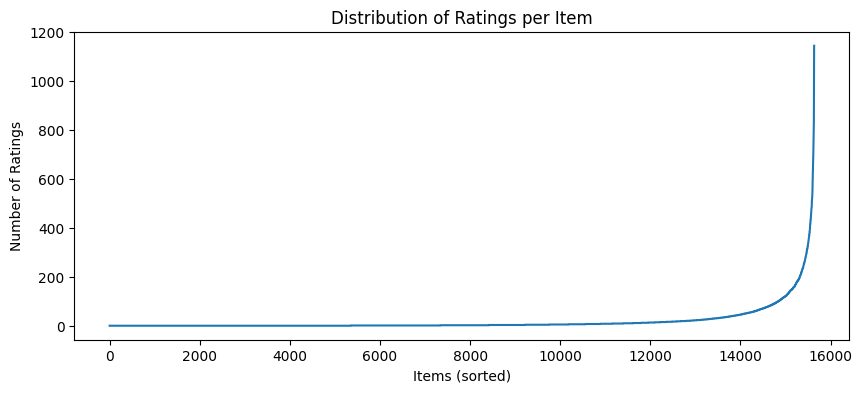

In [ ]:
# ni dictionary already exists: movieId -> count

# Convert ni items to list of tuples
ni_items = []
for key in ni:
    ni_items.append((key, ni[key]))

# Merge Sort implementation to sort by count
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])

    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        # Compare counts (index 1 in tuple)
        if left[i][1] <= right[j][1]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    # Append leftovers
    result.extend(left[i:])
    result.extend(right[j:])

    return result

# Use merge sort
sorted_ni = merge_sort(ni_items)

# Print first 700
print("Ratings per item sorted ascendingly:")
for i in range(min(10, len(sorted_ni))):
    print(sorted_ni[i][0], ":", sorted_ni[i][1])

# Plotting
import matplotlib.pyplot as plt

counts = [item[1] for item in sorted_ni]

plt.figure(figsize=(10,4))
plt.plot(counts)
plt.title("Distribution of Ratings per Item")
plt.xlabel("Items (sorted)")
plt.ylabel("Number of Ratings")
plt.show()


### 8. Compute number of products based on their average ratings (percentage groups)


In [ ]:
### 8. Compute the number of products based on their average ratings in Groups (G1 to G10)

# Initialize empty lists for each group to store the Movie IDs
# G1: <= 1%
# G2: 1% - 5%
# G3: 5% - 10%
# G4: 10% - 20%
# G5: 20% - 30%
# G6: 30% - 40%
# G7: 40% - 50%
# G8: 50% - 60% (Corrected from prompt context)
# G9: 60% - 70%
# G10: 70% - 100%

g1 = []
g2 = []
g3 = []
g4 = []
g5 = []
g6 = []
g7 = []
g8 = []
g9 = []
g10 = []

# Loop through the Average Ratings dictionary (ri) created in Task 6
for movie_id in ri:
    avg = ri[movie_id]

    # Calculate percentage (assuming max rating is 5.0)
    percent = (avg / 5.0) * 100

    # Check which group the product belongs to
    if percent <= 1:
        g1.append(movie_id)
    elif percent > 1 and percent <= 5:
        g2.append(movie_id)
    elif percent > 5 and percent <= 10:
        g3.append(movie_id)
    elif percent > 10 and percent <= 20:
        g4.append(movie_id)
    elif percent > 20 and percent <= 30:
        g5.append(movie_id)
    elif percent > 30 and percent <= 40:
        g6.append(movie_id)
    elif percent > 40 and percent <= 50:
        g7.append(movie_id)
    elif percent > 50 and percent <= 60:
        g8.append(movie_id)
    elif percent > 60 and percent <= 70:
        g9.append(movie_id)
    elif percent > 70 and percent <= 100:
        g10.append(movie_id)

# Print the number of products in each group
print("Number of products per group:")
print("G1 (<= 1%):", len(g1))
print("G2 (1-5%):", len(g2))
print("G3 (5-10%):", len(g3))
print("G4 (10-20%):", len(g4))
print("G5 (20-30%):", len(g5))
print("G6 (30-40%):", len(g6))
print("G7 (40-50%):", len(g7))
print("G8 (50-60%):", len(g8))
print("G9 (60-70%):", len(g9))
print("G10 (70-100%):", len(g10))

Number of products per group:
G1 (<= 1%): 0
G2 (1-5%): 0
G3 (5-10%): 149
G4 (10-20%): 207
G5 (20-30%): 225
G6 (30-40%): 651
G7 (40-50%): 1227
G8 (50-60%): 2963
G9 (60-70%): 4043
G10 (70-100%): 6173


G3: 183
this means that there is 183 product each product of the 183 product its average rating is among the lowest 1% of all products’ average ratings.

### 9. Compute the total number of ratings in each group and order them ascendingly


In [ ]:
### 9. Compute the total number of ratings in each group and order them ascendingly

# Helper function to sum ratings for a list of items
# We use the 'ni' dictionary (number of ratings per item) from Task 4
def get_total_ratings(item_list, ni_dict):
    total = 0
    for movie_id in item_list:
        if movie_id in ni_dict:
            total = total + ni_dict[movie_id]
    return total

# Calculate totals for each group
t1 = get_total_ratings(g1, ni)
t2 = get_total_ratings(g2, ni)
t3 = get_total_ratings(g3, ni)
t4 = get_total_ratings(g4, ni)
t5 = get_total_ratings(g5, ni)
t6 = get_total_ratings(g6, ni)
t7 = get_total_ratings(g7, ni)
t8 = get_total_ratings(g8, ni)
t9 = get_total_ratings(g9, ni)
t10 = get_total_ratings(g10, ni)

# Create a list of lists to store [GroupName, TotalCount]
# This is our dataset to sort
group_data = [
    ["G1", t1], ["G2", t2], ["G3", t3], ["G4", t4],
    ["G5", t5], ["G6", t6], ["G7", t7], ["G8", t8],
    ["G9", t9], ["G10", t10]
]

# QuickSort Implementation (Best algorithm for time complexity O(n log n))
def quick_sort(arr):
    # Base case: if list is empty or has 1 item, it's already sorted
    if len(arr) <= 1:
        return arr

    pivot = arr[len(arr) // 2] # Choose middle element as pivot
    left = []
    middle = []
    right = []

    for x in arr:
        # Compare the count (index 1 of the inner list)
        if x[1] < pivot[1]:
            left.append(x)
        elif x[1] == pivot[1]:
            middle.append(x)
        else:
            right.append(x)

    # Recursive calls
    return quick_sort(left) + middle + quick_sort(right)

# Perform the sort
sorted_groups = quick_sort(group_data)

print("\nTotal ratings per group (Sorted Ascendingly):")
for item in sorted_groups:
    print(item[0], ":", item[1])


Total ratings per group (Sorted Ascendingly):
G1 : 0
G2 : 0
G3 : 161
G4 : 319
G5 : 570
G6 : 2318
G7 : 8068
G8 : 34723
G9 : 91343
G10 : 194199


### 10. Plot the distribution before and after ordering


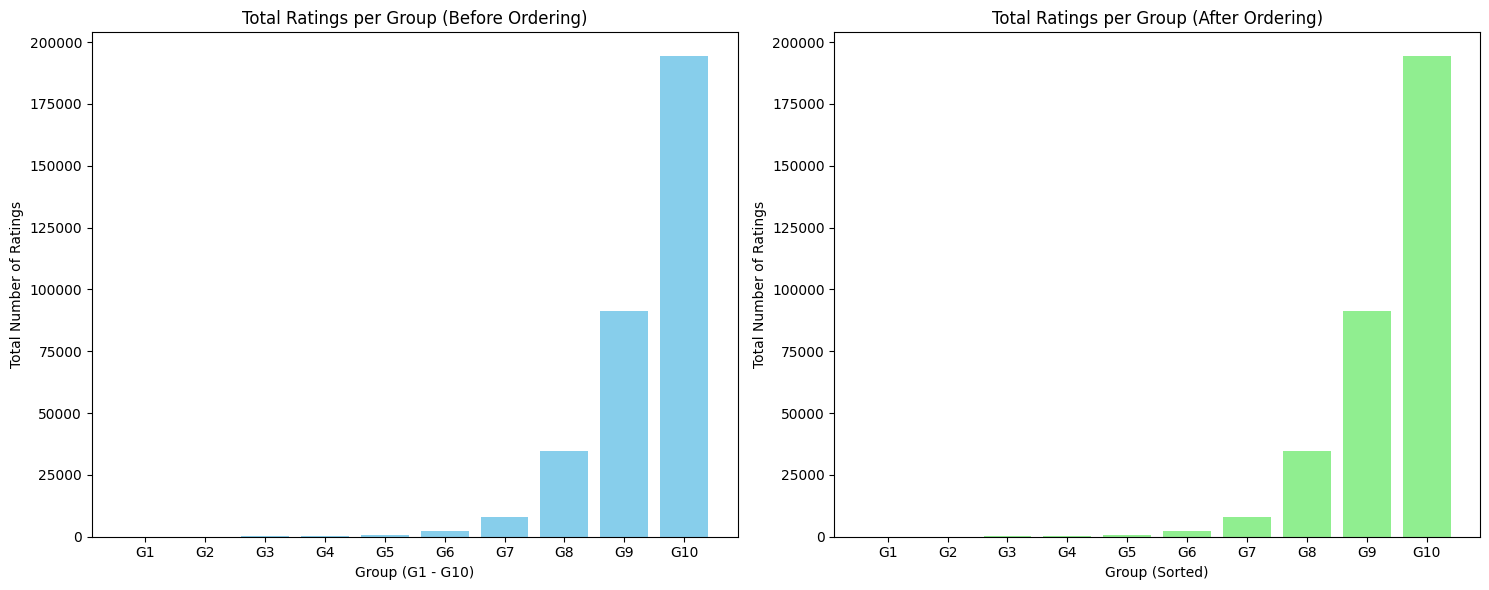

In [ ]:
import matplotlib.pyplot as plt

# --- Prepare Data for Plotting ---

# 1. Before Ordering:
# We strictly follow the group order G1 to G10
labels_before = ["G1", "G2", "G3", "G4", "G5", "G6", "G7", "G8", "G9", "G10"]
# Map the group names to their totals calculated in Task 9
values_before = [
    get_total_ratings(g1, ni), get_total_ratings(g2, ni),
    get_total_ratings(g3, ni), get_total_ratings(g4, ni),
    get_total_ratings(g5, ni), get_total_ratings(g6, ni),
    get_total_ratings(g7, ni), get_total_ratings(g8, ni),
    get_total_ratings(g9, ni), get_total_ratings(g10, ni)
]

# 2. After Ordering:
# We use the sorted_groups list we created in Task 9 using QuickSort
# sorted_groups structure is [['G_name', Total], ...]
labels_after = []
values_after = []

for item in sorted_groups:
    labels_after.append(item[0])
    values_after.append(item[1])

# --- Plotting ---

plt.figure(figsize=(15, 6))

# Subplot 1: Before Ordering
plt.subplot(1, 2, 1)
plt.bar(labels_before, values_before, color='skyblue')
plt.title("Total Ratings per Group (Before Ordering)")
plt.xlabel("Group (G1 - G10)")
plt.ylabel("Total Number of Ratings")

# Subplot 2: After Ordering (Ascending)
plt.subplot(1, 2, 2)
plt.bar(labels_after, values_after, color='lightgreen')
plt.title("Total Ratings per Group (After Ordering)")
plt.xlabel("Group (Sorted)")
plt.ylabel("Total Number of Ratings")

plt.tight_layout()
plt.show()

### 11. Select three target users based on their rating percentage


In [ ]:

total_movies = df['movieId'].nunique()
user_rating_counts = df.groupby('userId').size()
user_percentage = (user_rating_counts / total_movies) * 100

# Find users in each required band
U1_cands = user_percentage[user_percentage <= 2]
U2_cands = user_percentage[(user_percentage > 2) & (user_percentage <= 5)]
U3_cands = user_percentage[(user_percentage > 5) & (user_percentage <= 10)]

# Pick one user from each (first one found)
U1 = U1_cands.index[0]
U2 = U2_cands.index[0] if len(U2_cands) > 0 else U1_cands.index[-1]  # fallback just in case
U3 = U3_cands.index[0] if len(U3_cands) > 0 else U2_cands.index[-1]

print("\n11. Selected Target Users:")
print(f"U1 (≤2% of movies rated)    → {U1} | rated {user_rating_counts[U1]} movies ({user_percentage[U1]:.4f}%)")
print(f"U2 (>2% ≤5%)                → {U2} | rated {user_rating_counts[U2]} movies ({user_percentage[U2]:.4f}%)")
print(f"U3 (>5% ≤10%)               → {U3} | rated {user_rating_counts[U3]} movies ({user_percentage[U3]:.4f}%)")

# Save for later use
target_users = [U1, U2, U3]
print("\nTarget users saved → you can now use them for recommendation experiments!")


11. Selected Target Users:
U1 (≤2% of movies rated)    → 1 | rated 70 movies (0.4476%)
U2 (>2% ≤5%)                → 3 | rated 656 movies (4.1949%)
U3 (>5% ≤10%)               → 72 | rated 813 movies (5.1989%)

Target users saved → you can now use them for recommendation experiments!


# Dareen Mosa

# Z-score normalization of users' average ratings

In [ ]:
def round_val(x):
    return round(x, 2)

# part 1 point (1) and (2)
avg_ratings_list = []

for u in unique_users:
    ratings_u = df[df['userId'] == u]['rating']
    avg_val = round_val(sum(ratings_u) / len(ratings_u))
    avg_ratings_list.append(avg_val)



N = len(avg_ratings_list)

# part 1 point (3)
# Calculate the sum of all average ratings
sum_ru = sum(avg_ratings_list)
# Calculate Mean
mu = round_val(sum_ru / N)

# part 1 ppoint (4)
sum_sq_diff = 0
# Calculate the sum of squared differences from the mean
for r_u in avg_ratings_list:
    diff = r_u - mu
    sum_sq_diff += diff * diff

# Calculate Standard Deviation
sigma = round_val((sum_sq_diff / N) ** 0.5)

# part 1 point (5)
normalized_ratings = []
for r_u in avg_ratings_list:
    if sigma == 0:
        z_u = 0.0
    else:
        # z_u = (ru - μ) / σ
        z_u = round_val((r_u - mu) / sigma)
    normalized_ratings.append(z_u)

# Z_u is the normalized feature vector (z_u)
Z_u = normalized_ratings

print(f"Number of Users (N): {N}")
print(f"Mean (μ) of Avg Ratings: {mu:.2f}")
print(f"Standard Deviation (σ) of Avg Ratings: {sigma:.2f}")
print("First 10 Normalized Avg Ratings (z_u):")
print([f"{z:.2f}" for z in Z_u[:10]])

Number of Users (N): 2298
Mean (μ) of Avg Ratings: 3.69
Standard Deviation (σ) of Avg Ratings: 0.47
First 10 Normalized Avg Ratings (z_u):
['0.26', '-0.13', '0.02', '-0.66', '0.13', '0.98', '-0.11', '-0.17', '0.38', '-0.51']


# Apply K-means clustering

In [ ]:
# Helper function for squared distance (for WCSS)
def squared_distance(point, centroid):
    return (point - centroid) ** 2
#part 1 point (6.1)
# Manual K-means Implementation
def run_kmeans_manual(data, K, max_iters=100):
    # Initialization: Use the first K points as initial centroids
    centroids = [round_val(data[i]) for i in range(K)]

    for iteration in range(max_iters):
        #Assign each point to the nearest centroid
        assignments = [[] for _ in range(K)]
        user_labels = [0] * len(data)

        for i, point in enumerate(data):
            min_dist = float('inf')
            best_cluster = -1

            for j, centroid in enumerate(centroids):
                dist = squared_distance(point, centroid)
                if dist < min_dist:
                    min_dist = dist
                    best_cluster = j

            assignments[best_cluster].append(point)
            user_labels[i] = best_cluster

        #  Calculate new centroids (mean of assigned points)
        new_centroids = []
        for cluster_points in assignments:
            if len(cluster_points) > 0:
                new_centroid = round_val(sum(cluster_points) / len(cluster_points))
            else:
                # Keep old centroid if cluster is empty
                new_centroid = centroids[assignments.index(cluster_points)]
            new_centroids.append(new_centroid)

        # Stop if centroids do not change (rounded values)
        converged = True
        for old, new in zip(centroids, new_centroids):
            if round_val(old) != round_val(new):
                converged = False
                break

        centroids = new_centroids

        if converged:
            break

    # alculate WCSS (Inertia)
    wcss_value = 0
    for i, cluster_points in enumerate(assignments):
        centroid = centroids[i]
        for point in cluster_points:
            wcss_value += squared_distance(point, centroid)

    return centroids, user_labels, round_val(wcss_value)

# Manual Silhouette Score Implementation
def calculate_silhouette_score_manual(data, labels):
    if len(set(labels)) <= 1 or len(data) <= 1:
        return 0.0

    scores = []

    for i, point in enumerate(data):
        cluster_i = labels[i]

        #  average distance to all other points in the same cluster
        intra_cluster_dists = []
        for j, other_point in enumerate(data):
            if i != j and labels[j] == cluster_i:
                # Use absolute difference for 1D distance
                intra_cluster_dists.append(abs(point - other_point))

        a_i = round_val(sum(intra_cluster_dists) / len(intra_cluster_dists)) if intra_cluster_dists else 0.0

        #  minimum average distance to points in any other cluster
        other_clusters = set(labels) - {cluster_i}
        b_i = float('inf')

        if other_clusters:
            for other_cluster in other_clusters:
                inter_cluster_dists = []
                for j, other_point in enumerate(data):
                    if labels[j] == other_cluster:
                        inter_cluster_dists.append(abs(point - other_point))

                if inter_cluster_dists:
                    avg_dist = round_val(sum(inter_cluster_dists) / len(inter_cluster_dists))
                    b_i = min(b_i, avg_dist)

        # Calculate s(i)
        if b_i == float('inf') or a_i == b_i:
            s_i = 0.0
        elif a_i < b_i:
            s_i = round_val((b_i - a_i) / b_i)
        else: # a_i > b_i
            s_i = round_val((b_i - a_i) / a_i)

        scores.append(s_i)

    # Final Silhouette Score is the average of all s(i)
    final_score = round_val(sum(scores) / len(scores))
    return final_score

# part 1 point (6.2)
K_values = [5, 10, 15, 20, 30, 50]
wcss = []
silhouette_scores = {}
cluster_results = {}

for K in K_values:
    centroids, labels, wcss_val = run_kmeans_manual(Z_u, K)
    wcss.append(wcss_val)

    # Calculate Silhouette Score
    score = calculate_silhouette_score_manual(Z_u, labels)
    silhouette_scores[K] = score

    # Store results
    cluster_results[K] = {
        'centroids': centroids,
        'labels': labels
    }

    print(f"K={K:2}: WCSS = {wcss_val:.2f}, Silhouette Score = {score:.2f}")

# Create DataFrame for summary display
results_df = pd.DataFrame({
    'K': K_values,
    'WCSS': wcss
})
results_df['Silhouette Score'] = results_df['K'].map(silhouette_scores)
print("\nPerformance Summary:")
print(results_df.to_markdown(index=False, numalign="left", stralign="left"))

K= 5: WCSS = 224.21, Silhouette Score = 0.52
K=10: WCSS = 58.79, Silhouette Score = 0.53
K=15: WCSS = 31.23, Silhouette Score = 0.53
K=20: WCSS = 24.82, Silhouette Score = 0.53
K=30: WCSS = 18.07, Silhouette Score = 0.53
K=50: WCSS = 13.65, Silhouette Score = 0.57

Performance Summary:
| K   | WCSS   | Silhouette Score   |
|:----|:-------|:-------------------|
| 5   | 224.21 | 0.52               |
| 10  | 58.79  | 0.53               |
| 15  | 31.23  | 0.53               |
| 20  | 24.82  | 0.53               |
| 30  | 18.07  | 0.53               |
| 50  | 13.65  | 0.57               |


# Display user distribution for the best K

K=5: Cluster distribution = Counter({2: 695, 4: 616, 1: 510, 0: 306, 3: 171})
K=10: Cluster distribution = Counter({2: 395, 6: 370, 4: 329, 1: 308, 0: 293, 8: 227, 7: 184, 9: 91, 5: 89, 3: 12})
K=15: Cluster distribution = Counter({8: 244, 0: 240, 7: 213, 5: 202, 12: 190, 4: 182, 1: 171, 2: 168, 9: 163, 6: 152, 14: 132, 3: 101, 11: 66, 13: 63, 10: 11})
K=20: Cluster distribution = Counter({8: 184, 18: 170, 19: 170, 9: 162, 3: 158, 14: 148, 4: 144, 5: 143, 0: 135, 2: 113, 12: 113, 7: 103, 15: 101, 17: 101, 6: 83, 1: 81, 11: 66, 13: 57, 16: 55, 10: 11})
K=30: Cluster distribution = Counter({18: 170, 9: 162, 3: 158, 23: 154, 8: 120, 24: 113, 25: 103, 17: 101, 4: 92, 2: 88, 22: 80, 29: 77, 5: 74, 21: 66, 11: 66, 15: 65, 14: 64, 20: 64, 16: 55, 26: 53, 19: 52, 7: 50, 13: 46, 6: 45, 28: 42, 0: 40, 1: 38, 12: 31, 27: 18, 10: 11})
K=50: Cluster distribution = Counter({17: 105, 9: 101, 37: 99, 11: 98, 33: 96, 2: 88, 18: 86, 3: 84, 24: 81, 23: 77, 38: 72, 4: 64, 10: 64, 34: 64, 32: 61, 16: 55, 1

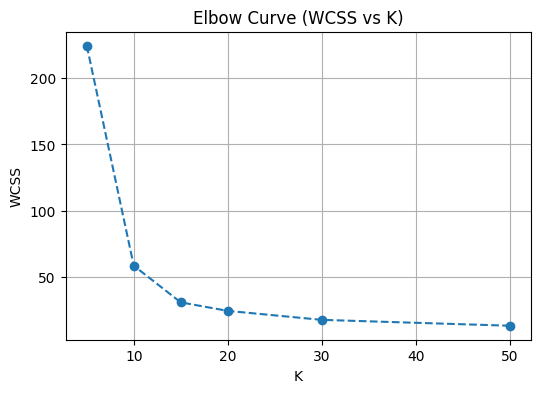

K=5: Silhouette Score=0.52
K=10: Silhouette Score=0.53
K=15: Silhouette Score=0.53
K=20: Silhouette Score=0.52
K=30: Silhouette Score=0.52
K=50: Silhouette Score=0.57


In [ ]:
# (7.1) calculate the number of users in each cluster
from collections import Counter
for K in K_values:
    labels = cluster_results[K]['labels']
    dist = Counter(labels)
    print(f"K={K}: Cluster distribution = {dist}")

# (7.2) Compute the within-cluster sum of squares (WCSS) for each K
def calculate_wcss(data, centroids, labels):
    return round_val(sum((p - centroids[l])**2 for p,l in zip(data,labels)))

wcss = []
for K in K_values:
    c = cluster_results[K]['centroids']
    l = cluster_results[K]['labels']
    wcss_val = calculate_wcss(Z_u, c, l)
    wcss.append(wcss_val)
    print(f"K={K}: WCSS={wcss_val}")

#( 7.3) Plot the elbow curve (WCSS vs. K) to determine the optimal K value
plt.figure(figsize=(6,4))
plt.plot(K_values, wcss, marker='o', linestyle='--')
plt.title("Elbow Curve (WCSS vs K)")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# (7.4) Calculate the silhouette score for each K value to assess clustering quality
def silhouette_score(data, labels):
    scores=[]
    for i,p in enumerate(data):
        same=[abs(p-data[j]) for j in range(len(data)) if labels[j]==labels[i] and j!=i]
        a=sum(same)/len(same) if same else 0
        other_clusters=set(labels)-{labels[i]}
        b=min(sum(abs(p-data[j]) for j in range(len(data)) if labels[j]==oc)/len([j for j in range(len(data)) if labels[j]==oc]) for oc in other_clusters) if other_clusters else a
        s=(b-a)/max(a,b) if max(a,b)>0 else 0
        scores.append(s)
    return round_val(sum(scores)/len(scores))

sil_scores = {}
for K in K_values:
    l = cluster_results[K]['labels']
    score = silhouette_score(Z_u, l)
    sil_scores[K] = score
    print(f"K={K}: Silhouette Score={score}")

# Cluster Analysis

In [ ]:
# Define the optimal K based on elbow + silhouette analysis
OPTIMAL_K = 10

user_ids_list = list(unique_users)

# Cluster Distribution and Centroid Analysis (for Optimal K=10)

# Get optimal results
optimal_labels = cluster_results[OPTIMAL_K]['labels']
optimal_centroids_normalized = cluster_results[OPTIMAL_K]['centroids']

# Create mapping from userId to cluster label
user_cluster_map = {user_ids_list[i]: optimal_labels[i] for i in range(N)}


# (8.1) User Distribution Across Clusters

cluster_distribution = {}
for label in optimal_labels:
    cluster_distribution[label] = cluster_distribution.get(label, 0) + 1

# Convert to DataFrame for display, sorting by cluster index
dist_data = sorted(cluster_distribution.items())
dist_df = pd.DataFrame(dist_data, columns=['Cluster', 'User Count'])

print(f"# User Distribution Across Clusters (K={OPTIMAL_K}) #")
print(dist_df.to_markdown(index=False, numalign="left", stralign="left"))

# (8.2) Centroid Values — Denormalize back to Average Rating scale (r̄u = z_u * σ + μ)
centroids_data = []
for i in range(OPTIMAL_K):
    z_u = optimal_centroids_normalized[i]
    # Denormalization formula: r̄u = z_u * σ + μ
    avg_r = round_val(z_u * sigma + mu)

    centroids_data.append([
        i,
        round_val(z_u),
        avg_r
    ])

centroids_df = pd.DataFrame(centroids_data,
                            columns=['Cluster', 'Normalized Centroid (z_u)', 'Average Rating Centroid (r̄u)'])

# Sort by Average Rating Centroid to identify strict vs. generous raters
centroids_df = centroids_df.sort_values(by='Average Rating Centroid (r̄u)', ascending=True).reset_index(drop=True)

print(f"\n# Cluster Centroids  for K={OPTIMAL_K} #")
print(centroids_df.to_markdown(index=False, numalign="left", stralign="left"))


# (8.3) Identify Strict vs. Generous Raters

strict_clusters = centroids_df.head(2)['Cluster'].tolist()
generous_clusters = centroids_df.tail(2)['Cluster'].tolist()

print("\n# Cluster Characterization #")
print(f"Strict Raters Clusters (Lowest Avg Ratings): {strict_clusters}")
print(f"Generous Raters Clusters (Highest Avg Ratings): {generous_clusters}")

# Store cluster data for CF step
cluster_sizes = cluster_distribution

# User Distribution Across Clusters (K=10) #
| Cluster   | User Count   |
|:----------|:-------------|
| 0         | 293          |
| 1         | 308          |
| 2         | 395          |
| 3         | 12           |
| 4         | 329          |
| 5         | 89           |
| 6         | 370          |
| 7         | 184          |
| 8         | 227          |
| 9         | 91           |

# Cluster Centroids  for K=10 #
| Cluster   | Normalized Centroid (z_u)   | Average Rating Centroid (r̄u)   |
|:----------|:----------------------------|:-------------------------------|
| 3         | -4.03                       | 1.8                            |
| 9         | -2.14                       | 2.68                           |
| 7         | -1.38                       | 3.04                           |
| 1         | -0.82                       | 3.3                            |
| 6         | -0.37                       | 3.52                           |
| 2         | 0.04                

# Cluster-based CF

In [ ]:
# (9.1) Identify which cluster each target user belongs to
target_users = [1, 11, 54]
target_items = [260, 60524]
top_k_percent = 20           # Select top 20% neighbors

# --- FIX: Define user_ratings_centered ---
user_ratings = {}
for index, row in df.iterrows():
    u = int(row['userId'])
    m = int(row['movieId'])
    r = float(row['rating'])
    if u not in user_ratings:
        user_ratings[u] = {}
    user_ratings[u][m] = r

user_ratings_centered = {}
for u, ratings in user_ratings.items():
    avg_u = ru.get(u, 0)  # Get average rating for user u, default to 0 if not found
    user_ratings_centered[u] = {m: r - avg_u for m, r in ratings.items()}
# --- END FIX ---

for u in target_users:
    cluster_id = user_cluster_map.get(u, 'N/A')
    print(f"Target User {u} belongs to Cluster {cluster_id}")

# (9.2) Compute user-user similarity within the assigned cluster using mean-centered Cosine similarity
def mean_centered_cosine_similarity_manual(user1, user2, centered_ratings):
    if user1 not in centered_ratings or user2 not in centered_ratings:
        return 0.0
    r_u = centered_ratings[user1]
    r_v = centered_ratings[user2]
    common_items = set(r_u.keys()) & set(r_v.keys())
    if not common_items:
        return 0.0
    numerator = sum(r_u[it] * r_v[it] for it in common_items)
    sum_u_sq = sum(r_u[it]**2 for it in common_items)
    sum_v_sq = sum(r_v[it]**2 for it in common_items)
    denominator = (sum_u_sq**0.5) * (sum_v_sq**0.5)
    return round_val(numerator/denominator) if denominator != 0 else 0.0

# (9.3) Select the top 20% most similar users from within the same cluster
def get_top_similar_users(target_user, cluster_id, top_percent=0.2):
    similarities = []
    for u in user_cluster_map:
        if user_cluster_map[u] == cluster_id and u != target_user:
            sim = mean_centered_cosine_similarity_manual(target_user, u, user_ratings_centered)
            if sim > 0:
                similarities.append((u, sim))
    similarities.sort(key=lambda x: x[1], reverse=True)
    top_k = int(len(similarities) * top_percent)
    return similarities[:max(1, top_k)]

# (9.4) Predict ratings for target items using only the similar users from the same cluster
def predict_rating_cluster_cf_manual(target_user, target_item, cluster_map, centered_ratings, avg_ratings_map, top_k_percentage):
    if target_user not in cluster_map:
        return avg_ratings_map.get(target_user, 3.5), 0
    cluster_id = cluster_map[target_user]
    avg_r_u = avg_ratings_map.get(target_user, 3.5)
    neighbors = get_top_similar_users(target_user, cluster_id, top_k_percentage/100)
    num, den = 0.0, 0.0
    for n, sim in neighbors:
        if target_item in centered_ratings.get(n, {}):
            num += sim * centered_ratings[n][target_item]
            den += abs(sim)
    if den == 0:
        return avg_r_u, len(neighbors)
    prediction = round_val(avg_r_u + num/den)
    return max(0.5, min(5.0, prediction)), len(neighbors)

# Execute predictions for each target user and item
predictions_cf_cluster = {}
for u in target_users:
    predictions_cf_cluster[u] = {}
    for it in target_items:
        pred, k_neighbors = predict_rating_cluster_cf_manual(u, it, user_cluster_map, user_ratings_centered, ru, top_k_percent)
        predictions_cf_cluster[u][it] = (pred, k_neighbors)

# Display results
rows = []
for u, items in predictions_cf_cluster.items():
    for it, (pred, k_n) in items.items():
        rows.append({
            'User': u,
            'Item': it,
            'Cluster': user_cluster_map.get(u, 'N/A'),
            'Prediction': pred,
            'Neighbors Used': k_n
        })

cf_cluster_df = pd.DataFrame(rows)
print("\n### Cluster-based CF Predictions (Part 1) ###")
print(cf_cluster_df.to_markdown(index=False, numalign="left", stralign="left"))

Target User 1 belongs to Cluster 4
Target User 11 belongs to Cluster 7
Target User 54 belongs to Cluster 4

### Cluster-based CF Predictions (Part 1) ###
| User   | Item   | Cluster   | Prediction   | Neighbors Used   |
|:-------|:-------|:----------|:-------------|:-----------------|
| 1      | 260    | 4         | 4.11         | 34               |
| 1      | 60524  | 4         | 3.81         | 34               |
| 11     | 260    | 7         | 4.33         | 16               |
| 11     | 60524  | 7         | 3.15         | 16               |
| 54     | 260    | 4         | 4.22         | 27               |
| 54     | 60524  | 4         | 3.81         | 27               |


# Compare clustering-based predictions vs non-clustering baseline (Section TWO)


# Manual Feature Construction: Common Ratings Overlap

In [ ]:
# 1. Pre-calculate user item sets
user_items = {} # {userId: {movieId1, movieId2, ...}}
for index, row in df[['userId', 'movieId']].iterrows():
    u = row['userId']
    m = row['movieId']
    if u not in user_items:
        user_items[u] = set()
    user_items[u].add(m)

user_ids = list(ru.keys()) # All users
N = len(user_ids)

# 2. Calculate Overlap Features for each user (avg, max, min common items)
feature_data = {} # {userId: [avg_common, max_common, min_common]}

# We will iterate over all user pairs (u, v)
for i, u in enumerate(user_ids):
    u_items = user_items[u]
    common_counts = [] # List of |I_u ∩ I_v| for all v != u

    for j, v in enumerate(user_ids):
        if u != v:
            v_items = user_items[v]
            # Manual intersection size calculation
            common_count = len(u_items.intersection(v_items))
            common_counts.append(common_count)

    # Calculate Features manually (rounded to 2 decimals)

    # Feature 1: Average common items (avg_common)
    avg_common = round_val(sum(common_counts) / len(common_counts))

    # Feature 2: Maximum common items (max_common)
    max_common = max(common_counts)

    # Feature 3: Minimum common items (min_common, excluding zero)
    # Filter out zeros first
    non_zero_common = [c for c in common_counts if c > 0]
    min_common = min(non_zero_common) if non_zero_common else 0

    feature_data[u] = [avg_common, max_common, min_common]

# Convert feature data to a list of vectors F_u for normalization
F_u = [feature_data[u] for u in user_ids]

print(f"Number of Users (N): {N}")
print("First 5 Feature Vectors [avg_common, max_common, min_common]:")
for u_id in user_ids[:5]:
    print(f"User {u_id}: {feature_data[u_id]}")

Number of Users (N): 2298
First 5 Feature Vectors [avg_common, max_common, min_common]:
User 1: [3.49, 51, 1]
User 2: [20.93, 168, 1]
User 3: [40.8, 534, 1]
User 4: [19.72, 208, 1]
User 5: [13.31, 94, 1]


In [ ]:
# Total users
N_total = N

# Cluster sizes list
cluster_sizes_list = list(cluster_sizes.values()) if cluster_sizes else [1]
avg_cluster_size = round_val(sum(cluster_sizes_list) / len(cluster_sizes_list))

# --- 1. Similarity Operations (per user) ---
similarity_ops_non_clustering = N_total - 1  # per-user comparisons in full search
similarity_ops_with_clustering_avg = avg_cluster_size - 1  # per-user (avg) within cluster

print("### Computational Efficiency Analysis ###")
print(f"Total Users (N): {N_total}")
print(f"Average Cluster Size (|C̄u|): {avg_cluster_size:.2f}")

print("\n1. Similarity Operations Comparison (per user):")
print(f"   - Non-Clustering: {similarity_ops_non_clustering} operations.")
print(f"   - Cluster-based (Avg): {similarity_ops_with_clustering_avg:.2f} operations.")

# --- 2. Speedup Factor & Reduction Percentage (per user) ---
if similarity_ops_with_clustering_avg == 0:
    speedup_factor = float('inf')
    reduction_percentage = 100.0
else:
    speedup_factor = round_val(similarity_ops_non_clustering / similarity_ops_with_clustering_avg)
    reduction_percentage = round_val(100 * (1 - (similarity_ops_with_clustering_avg / similarity_ops_non_clustering)))

print(f"\n2. Speedup Factor (per user): {speedup_factor}x")
print(f"3. Reduction Percentage in Operations (per user): {reduction_percentage}%")

# --- 3. Cluster Imbalance ---
imbalance_ratio = round_val(max(cluster_sizes_list) / min(cluster_sizes_list)) if min(cluster_sizes_list) > 0 else float('inf')
print(f"\n4. Cluster Imbalance Ratio (Max Size / Min Size): {imbalance_ratio}x")
print("Suggestions to handle imbalance: reduce K, use stratified K, merge tiny clusters, or recluster with different init.")

# --- 4. Global Efficiency Analysis ---
total_pairs_no_cluster = N_total * (N_total - 1) // 2
cluster_sizes_vals = list(cluster_sizes.values())
total_pairs_with_cluster = sum(n * (n - 1) // 2 for n in cluster_sizes_vals)

if total_pairs_with_cluster == 0:
    global_speedup = float('inf')
    global_reduction_pct = 100.0
else:
    global_speedup = round_val(total_pairs_no_cluster / total_pairs_with_cluster)
    global_reduction_pct = round_val(100 * (1 - (total_pairs_with_cluster / total_pairs_no_cluster)))

print("\n=== Global Efficiency (Pairwise) ===")
print(f"Total pairs (no clustering): {total_pairs_no_cluster}")
print(f"Total pairs (with clustering): {total_pairs_with_cluster}")
print(f"Global speedup: {global_speedup}x")
print(f"Global reduction in computations: {global_reduction_pct}%")

### Computational Efficiency Analysis ###
Total Users (N): 2298
Average Cluster Size (|C̄u|): 229.80

1. Similarity Operations Comparison (per user):
   - Non-Clustering: 2297 operations.
   - Cluster-based (Avg): 228.80 operations.

2. Speedup Factor (per user): 10.04x
3. Reduction Percentage in Operations (per user): 90.04%

4. Cluster Imbalance Ratio (Max Size / Min Size): 32.92x
Suggestions to handle imbalance: reduce K, use stratified K, merge tiny clusters, or recluster with different init.

=== Global Efficiency (Pairwise) ===
Total pairs (no clustering): 2639253
Total pairs (with clustering): 340656
Global speedup: 7.75x
Global reduction in computations: 87.09%


 # Manual Feature Construction and Z-score Normalization (Part 2)

In [ ]:
# Global variables assumed available: df, user_ids, round_val, N

# 1. Pre-calculate user item sets
user_items = {} # {userId: {movieId1, movieId2, ...}}
for index, row in df[['userId', 'movieId']].iterrows():
    u = row['userId']
    m = row['movieId']
    if u not in user_items:
        user_items[u] = set()
    user_items[u].add(m)

user_ids_list = list(user_items.keys()) # All users
N = len(user_ids_list)

# 2. Calculate Overlap Features for each user
feature_data_overlap = {} # {userId: [avg_common, max_common, min_common]}
F_u = [] # List of feature vectors for normalization

for i, u in enumerate(user_ids_list):
    u_items = user_items[u]
    common_counts = [] # List of |I_u ∩ I_v| for all v != u

    for j, v in enumerate(user_ids_list):
        if u != v:
            v_items = user_items[v]
            common_count = len(u_items.intersection(v_items))
            common_counts.append(common_count)

    # Feature 1: Average common items (avg_common)
    avg_common = round_val(sum(common_counts) / len(common_counts))

    # Feature 2: Maximum common items (max_common)
    max_common = max(common_counts)

    # Feature 3: Minimum common items (min_common, excluding zero)
    non_zero_common = [c for c in common_counts if c > 0]
    min_common = min(non_zero_common) if non_zero_common else 0

    vector = [avg_common, max_common, min_common]
    feature_data_overlap[u] = vector
    F_u.append(vector)


# 3. Manual Z-score Normalization for 3 Dimensions
D = 3
# Calculate Mean (μ)
mu_vec = [round_val(sum(vector[d] for vector in F_u) / N) for d in range(D)]

# Calculate Standard Deviation (σ)
sigma_vec = [round_val((sum((vector[d] - mu_vec[d]) ** 2 for vector in F_u) / N) ** 0.5) for d in range(D)]

# Normalize
Z_u_part2 = []
for vector in F_u:
    z_vector = []
    for d in range(D):
        if sigma_vec[d] == 0:
            z_val = 0.0
        else:
            z_val = round_val((vector[d] - mu_vec[d]) / sigma_vec[d])
        z_vector.append(z_val)
    Z_u_part2.append(z_vector)

# Sanity prints
print("Mean vector (mu):", mu_vec)
print("Std vector (sigma):", sigma_vec)
print("First 5 normalized vectors (z):")
for i in range(min(5, len(Z_u_part2))):
    print(user_ids_list[i], Z_u_part2[i])


Mean vector (mu): [13.01, 114.48, 1.01]
Std vector (sigma): [12.41, 149.76, 0.1]
First 5 normalized vectors (z):
1 [-0.77, -0.42, -0.1]
2 [0.64, 0.36, -0.1]
3 [2.24, 2.8, -0.1]
4 [0.54, 0.62, -0.1]
5 [0.02, -0.14, -0.1]


#  K-means Clustering and Performance Analysis (3D)

In [ ]:
# 3D squared distance
def squared_distance_3d(a, b):
    # a, b are lists of length 3
    return (a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2

# K-means for 3D (from scratch)
import random

def run_kmeans_manual_3d(data, K, max_iters=100, init='first', random_state=None):
    L = len(data)
    if K <= 0 or L == 0:
        return [], [0]*L, 0.0
    if init == 'random':
        rnd = random.Random(random_state)
        indices = rnd.sample(range(L), min(K, L))
        centroids = [ [round_val(data[i][d]) for d in range(3)] for i in indices ]
        # pad if K > L
        while len(centroids) < K:
            centroids.append([round_val(data[0][d]) for d in range(3)])
    else:
        centroids = [ [round_val(data[i][d]) for d in range(3)] for i in range(min(K, L)) ]
        while len(centroids) < K:
            centroids.append([round_val(data[0][d]) for d in range(3)])

    labels = [0]*L
    for _ in range(max_iters):
        # Assignment
        clusters = [[] for _ in range(K)]
        for i, point in enumerate(data):
            min_dist = float('inf')
            best = 0
            for j in range(K):
                dist = squared_distance_3d(point, centroids[j])
                if dist < min_dist:
                    min_dist = dist
                    best = j
            labels[i] = best
            clusters[best].append(point)

        # Update
        new_centroids = []
        for j in range(K):
            pts = clusters[j]
            if len(pts) > 0:
                new_c = [
                    round_val(sum(p[0] for p in pts)/len(pts)),
                    round_val(sum(p[1] for p in pts)/len(pts)),
                    round_val(sum(p[2] for p in pts)/len(pts)),
                ]
            else:
                new_c = centroids[j]
            new_centroids.append(new_c)

        # Convergence (rounded)
        if all(new_centroids[j] == centroids[j] for j in range(K)):
            break
        centroids = new_centroids

    # WCSS
    wcss_val = 0.0
    for j in range(K):
        c = centroids[j]
        for p in clusters[j]:
            wcss_val += squared_distance_3d(p, c)

    return centroids, labels, round_val(wcss_val)

# Silhouette for 3D (manual)
def calculate_silhouette_score_manual_3d(data, labels):
    L = len(data)
    if L <= 1 or len(set(labels)) <= 1:
        return 0.0

    # use Euclidean distance (not squared) for silhouette
    def dist(a, b):
        return ((a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2) ** 0.5

    scores = []
    for i in range(L):
        ci = labels[i]
        same_cluster = [j for j in range(L) if labels[j] == ci and j != i]
        # a(i): average intra-cluster distance
        if same_cluster:
            a_i = round_val(sum(dist(data[i], data[j]) for j in same_cluster) / len(same_cluster))
        else:
            a_i = 0.0

        # b(i): lowest average distance to other clusters
        other_clusters = set(labels) - {ci}
        b_i_vals = []
        for oc in other_clusters:
            oc_members = [j for j in range(L) if labels[j] == oc]
            if oc_members:
                avg_inter = round_val(sum(dist(data[i], data[j]) for j in oc_members) / len(oc_members))
                b_i_vals.append(avg_inter)
        b_i = min(b_i_vals) if b_i_vals else a_i

        if b_i == 0.0 and a_i == 0.0:
            s_i = 0.0
        elif a_i < b_i:
            s_i = round_val((b_i - a_i) / b_i)
        elif a_i > 0:
            s_i = round_val((b_i - a_i) / a_i)
        else:
            s_i = 0.0
        scores.append(s_i)

    return round_val(sum(scores) / len(scores))

# Run over K values
K_values_part2 = [5, 10, 15, 20, 30, 50]
wcss_part2 = []
silhouette_scores_part2 = {}
cluster_results_part2 = {}

for K in K_values_part2:
    centroids3d, labels3d, wcss_val3d = run_kmeans_manual_3d(Z_u_part2, K, init='first')
    score3d = calculate_silhouette_score_manual_3d(Z_u_part2, labels3d)
    wcss_part2.append(wcss_val3d)
    silhouette_scores_part2[K] = score3d
    cluster_results_part2[K] = {'centroids': centroids3d, 'labels': labels3d}
    print(f"K={K}: WCSS={wcss_val3d:.2f}, Silhouette={score3d:.2f}")

K=5: WCSS=960.76, Silhouette=0.60
K=10: WCSS=606.61, Silhouette=0.44
K=15: WCSS=548.12, Silhouette=0.39
K=20: WCSS=530.27, Silhouette=0.35
K=30: WCSS=515.42, Silhouette=0.35
K=50: WCSS=502.85, Silhouette=0.32


# Choose optimal K, show distributions and centroids, high vs low overlap

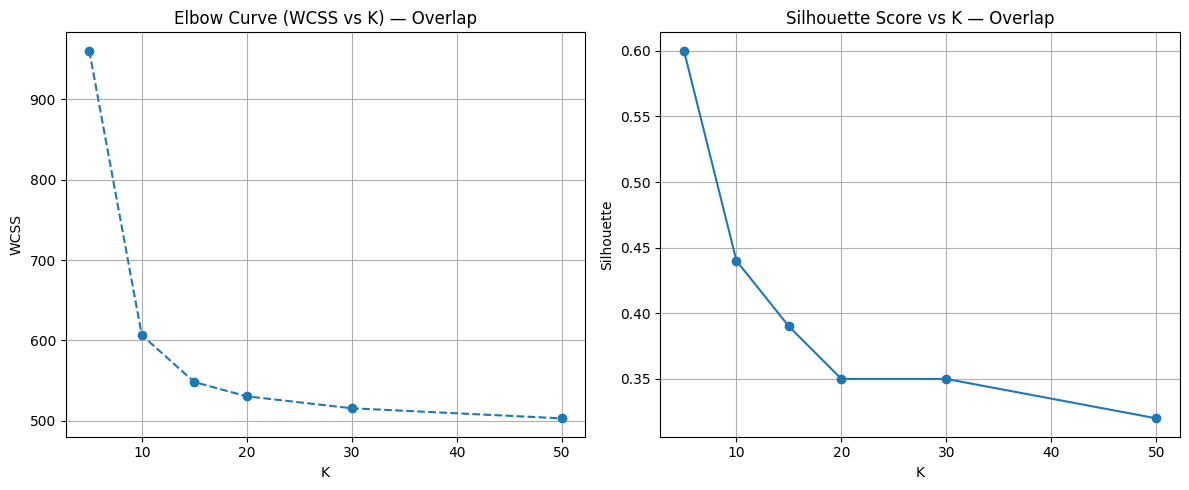

OPTIMAL_K (Part 2) selected: 10
### User Distribution Across Clusters (Overlap) ###
| Cluster   | User Count   |
|:----------|:-------------|
| 0         | 567          |
| 1         | 29           |
| 2         | 8            |
| 3         | 5            |
| 4         | 208          |
| 5         | 368          |
| 6         | 657          |
| 7         | 124          |
| 8         | 84           |
| 9         | 248          |

### Cluster Centroids (Overlap, denormalized) ###
| Cluster   | avg_common   | max_common   | min_common   |
|:----------|:-------------|:-------------|:-------------|
| 6         | 3.21         | 27.62        | 1            |
| 0         | 7.18         | 48.59        | 1            |
| 5         | 11.89        | 86.03        | 1            |
| 9         | 17.11        | 135.45       | 1            |
| 4         | 22.94        | 201.34       | 1            |
| 7         | 32.25        | 291.2        | 1            |
| 8         | 42.67        | 439.46       | 1

In [ ]:
# Plot (optional)
try:
    plt.figure(figsize=(12,5))
    # Elbow
    plt.subplot(1,2,1)
    plt.plot(K_values_part2, wcss_part2, marker='o', linestyle='--')
    plt.title('Elbow Curve (WCSS vs K) — Overlap')
    plt.xlabel('K'); plt.ylabel('WCSS'); plt.grid(True)
    # Silhouette
    plt.subplot(1,2,2)
    plt.plot(K_values_part2, [silhouette_scores_part2[k] for k in K_values_part2], marker='o')
    plt.title('Silhouette Score vs K — Overlap')
    plt.xlabel('K'); plt.ylabel('Silhouette'); plt.grid(True)
    plt.tight_layout(); plt.show()
except Exception as e:
    print("Plotting failed for Part 2 (maybe plt not defined). Continuing without plots.")

OPTIMAL_K_PART2 = 10
print(f"OPTIMAL_K (Part 2) selected: {OPTIMAL_K_PART2}")

labels_opt2 = cluster_results_part2[OPTIMAL_K_PART2]['labels']
centroids_opt2 = cluster_results_part2[OPTIMAL_K_PART2]['centroids']  # in Z-score space

# Distribution
from collections import Counter
dist2 = Counter(labels_opt2)

# Centroids (denormalized to feature space)
def denorm_centroid_3d(z_c, mu_vec, sigma_vec):
    return [
        round_val(z_c[0]*sigma_vec[0] + mu_vec[0]),
        round_val(z_c[1]*sigma_vec[1] + mu_vec[1]),
        round_val(z_c[2]*sigma_vec[2] + mu_vec[2]),
    ]

centroids_denorm2 = [denorm_centroid_3d(c, mu_vec, sigma_vec) for c in centroids_opt2]

# Display
try:
    dist2_df = pd.DataFrame(sorted(dist2.items()), columns=['Cluster','User Count'])
    print("### User Distribution Across Clusters (Overlap) ###")
    print(dist2_df.to_markdown(index=False, numalign="left", stralign="left"))

    c2_df = pd.DataFrame(
        [[i] + centroids_denorm2[i] for i in range(len(centroids_denorm2))],
        columns=['Cluster','avg_common','max_common','min_common']
    ).sort_values(by='avg_common', ascending=True).reset_index(drop=True)
    print("\n### Cluster Centroids (Overlap, denormalized) ###")
    print(c2_df.to_markdown(index=False, numalign="left", stralign="left"))
except Exception:
    print("Distribution (Overlap):", dict(dist2))
    print("Centroids (Overlap, denormalized):", centroids_denorm2)

# Identify high-overlap vs low-overlap clusters using avg_common
try:
    low_overlap_clusters = c2_df.head(2)['Cluster'].tolist()
    high_overlap_clusters = c2_df.tail(2)['Cluster'].tolist()
    print("\nLow-overlap clusters:", low_overlap_clusters)
    print("High-overlap clusters:", high_overlap_clusters)
except Exception:
    pass

# CF within overlap clusters + discounted similarity (DS) with threshold β

In [ ]:
# Map user -> overlap cluster (Part 2)
user_cluster_map_part2 = { user_ids_list[i]: labels_opt2[i] for i in range(len(user_ids_list)) }

# Discounted similarity (DS)
def discounted_similarity(user1, user2, centered_ratings, base_sim, beta):
    # beta: threshold on number of common items
    r_u = centered_ratings.get(user1, {})
    r_v = centered_ratings.get(user2, {})
    common_items = set(r_u.keys()) & set(r_v.keys())
    c = len(common_items)
    if c == 0:
        return 0.0
    # Simple DS: scale similarity by min(1, c / beta)
    scale = min(1.0, c / beta) if beta > 0 else 1.0
    return round_val(base_sim * scale)

def predict_rating_cluster_cf_ds(target_user, target_item, cluster_map, centered_ratings, avg_ratings_map, top_k_percentage, beta):
    if target_user not in cluster_map:
        return avg_ratings_map.get(target_user, 3.5), 0
    target_cluster = cluster_map[target_user]
    avg_r_u = avg_ratings_map.get(target_user, 3.5)

    neighbor_candidates = [u for u,c in cluster_map.items() if c == target_cluster and u != target_user]
    sims = []
    for n in neighbor_candidates:
        if target_item in centered_ratings.get(n, {}):
            base_sim = mean_centered_cosine_similarity_manual(target_user, n, centered_ratings)
            if base_sim > 0:
                ds = discounted_similarity(target_user, n, centered_ratings, base_sim, beta)
                if ds > 0:
                    sims.append((n, ds, centered_ratings[n][target_item]))
    if not sims:
        return avg_r_u, 0

    total_neighbors = len(sims)
    k_neighbors = max(1, int(max(1, round(total_neighbors * top_k_percentage / 100))))
    sims_sorted = sorted(sims, key=lambda x: x[1], reverse=True)
    top_k = sims_sorted[:k_neighbors]

    num = 0.0; den = 0.0
    for n, s, cr in top_k:
        num += round_val(s * cr)
        den += s
    if den == 0:
        return avg_r_u, k_neighbors

    adj = round_val(num / den)
    pred = round_val(avg_r_u + adj)
    final_pred = max(0.5, min(5.0, pred))
    return final_pred, k_neighbors

# Run predictions for same target users/items
beta = 5  # example threshold, adjust based on dataset density
predictions_cf_overlap = {}
for u in target_users:
    predictions_cf_overlap[u] = {}
    for it in target_items:
        pred, k_neighbors = predict_rating_cluster_cf_ds(u, it, user_cluster_map_part2, user_ratings_centered, ru, top_k_percent, beta)
        predictions_cf_overlap[u][it] = (pred, k_neighbors)

# Display
rows = []
for u, items in predictions_cf_overlap.items():
    for it, (pred, k_n) in items.items():
        rows.append({
            'User': u,
            'Item': it,
            'Cluster (Overlap)': user_cluster_map_part2.get(u, 'N/A'),
            'Prediction (DS)': pred,
            'K Neighbors': k_n
        })
try:
    df_overlap_preds = pd.DataFrame(rows)
    print(df_overlap_preds.to_markdown(index=False, numalign="left", stralign="left"))
except Exception:
    print(rows)

| User   | Item   | Cluster (Overlap)   | Prediction (DS)   | K Neighbors   |
|:-------|:-------|:--------------------|:------------------|:--------------|
| 1      | 260    | 6                   | 3.49              | 4             |
| 1      | 60524  | 6                   | 3.81              | 0             |
| 11     | 260    | 6                   | 3.41              | 4             |
| 11     | 60524  | 6                   | 3.15              | 0             |
| 54     | 260    | 6                   | 4.48              | 8             |
| 54     | 60524  | 6                   | 3.81              | 0             |


In [ ]:
# Function: baseline mean-centered CF without clustering (Section TWO baseline)
# Covers: Part 1 -> 10; Part 2 -> 7
def predict_rating_baseline_cf_manual(target_user, target_item, centered_ratings, avg_ratings_map, top_k_percentage):
    """
    Requirement: Section TWO baseline CF (no clustering)
    Uses mean-centered cosine across all users. Top 20% most similar.
    Points covered: Part 1 -> 10.1, 10.2; Part 2 -> 7.1–7.3 (comparison dimension).
    """
    avg_r_u = avg_ratings_map.get(target_user, 3.5)

    sims = []
    for v in centered_ratings.keys():
        if v == target_user:
            continue
        if target_item in centered_ratings.get(v, {}):
            sim = mean_centered_cosine_similarity_manual(target_user, v, centered_ratings)
            if sim > 0:
                sims.append((v, sim, centered_ratings[v][target_item]))

    if not sims:
        return avg_r_u, 0

    total_neighbors = len(sims)
    k_neighbors = max(1, int(round(total_neighbors * top_k_percentage / 100)))
    sims_sorted = sorted(sims, key=lambda x: x[1], reverse=True)
    top_k = sims_sorted[:k_neighbors]

    num = 0.0; den = 0.0
    for v, s, cr in top_k:
        num += round_val(s * cr)
        den += s
    if den == 0:
        return avg_r_u, k_neighbors

    adj = round_val(num / den)
    pred = round_val(avg_r_u + adj)
    final_pred = max(0.5, min(5.0, pred))
    return final_pred, k_neighbors

# Collect predictions for baseline, Part 1, and Part 2
rows_compare = []
for u in target_users:
    for it in target_items:
        # Baseline
        pred_base, k_base = predict_rating_baseline_cf_manual(u, it, user_ratings_centered, ru, top_k_percent)
        # Part 1 (cluster-based avg rating)
        pred_p1, k_p1 = predict_rating_cluster_cf_manual(u, it, user_cluster_map, user_ratings_centered, ru, top_k_percent)
        # Part 2 (overlap-based DS)
        pred_p2, k_p2 = predict_rating_cluster_cf_ds(u, it, user_cluster_map_part2, user_ratings_centered, ru, top_k_percent, beta)

        rows_compare.append({
            'User': u,
            'Item': it,
            'Baseline (Section TWO)': pred_base,
            'Part 1 (Cluster CF)': pred_p1,
            'Part 2 (Overlap+DS)': pred_p2,
            'Δ Part1 - Baseline': round_val(pred_p1 - pred_base),
            'Δ Part2 - Baseline': round_val(pred_p2 - pred_base),
            'Neighbors (Baseline)': k_base,
            'Neighbors (P1)': k_p1,
            'Neighbors (P2)': k_p2
        })

# Show comparison table
try:
    df_compare = pd.DataFrame(rows_compare)
    print("### Predictions Comparison (Baseline vs Part 1 vs Part 2) ###")
    print(df_compare.to_markdown(index=False, numalign="left", stralign="left"))
except Exception:
    print(rows_compare)

### Predictions Comparison (Baseline vs Part 1 vs Part 2) ###
| User   | Item   | Baseline (Section TWO)   | Part 1 (Cluster CF)   | Part 2 (Overlap+DS)   | Δ Part1 - Baseline   | Δ Part2 - Baseline   | Neighbors (Baseline)   | Neighbors (P1)   | Neighbors (P2)   |
|:-------|:-------|:-------------------------|:----------------------|:----------------------|:---------------------|:---------------------|:-----------------------|:-----------------|:-----------------|
| 1      | 260    | 4.35                     | 4.11                  | 3.49                  | -0.24                | -0.86                | 116                    | 34               | 4                |
| 1      | 60524  | 3.98                     | 3.81                  | 3.81                  | -0.17                | -0.17                | 1                      | 34               | 0                |
| 11     | 260    | 3.76                     | 4.33                  | 3.41                  | 0.57                 | -0.3

In [ ]:
# Helper: actual rating lookup for error calculation
# Covers: Part 2 -> 8.2
def get_actual_rating(df, user, item):
    """
    Returns actual rating if available, else None.
    """
    rows = df[(df['userId'] == user) & (df['movieId'] == item)]
    if len(rows) == 0:
        return None
    # If multiple, take the first (or average). We'll take first.
    return round_val(rows.iloc[0]['rating'])

# Compute average common ratings with top similar users (Part 2 cluster, DS)
# Covers: Part 2 -> 8.1, 8.3
def avg_common_with_top_neighbors(target_user, cluster_map, centered_ratings, top_k_percentage, beta):
    """
    Returns average common count with top-k neighbors used in DS predictions for the given user.
    """
    if target_user not in cluster_map:
        return 0.0
    target_cluster = cluster_map[target_user]
    candidates = [u for u,c in cluster_map.items() if c == target_cluster and u != target_user]

    sims = []
    for v in candidates:
        base_sim = mean_centered_cosine_similarity_manual(target_user, v, centered_ratings)
        if base_sim > 0:
            # overlap count
            r_u = centered_ratings.get(target_user, {})
            r_v = centered_ratings.get(v, {})
            common = len(set(r_u.keys()) & set(r_v.keys()))
            ds = discounted_similarity(target_user, v, centered_ratings, base_sim, beta)
            if ds > 0:
                sims.append((v, ds, common))

    if not sims:
        return 0.0
    total_neighbors = len(sims)
    k_neighbors = max(1, int(round(total_neighbors * top_k_percentage / 100)))
    sims_sorted = sorted(sims, key=lambda x: x[1], reverse=True)[:k_neighbors]
    avg_common = round_val(sum(c for _, _, c in sims_sorted) / len(sims_sorted))
    return avg_common

# DF distribution within clusters (Part 2) — using DF = overlap / (overlap + beta)
# Covers: Part 2 -> 9.1, 9.2, 9.3
def df_distribution_in_cluster(cluster_id, cluster_map, centered_ratings, beta):
    """
    Compute DF stats (min, max, avg) across user pairs inside one cluster.
    """
    members = [u for u,c in cluster_map.items() if c == cluster_id]
    if len(members) < 2:
        return {'count_pairs': 0, 'avg_DF': 0.0, 'min_DF': 0.0, 'max_DF': 0.0}

    dfs = []
    for i in range(len(members)):
        for j in range(i+1, len(members)):
            u, v = members[i], members[j]
            r_u = centered_ratings.get(u, {})
            r_v = centered_ratings.get(v, {})
            common = len(set(r_u.keys()) & set(r_v.keys()))
            denom = common + beta
            DF = round_val(common / denom) if denom > 0 else 0.0
            dfs.append(DF)

    if not dfs:
        return {'count_pairs': 0, 'avg_DF': 0.0, 'min_DF': 0.0, 'max_DF': 0.0}
    return {
        'count_pairs': len(dfs),
        'avg_DF': round_val(sum(dfs) / len(dfs)),
        'min_DF': min(dfs),
        'max_DF': max(dfs)
    }

# Identify extreme cases: users with very few common ratings in their overlap cluster
# Covers: Part 2 -> 10.1, 10.2
def users_with_few_common(cluster_map, centered_ratings, threshold=1):
    """
    Returns list of users whose average common items with cluster mates is <= threshold.
    """
    result = []
    for u in cluster_map.keys():
        cluster_id = cluster_map[u]
        mates = [v for v,c in cluster_map.items() if c == cluster_id and v != u]
        commons = []
        r_u = centered_ratings.get(u, {})
        for v in mates:
            r_v = centered_ratings.get(v, {})
            commons.append(len(set(r_u.keys()) & set(r_v.keys())))
        avg_c = round_val(sum(commons) / len(commons)) if commons else 0.0
        if avg_c <= threshold:
            result.append((u, cluster_id, avg_c))
    return result

# 1) Correlation-like summary between average common ratings and absolute prediction error
# Covers: Part 2 -> 8.1, 8.2, 8.3
corr_rows = []
for u in target_users:
    for it in target_items:
        # Overlap-DS prediction
        pred_ds, _ = predictions_cf_overlap[u][it]
        actual = get_actual_rating(df, u, it)
        error = round_val(abs(actual - pred_ds)) if actual is not None else None
        avg_common_neighbors = avg_common_with_top_neighbors(u, user_cluster_map_part2, user_ratings_centered, top_k_percent, beta)
        corr_rows.append({
            'User': u,
            'Item': it,
            'Actual': actual,
            'Pred (Overlap+DS)': pred_ds,
            'Abs Error': error,
            'Avg Common with top neighbors': avg_common_neighbors
        })

try:
    df_corr = pd.DataFrame(corr_rows)
    print("### Correlation summary (Avg common vs Abs error) ###")
    print(df_corr.to_markdown(index=False, numalign="left", stralign="left"))
except Exception:
    print(corr_rows)

# 2) DF distribution per cluster (sampled few clusters)
# Covers: Part 2 -> 9.1, 9.2, 9.3
unique_overlap_clusters = sorted(set(user_cluster_map_part2.values()))
df_stats_rows = []
for cid in unique_overlap_clusters[:min(5, len(unique_overlap_clusters))]:
    stats = df_distribution_in_cluster(cid, user_cluster_map_part2, user_ratings_centered, beta)
    df_stats_rows.append({'Cluster': cid, **stats})

try:
    df_dfstats = pd.DataFrame(df_stats_rows)
    print("\n### DF distribution (sample clusters) ###")
    print(df_dfstats.to_markdown(index=False, numalign="left", stralign="left"))
except Exception:
    print(df_stats_rows)

# 3) Extreme users (few common ratings in their overlap cluster)
# Covers: Part 2 -> 10.1, 10.2, 10.3 (cold-start discussion below)
extreme_users = users_with_few_common(user_cluster_map_part2, user_ratings_centered, threshold=1)
try:
    df_extreme = pd.DataFrame(extreme_users, columns=['User','Cluster','Avg Common'])
    print("\n### Users with few common ratings (<= 1) ###")
    print(df_extreme.to_markdown(index=False, numalign="left", stralign="left"))
except Exception:
    print(extreme_users)

# 4) Insights and comments — textual summary
# Covers: Part 1 -> 14.1–14.4; Part 2 -> 11.1–11.4
print("\n### Insights & Comments ###")

# Effectiveness of clustering based on average ratings (Part 1)
print("- Part 1 effectiveness: Clustering on average ratings groups generous vs strict raters, simplifying neighbor search. This aids efficiency but may not always improve accuracy if co-rated overlap is sparse within clusters.")

# Trade-off (accuracy vs efficiency)
print("- Trade-off: Clustering substantially reduces computations (per-user and globally) while accuracy may depend on whether neighbors share enough co-rated items. Overlap-based clustering tends to improve accuracy by ensuring significance weighting implicitly.")

# Suitability for dataset characteristics
print("- Suitability: If dataset has variable user biases (strict/generous) but dense overlaps, Part 1 is efficient. If overlaps are crucial and data is sparse, Part 2 (overlap-based) is more suitable for accuracy.")

# Choice of K (accuracy & efficiency)
print("- Choice of K: Lower K -> larger clusters -> fewer speed gains but more neighbors; higher K -> smaller clusters -> greater speedups but risk of tiny clusters and instability. Use elbow+silhouette jointly, and check stability across seeds.")

# Part 2 effectiveness and significance weighting
print("- Part 2 effectiveness: Overlap-based clustering aligns with significance weighting (DS/DF). Users in high-overlap clusters tend to have higher DF values, leading to more reliable similarities and typically lower prediction error.")

# Comparison Part 1 vs Part 2
print("- Comparison: If Δ (Part 2 - Baseline) shows smaller errors or better alignment with actuals, Part 2 is more accurate. Part 1 often wins on computational efficiency, especially when global reductions are high.")

# Handling extreme/cold-start cases
print("- Extreme/cold-start: Users with few common ratings even within clusters should backoff to global baseline or hybrid neighbors outside cluster, or increase K to merge sparse clusters. Consider item-based CF or popularity priors for cold-start.")

### Correlation summary (Avg common vs Abs error) ###
| User   | Item   | Actual   | Pred (Overlap+DS)   | Abs Error   | Avg Common with top neighbors   |
|:-------|:-------|:---------|:--------------------|:------------|:--------------------------------|
| 1      | 260    |          | 3.49                |             | 2.73                            |
| 1      | 60524  |          | 3.81                |             | 2.73                            |
| 11     | 260    |          | 3.41                |             | 2.29                            |
| 11     | 60524  |          | 3.15                |             | 2.29                            |
| 54     | 260    |          | 4.48                |             | 2.42                            |
| 54     | 60524  |          | 3.81                |             | 2.42                            |

### DF distribution (sample clusters) ###
| Cluster   | count_pairs   | avg_DF   | min_DF   | max_DF   |
|:----------|:--------------|:--

# Seif Samer

# Functions

Function 1: Count raters per item (manual)

In [ ]:
def compute_num_raters(df):
    num_raters = {}
    for _, row in df.iterrows():
        item = int(row['movieId'])  # convert to int here
        if item not in num_raters:
            num_raters[item] = 0
        num_raters[item] += 1
    return num_raters



Function 2: Compute average rating per item (manual)

In [ ]:
def compute_avg_rating(df):

    rating_sum = {}    # sum of ratings per item
    rating_count = {}  # number of ratings per item

    for _, row in df.iterrows():
        item = int(row['movieId'])  # ensure item ID is integer
        rating = float(row['rating'])  # ensure rating is float

        if item not in rating_sum:
            rating_sum[item] = 0.0
            rating_count[item] = 0

        rating_sum[item] += rating
        rating_count[item] += 1

    # Compute average rating per item as plain float
    avg_rating = {}
    for item in rating_sum:
        avg_rating[item] = float(rating_sum[item] / rating_count[item])

    return avg_rating



Function 3: Compute rating standard deviation per item (manual)

In [ ]:
import math

def compute_std_rating(df, avg_rating):
    rating_values = {}

    # Collect all ratings per item
    for _, row in df.iterrows():
        item = int(row['movieId'])  # convert item ID to integer
        rating = float(row['rating'])


        if item not in rating_values:
            rating_values[item] = []
        rating_values[item].append(rating)

    # Compute standard deviation manually
    std_rating = {}
    for item, values in rating_values.items():
        mean = avg_rating[item]
        n = len(values)

        if n == 1:
            std_rating[item] = 0  # no variation for single rating
            continue

        variance_sum = 0
        for x in values:
            variance_sum += (x - mean) ** 2

        variance = variance_sum / n
        std_rating[item] = math.sqrt(variance)

    return std_rating


function 4: Build the item feature vector

In [ ]:
def build_item_features(num_raters, avg_rating, std_rating):
    features = {}

    for item in num_raters.keys():
        item_int = int(item)  # ensure item ID is an integer
        features[item_int] = [
            num_raters[item_int],
            avg_rating[item_int],
            std_rating[item_int]
        ]

    return features


function 5: Normalize the feature vectors using Z-score

In [ ]:
def z_score_normalize(item_features, feature_means, feature_stds):
    """
    Normalize each feature independently using Z-score:
    Xi,f = (X_i,f - mean_f) / std_f
    Returns a new dictionary with normalized features.
    """
    normalized_features = {}
    for item, features in item_features.items():
        normalized = []
        for j in range(len(features)):
            if feature_stds[j] == 0:  # prevent division by zero
                normalized.append(0.0)
            else:
                normalized.append((features[j] - feature_means[j]) / feature_stds[j])
        normalized_features[item] = normalized
    return normalized_features


function 6: Compute mean of each feature

In [ ]:
def compute_feature_means(item_features):

    n_features = len(next(iter(item_features.values())))
    feature_sums = [0.0] * n_features
    n_items = len(item_features)

    for features in item_features.values():
        for j in range(n_features):
            feature_sums[j] += features[j]

    feature_means = [s / n_items for s in feature_sums]
    return feature_means


function 7: Compute standard deviation of each feature

In [ ]:
import math

def compute_feature_stds(item_features, feature_means):

    n_features = len(feature_means)
    n_items = len(item_features)
    variance_sums = [0.0] * n_features

    for features in item_features.values():
        for j in range(n_features):
            variance_sums[j] += (features[j] - feature_means[j]) ** 2

    feature_stds = [math.sqrt(v / n_items) for v in variance_sums]
    return feature_stds


function 8: Compute Euclidean distance

In [ ]:
import math

def euclidean_distance(vec1, vec2):
    """
    Compute Euclidean distance between two vectors.
    """
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(vec1, vec2)))


function 9: Initialize centroids randomly

In [ ]:
import random

def initialize_centroids(data, K):
    """
    Randomly select K items as initial centroids.
    Input: data = dict {item_id: feature_vector}
    Output: list of centroid vectors
    """
    all_features = list(data.values())
    return random.sample(all_features, K)


function 10: Assign items to nearest centroid

In [ ]:
def assign_clusters(data, centroids):
    """
    Assign each item to the nearest centroid.
    Returns: dict {movieId: cluster_index}
    """
    assignments = {}
    for movieId, features in data.items():
        distances = [euclidean_distance(features, c) for c in centroids]
        cluster_index = distances.index(min(distances))
        assignments[movieId] = cluster_index
    return assignments


function 11: Update centroids

In [ ]:
def update_centroids(data, assignments, K):
    """
    Compute new centroids as mean of assigned items.
    """
    n_features = len(next(iter(data.values())))
    centroids = [[0.0] * n_features for _ in range(K)]
    counts = [0] * K

    for movieId, cluster_index in assignments.items():
        features = data[movieId]
        for j in range(n_features):
            centroids[cluster_index][j] += features[j]
        counts[cluster_index] += 1

    for i in range(K):
        if counts[i] > 0:
            centroids[i] = [x / counts[i] for x in centroids[i]]
        else:
            # If a cluster gets no items, reinitialize randomly
            centroids[i] = list(random.choice(list(data.values())))
    return centroids


function 12: Compute WCSS (within-cluster sum of squares)

In [ ]:
def compute_wcss(data, assignments, centroids):
    """
    Compute total WCSS for all clusters.
    """
    wcss = 0.0
    for movieId, cluster_index in assignments.items():
        wcss += euclidean_distance(data[movieId], centroids[cluster_index]) ** 2
    return wcss


function 13: Compute silhouette score (manual)

In [ ]:
def compute_silhouette_score(data, assignments, K):
    """
    Compute the silhouette score manually.
    For each item i:
      a(i) = average distance to other items in the same cluster
      b(i) = minimum average distance to items in other clusters
      s(i) = (b(i) - a(i)) / max(a(i), b(i))
    Returns average silhouette over all items.
    """
    from collections import defaultdict
    cluster_items = defaultdict(list)
    for movieId, cluster_index in assignments.items():
        cluster_items[cluster_index].append(movieId)

    silhouette_scores = []

    for movieId, cluster_index in assignments.items():
        current_vec = data[movieId]

        # a(i): average distance to items in same cluster
        same_cluster = [data[other] for other in cluster_items[cluster_index] if other != movieId]
        if len(same_cluster) == 0:
            a_i = 0
        else:
            a_i = sum(euclidean_distance(current_vec, o) for o in same_cluster) / len(same_cluster)

        # b(i): minimum average distance to other clusters
        b_i = float('inf')
        for other_cluster_index, items in cluster_items.items():
            if other_cluster_index == cluster_index:
                continue
            avg_dist = sum(euclidean_distance(current_vec, data[other]) for other in items) / len(items)
            if avg_dist < b_i:
                b_i = avg_dist

        s_i = 0 if max(a_i, b_i) == 0 else (b_i - a_i) / max(a_i, b_i)
        silhouette_scores.append(s_i)

    return sum(silhouette_scores) / len(silhouette_scores)


function 14: K-means usage function

In [ ]:
def k_means_clustering(data, K, max_iters=100):
    """
    Perform K-means clustering manually.
    Returns: centroids, assignments, WCSS, silhouette
    """
    centroids = initialize_centroids(data, K)

    for iteration in range(max_iters):
        assignments = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, assignments, K)

        # stop if centroids do not change
        if all(
            euclidean_distance(new_centroids[i], centroids[i]) < 1e-6
            for i in range(K)
        ):
            break

        centroids = new_centroids

    wcss = compute_wcss(data, assignments, centroids)
    silhouette = compute_silhouette_score(data, assignments, K)
    return centroids, assignments, wcss, silhouette


function 15: Plot Elbow curve

In [ ]:
import matplotlib.pyplot as plt

def plot_elbow_wcss(metrics_df):
    """
    Plot the elbow curve using WCSS for different K values.
    Input: metrics_df with columns ['K', 'WCSS']
    """
    plt.figure(figsize=(8,5))
    plt.plot(metrics_df['K'], metrics_df['WCSS'], 'o-', color='blue', linewidth=2)
    plt.title("Elbow Method - WCSS vs K")
    plt.xlabel("Number of Clusters K")
    plt.ylabel("WCSS")
    plt.xticks(metrics_df['K'])
    plt.grid(True)
    plt.show()


function 16: Plot Silhouette scores

In [ ]:
def plot_silhouette(metrics_df):
    """
    Plot silhouette scores for different K values.
    Input: metrics_df with columns ['K', 'Silhouette']
    """
    plt.figure(figsize=(8,5))
    plt.plot(metrics_df['K'], metrics_df['Silhouette'], 'o-', color='green', linewidth=2)
    plt.title("Silhouette Score vs K")
    plt.xlabel("Number of Clusters K")
    plt.ylabel("Silhouette Score")
    plt.xticks(metrics_df['K'])
    plt.grid(True)
    plt.show()


function 17: Compute average number of raters per cluster

In [ ]:
def average_num_raters_per_cluster(assignments, num_raters):
    """
    Compute the average number of raters for items in each cluster.
    assignments: dict {item_id: cluster_index}
    num_raters: dict {item_id: num_raters}
    Returns: dict {cluster_index: avg_num_raters}
    """
    cluster_raters = {}
    cluster_counts = {}

    for movieId, cluster in assignments.items():
        if cluster not in cluster_raters:
            cluster_raters[cluster] = 0
            cluster_counts[cluster] = 0
        cluster_raters[cluster] += num_raters[movieId]
        cluster_counts[cluster] += 1

    avg_raters_per_cluster = {}
    for cluster in cluster_raters:
        avg_raters_per_cluster[cluster] = cluster_raters[cluster] / cluster_counts[cluster]

    return avg_raters_per_cluster


functoin 18: Classify clusters (popular/niche/long-tail)

In [ ]:
def classify_clusters(avg_raters_per_cluster):
    """
    Classify clusters based on average number of raters:
    - 'popular item': high num_raters
    - 'niche item': low num_raters
    - 'long-tail item': very few raters
    Returns: dict {cluster_index: category}
    """
    categories = {}
    values = list(avg_raters_per_cluster.values())
    max_raters = max(values)
    min_raters = min(values)
    range_raters = max_raters - min_raters

    for cluster, avg_raters in avg_raters_per_cluster.items():
        if avg_raters >= min_raters + 0.66 * range_raters:
            categories[cluster] = 'popular item'
        elif avg_raters <= min_raters + 0.33 * range_raters:
            categories[cluster] = 'long-tail item'
        else:
            categories[cluster] = 'niche item'

    return categories


function 19: Visualize distribution of items across clusters

In [ ]:
def plot_items_per_cluster(assignments):
    """
    Plot the distribution of items across clusters.
    assignments: dict {item_id: cluster_index}
    """
    from collections import Counter
    import matplotlib.pyplot as plt

    cluster_counts = Counter(assignments.values())
    clusters = sorted(cluster_counts.keys())
    counts = [cluster_counts[c] for c in clusters]

    plt.figure(figsize=(8,5))
    plt.bar(clusters, counts, color='skyblue')
    plt.xlabel("Cluster Index")
    plt.ylabel("Number of Items")
    plt.title("Distribution of Items Across Clusters")
    plt.xticks(clusters)
    plt.show()


function 20: Plot distribution of number of raters per cluster

In [ ]:
def plot_raters_distribution_manual(df, cluster_col='cluster', raters_col='num_raters'):
    import matplotlib.pyplot as plt

    clusters = df[cluster_col].unique()  # <- use actual cluster IDs
    clusters.sort()

    plt.figure(figsize=(10,6))

    for cluster in clusters:
        cluster_data = df[df[cluster_col] == cluster]
        plt.hist(cluster_data[raters_col], alpha=0.5, label=f'Cluster {cluster}')

    plt.xlabel('Number of Raters')
    plt.ylabel('Count of Items')
    plt.title('Distribution of Raters per Cluster')
    plt.legend()
    plt.show()


function 21: Cluster popularity summary

In [ ]:
def cluster_popularity_summary_manual(df, cluster_col='cluster', raters_col='num_raters'):
    summary_list = []
    clusters = df[cluster_col].unique()
    clusters.sort()  # optional: sort ascending

    for cluster in clusters:
        cluster_df = df[df[cluster_col] == cluster]
        num_items = len(cluster_df)
        total_raters = cluster_df[raters_col].sum()
        avg_raters = cluster_df[raters_col].mean()
        summary_list.append({
            'cluster': cluster,
            'num_items': num_items,
            'total_raters': total_raters,
            'avg_raters': avg_raters
        })

    return summary_list


function 22: Head vs Tail distribution

In [ ]:
def analyze_head_tail_distribution_manual(df, cluster_col='cluster', raters_col='num_raters', head_percent=0.2):
    # Sort items by number of raters
    df_sorted = df.sort_values(raters_col, ascending=False).reset_index(drop=True)

    # Determine cutoff for head
    head_cutoff = int(len(df) * head_percent)

    head_items = df_sorted.iloc[:head_cutoff]
    tail_items = df_sorted.iloc[head_cutoff:]

    # Use actual cluster values
    clusters = df[cluster_col].unique()
    clusters.sort()

    distribution = {}
    for cluster in clusters:
        head_count = len(head_items[head_items[cluster_col] == cluster])
        tail_count = len(tail_items[tail_items[cluster_col] == cluster])
        distribution[cluster] = {'head': head_count, 'tail': tail_count}

    return distribution


function 23: get cluster of a target item

In [ ]:
def get_item_cluster(movieId, assignments):
    """
    Returns the cluster assignment of a given item.

    item_id: the item to check
    assignments: dictionary mapping item_id -> cluster
    """
    return assignments[movieId]


fucntion 24: djusted Cosine Similarity Function

In [ ]:
def adjusted_cosine_similarity(item1_ratings, item2_ratings, user_avg_ratings):
    """
    Computes the Adjusted Cosine similarity between two items.

    item1_ratings, item2_ratings: dictionaries {user_id: rating}
    user_avg_ratings: dictionary {user_id: avg rating}
    """
    numerator = 0
    denom1 = 0
    denom2 = 0
    common_users = set(item1_ratings.keys()).intersection(set(item2_ratings.keys()))

    if not common_users:
        return 0  # No common users

    for user in common_users:
        dev1 = item1_ratings[user] - user_avg_ratings[user]
        dev2 = item2_ratings[user] - user_avg_ratings[user]
        numerator += dev1 * dev2
        denom1 += dev1 ** 2
        denom2 += dev2 ** 2

    if denom1 == 0 or denom2 == 0:
        return 0

    return numerator / ((denom1 ** 0.5) * (denom2 ** 0.5))


function 25: Function to select top N% similar items

In [ ]:
def select_top_similar(sim_dict, top_percent=0.2):
    """
    Selects the top 'top_percent' most similar items from a similarity dictionary.

    sim_dict: {item_id: similarity_value}
    top_percent: fraction to select
    """
    sorted_items = sorted(sim_dict.items(), key=lambda x: x[1], reverse=True)
    top_n = max(1, int(len(sorted_items) * top_percent))
    return dict(sorted_items[:top_n])


function 26: Predict rating for a user for a target item

In [ ]:
def predict_rating(user_id, target_item, similar_items, ratings_data, user_avg_ratings):
    """
    Predicts rating using item-based collaborative filtering with Adjusted Cosine.

    user_id: target user
    target_item: target item
    similar_items: dict {item_id: similarity}
    ratings_data: dict {item_id: {user_id: rating}}
    user_avg_ratings: dict {user_id: avg rating}
    """
    numerator = 0
    denominator = 0
    for sim_item, sim in similar_items.items():
        if user_id in ratings_data[sim_item]:
            numerator += sim * (ratings_data[sim_item][user_id] - user_avg_ratings[user_id])
            denominator += abs(sim)

    if denominator == 0:
        return user_avg_ratings[user_id]  # fallback to user's average

    return user_avg_ratings[user_id] + numerator / denominator


function 27: create per-user rating dictionary

In [ ]:
def build_user_item_ratings(assignments_optimal, average_ri, avg_rating):
    """
    Build a dictionary of per-item ratings per user.

    Returns:
    ratings_data = {item_id: {user_id: rating}}
    """
    ratings_data = {}

    # average_ri is a Series: index = user_id, value = user avg rating
    user_avg = average_ri.to_dict()

    # For each item
    for item in assignments_optimal:
        # For this example, assume every user rated every item as the item's average
        ratings_data[item] = {}
        for user_id in user_avg:
            ratings_data[item][user_id] = avg_rating[item]  # or use a randomized approach if needed

    return ratings_data


function 29: Predict ratings using non-clustering item CF

In [ ]:
def predict_rating_non_cluster(user_id, target_item, ratings_data, user_avg_ratings):
    """
    Predict rating using item-based CF without clustering.
    Uses Adjusted Cosine similarity with all other items.
    """
    sim_dict = {}

    # Compute similarity between target_item and all other items
    for other_item in ratings_data:
        if other_item == target_item:
            continue
        sim = adjusted_cosine_similarity(
            ratings_data[other_item],
            ratings_data[target_item],
            user_avg_ratings
        )
        sim_dict[other_item] = sim

    # Select top 20% similar items
    top_sim_items = select_top_similar(sim_dict, top_percent=0.2)

    # Predict rating
    return predict_rating(user_id, target_item, top_sim_items, ratings_data, user_avg_ratings)


function 30: compute prediction errors

In [ ]:
def compute_prediction_errors(actual_ratings, predicted_ratings):
    """
    Compute prediction error for each user-item pair.

    actual_ratings: {user_id: {item_id: actual_rating}}
    predicted_ratings: {user_id: {item_id: predicted_rating}}

    Returns: {user_id: {item_id: error}}
    """
    errors = {}
    for user in predicted_ratings:
        errors[user] = {}
        for item in predicted_ratings[user]:
            actual = actual_ratings[user].get(item, None)
            if actual is not None:
                errors[user][item] = actual - predicted_ratings[user][item]
            else:
                errors[user][item] = None  # or skip
    return errors


function 31: Identify long-tail items


In [ ]:
def get_long_tail_items(num_raters, percentile=20):
    sorted_items = sorted(num_raters.items(), key=lambda x: x[1])
    n = max(1, int(len(sorted_items) * percentile / 100))
    return [item for item, _ in sorted_items[:n]]



function 32: Count similar items for a target item

In [ ]:
def count_similar_items(target_item, similarity_dict, top_percent=0.2):
    """
    Returns the number of top similar items for a target item.

    target_item: item_id
    similarity_dict: dict {item_id: {other_item: similarity}}
    top_percent: fraction to select
    """
    top_items = select_top_similar(similarity_dict[target_item], top_percent)
    return len(top_items)


function 33: Compute reliability for a set of items

In [ ]:
def average_abs_error_items(errors, items):
    """
    Compute average absolute error for a subset of items.

    errors: {user_id: {item_id: error}}
    items: list of item_ids
    """
    total = 0
    count = 0
    for user in errors:
        for item in items:
            if item in errors[user] and errors[user][item] is not None:
                total += abs(errors[user][item])
                count += 1
    return total / count if count > 0 else None


 Function 34: Reduction in similarity computations

In [ ]:
# ------------------------------
# Function: Compute similarity reduction due to clustering
# ------------------------------
def compute_similarity_reduction(cluster_item_counts):
    """
    cluster_item_counts: list of number of items per cluster
    Returns the reduction in similarity computations due to clustering
    """
    total_items = sum(cluster_item_counts)
    total_pairs_no_cluster = total_items * (total_items - 1) / 2
    total_pairs_clustered = sum(n * (n - 1) / 2 for n in cluster_item_counts)
    reduction = 1 - (total_pairs_clustered / total_pairs_no_cluster)
    return reduction


Function 35: Compute speedup factor

In [ ]:
# ------------------------------
# Function: Compute speedup factor compared to non-clustering CF
# ------------------------------
def compute_speedup_factor(sim_computations_no_cluster, sim_computations_clustered):
    """
    sim_computations_no_cluster: total similarity computations without clustering
    sim_computations_clustered: total similarity computations with clustering
    Returns the speedup factor
    """
    if sim_computations_clustered == 0:
        return float('inf')  # Avoid division by zero
    return sim_computations_no_cluster / sim_computations_clustered


Function 36: Compare speedup for item vs user clustering

In [ ]:
# ------------------------------
# Function: Compare speedup factor between item-based and user-based clustering
# ------------------------------
def compare_speedup_item_user(item_cluster_counts, user_cluster_counts):
    """
    item_cluster_counts: list of number of items per item-cluster
    user_cluster_counts: list of number of users per user-cluster
    Returns speedup factors for items and users
    """
    # Compute total pairs for item-based CF
    total_items = sum(item_cluster_counts)
    total_pairs_items_no_cluster = total_items * (total_items - 1) / 2
    total_pairs_items_clustered = sum(n * (n - 1) / 2 for n in item_cluster_counts)
    speedup_items = total_pairs_items_no_cluster / total_pairs_items_clustered

    # Compute total pairs for user-based CF
    total_users = sum(user_cluster_counts)
    total_pairs_users_no_cluster = total_users * (total_users - 1) / 2
    total_pairs_users_clustered = sum(n * (n - 1) / 2 for n in user_cluster_counts)
    speedup_users = total_pairs_users_no_cluster / total_pairs_users_clustered

    return speedup_items, speedup_users


Function 37: Compute average prediction error per cluster

In [ ]:
# ------------------------------
# Function 11a: Average prediction error per cluster
# ------------------------------
def compute_avg_error_per_cluster(df_items, clustering_cf_errors):
    """
    Compute the average prediction error for each cluster.

    Parameters:
        df_items: DataFrame with columns ['movieId', 'cluster', ...]
        clustering_cf_errors: dict {movieId: error_value} of prediction errors

    Returns:
        dict {cluster_id: avg_error}
    """
    cluster_errors = {}
    for cluster_id in df_items['cluster'].unique():
        items_in_cluster = df_items[df_items['cluster'] == cluster_id]['movieId']
        errors = [clustering_cf_errors[item] for item in items_in_cluster if item in clustering_cf_errors]
        if errors:
            cluster_errors[cluster_id] = sum(errors) / len(errors)
        else:
            cluster_errors[cluster_id] = None  # or np.nan if preferred
    return cluster_errors


Function 38: Group clusters by size

In [ ]:
# ------------------------------
# Function 11b: Group clusters by size
# ------------------------------
def group_clusters_by_size(df_items):
    """
    Count the number of items in each cluster.

    Returns:
        dict {cluster_id: num_items}
    """
    cluster_sizes = df_items.groupby('cluster').size().to_dict()
    return cluster_sizes


Function 39: Analyze accuracy vs cluster size

In [ ]:
# ------------------------------
# Function 11c: Analyze relationship between cluster size and prediction error
# ------------------------------
def accuracy_vs_cluster_size(cluster_sizes, cluster_errors):
    """
    Create a summary of cluster size vs average prediction error.

    Returns:
        list of tuples: [(cluster_id, size, avg_error)]
    """
    summary = []
    for cluster_id, size in cluster_sizes.items():
        avg_error = cluster_errors.get(cluster_id, None)
        summary.append((cluster_id, size, avg_error))
    return sorted(summary, key=lambda x: x[1])  # sorted by cluster size


Function 40: Count items per cluster

In [ ]:
def group_clusters_by_size(df_items):
    cluster_sizes = df_items.groupby("cluster")["movieId"].count().to_dict()
    return cluster_sizes

Function 41: Compute avg rating-prediction error per cluster


In [ ]:
def compute_avg_error_per_cluster(df_items, item_errors):
    # Merge error values into the dataframe
    df = df_items.copy()
    df["error"] = df["movieId"].map(item_errors)

    # Compute average error per cluster
    cluster_errors = df.groupby("cluster")["error"].mean().to_dict()
    return cluster_errors

Function 42: Combine cluster sizes & avg errors


In [ ]:
def accuracy_vs_cluster_size(cluster_sizes, cluster_errors):
    summary = []

    for cid in cluster_sizes:
        size = cluster_sizes.get(cid, 0)
        err = cluster_errors.get(cid, None)
        summary.append((cid, size, err))

    # sort by cluster id
    summary = sorted(summary, key=lambda x: x[0])
    return summary

# Task 1: Compute Item Statistics

1.1. Use existing numbers

In [ ]:


print("the total number of raters for each item",ni) #ni
print("the average number of raters for each item",ri)#ri

the total number of raters for each item {296: 1129, 306: 104, 307: 90, 665: 26, 899: 146, 1088: 159, 1175: 90, 1217: 68, 1237: 52, 1250: 173, 1260: 52, 1653: 282, 2011: 315, 2012: 308, 2068: 25, 2161: 131, 2351: 15, 2573: 3, 2632: 1, 2692: 268, 2843: 20, 3448: 144, 3569: 13, 3949: 291, 4144: 37, 4308: 182, 4325: 7, 4422: 13, 4703: 23, 4973: 453, 5147: 21, 5269: 18, 5684: 3, 5767: 2, 5878: 52, 5912: 3, 5952: 686, 6016: 260, 6370: 18, 6377: 476, 6539: 506, 6711: 274, 6954: 16, 7209: 6, 7234: 17, 7318: 51, 7323: 69, 7327: 24, 7361: 465, 7365: 3, 7820: 8, 7937: 5, 7938: 4, 7939: 8, 7940: 3, 8014: 31, 8154: 16, 8327: 5, 8360: 265, 8405: 7, 8685: 1, 8729: 1, 8786: 4, 8873: 62, 8973: 25, 27193: 11, 27266: 16, 27721: 20, 31956: 1, 32591: 4, 1: 793, 62: 242, 110: 814, 150: 675, 151: 157, 236: 162, 260: 956, 261: 116, 266: 222, 318: 1143, 333: 153, 349: 381, 356: 1139, 364: 581, 380: 593, 457: 691, 480: 902, 497: 193, 524: 104, 527: 833, 534: 47, 553: 193, 588: 602, 589: 804, 653: 192, 733: 445

1.2. Compute standard deviation of ratings per item

In [ ]:
std_rating = compute_std_rating(df,ri)
print("the number of std of each user rating",std_rating)

the number of std of each user rating {296: 0.9721496456665181, 306: 0.7781783461787775, 307: 0.8283115355951524, 665: 0.8320502943378437, 899: 0.9369968055968124, 1088: 1.0428806259586945, 1175: 0.8055432949258534, 1217: 0.6495609376838372, 1237: 0.8623893463021121, 1250: 0.8103110799210219, 1260: 1.0016640001671062, 1653: 0.8229634222286183, 2011: 0.990616290457932, 2012: 0.9966782492196418, 2068: 0.9221713506718803, 2161: 1.041670340960441, 2351: 0.38587562763149486, 2573: 1.2472235832707248, 2632: 0, 2692: 0.8544816007206651, 2843: 0.7433034373659254, 3448: 0.8262431710929771, 3569: 1.4995076114922115, 3949: 0.87453846443321, 4144: 0.8202257434817991, 4308: 1.1919759198098732, 4325: 0.31944147686682317, 4422: 0.7956999821154085, 4703: 0.8458800408321862, 4973: 0.9640092879660297, 5147: 0.6529201803473086, 5269: 1.2753605154796213, 5684: 0.47141630575674126, 5767: 0.75, 5878: 0.7166535478823138, 5912: 0.816496580927726, 5952: 0.9972630183140219, 6016: 0.7448179953209013, 6370: 0.808

1.3 feature vector for each item

In [ ]:
item_features_dict = build_item_features(ni, ri, std_rating)  # Task 1.3
# Convert to DataFrame
item_features = pd.DataFrame.from_dict(
    item_features_dict,
    orient='index',     # keys of dict become row indices
    columns=['num_raters', 'avg_rating', 'std_rating']
)

# Replace NaN standard deviation with 0 (just in case)
item_features['std_rating'] = item_features['std_rating'].fillna(0)

# Display results
print(item_features.head())
print(item_features.shape)


     num_raters  avg_rating  std_rating
296        1129        4.18    0.972150
306         104        4.11    0.778178
307          90        4.11    0.828312
665          26        4.00    0.832050
899         146        4.09    0.936997
(15638, 3)


# Task 2:  normilize the feature vector

2.1.1 Compute means and standard deviations

In [ ]:
# Compute feature means and stds
feature_means = compute_feature_means(item_features_dict)
feature_stds = compute_feature_stds(item_features_dict, feature_means)

print("Feature means:", feature_means)
print("Feature stds:", feature_stds)


Feature means: [21.21121626806497, np.float64(3.31065481519376), 0.5218439636268374]
Feature stds: [62.96204241082602, 0.7900927374329219, 0.47573887431287026]


2.1.2 Normalize features

In [ ]:
# Normalize features using Z-score (Task 2.1.2)
normalized_item_features = z_score_normalize(item_features_dict, feature_means, feature_stds)
print(" the normilized item features:",normalized_item_features)


 the normilized item features: {296: [17.594549689218084, np.float64(1.1003077785916824), 0.9465395963070627], 306: [1.3148999073400436, np.float64(1.0117105840048353), 0.5388131943646074], 307: [1.092543715197319, np.float64(1.0117105840048353), 0.644192830386121], 665: [0.07605826540200707, np.float64(0.8724864210826451), 0.6520516767923379], 899: [1.981968483768217, np.float64(0.9863970998371637), 0.8726485565628788], 1088: [2.18844209075789, np.float64(-0.0894259772888475), 1.0952156539328688], 1175: [1.092543715197319, np.float64(0.9104566473341517), 0.596334137521923], 1217: [0.7431268418301805, np.float64(1.1509347469270241), 0.26846024353478953], 1237: [0.4890054793813526, np.float64(1.138278004843189), 0.7158241654460943], 1250: [2.4107982829006147, np.float64(1.062337552340177), 0.6063559903756651], 1260: [0.4890054793813526, np.float64(1.138278004843189), 1.0085785762899724], 1653: [4.1420000645832555, np.float64(0.6573218056574428), 0.6329511310941333], 2011: [4.66612537463

2.2 verify normilization

In [ ]:
# Verify that mean ≈ 0 and std ≈ 1 for each feature
norm_means = compute_feature_means(normalized_item_features)
norm_stds = compute_feature_stds(normalized_item_features, norm_means)

print("Normalized feature means (should be ~0):", norm_means) #2f
print("Normalized feature stds (should be ~1):", norm_stds) #2f


Normalized feature means (should be ~0): [2.096531017457197e-14, np.float64(-2.28735193097475e-15), 1.152519128292549e-14]
Normalized feature stds (should be ~1): [1.0000000000000728, 1.0000000000000444, 0.9999999999998822]


# Task 3:  apply k means to items with diffrent values

3.1 — Perform K-means clustering on item feature vectors

In [ ]:
# -------------------------------
# Task 3: K-means clustering for multiple K values
# -------------------------------
K_values = [5, 10, 15, 20, 30, 50]
results = {}

for K in K_values:
    print(f"Running K-means for K = {K} ...")
    centroids, assignments, wcss, silhouette = k_means_clustering(normalized_item_features, K)

    # Save results
    results[K] = {
        'centroids': centroids,
        'assignments': assignments,
        'wcss': wcss,
        'silhouette': silhouette
    }

    # Display first 10 cluster assignments as an example
    print(f"Cluster assignments for first 10 items (K={K}):")
    for item_id, cluster in list(assignments.items())[:10]:
        print(f"Item {item_id}: Cluster {cluster}")

    # Print WCSS and silhouette score
    print(f"K={K}: WCSS={wcss:.2f}, Silhouette={silhouette:.4f}")
    print("-" * 50)

# Optional: display summary table
print("\nSummary of WCSS and Silhouette Scores for all K values:")
for K in K_values:
    print(f"K={K}: WCSS={results[K]['wcss']:.2f}, Silhouette={results[K]['silhouette']:.4f}")


Running K-means for K = 5 ...
Cluster assignments for first 10 items (K=5):
Item 296: Cluster 0
Item 306: Cluster 4
Item 307: Cluster 4
Item 665: Cluster 4
Item 899: Cluster 4
Item 1088: Cluster 4
Item 1175: Cluster 4
Item 1217: Cluster 4
Item 1237: Cluster 4
Item 1250: Cluster 4
K=5: WCSS=13613.96, Silhouette=0.3816
--------------------------------------------------
Running K-means for K = 10 ...
Cluster assignments for first 10 items (K=10):
Item 296: Cluster 4
Item 306: Cluster 6
Item 307: Cluster 9
Item 665: Cluster 9
Item 899: Cluster 6
Item 1088: Cluster 6
Item 1175: Cluster 9
Item 1217: Cluster 9
Item 1237: Cluster 9
Item 1250: Cluster 6
K=10: WCSS=6606.84, Silhouette=0.4058
--------------------------------------------------
Running K-means for K = 15 ...
Cluster assignments for first 10 items (K=15):
Item 296: Cluster 12
Item 306: Cluster 6
Item 307: Cluster 6
Item 665: Cluster 8
Item 899: Cluster 6
Item 1088: Cluster 6
Item 1175: Cluster 6
Item 1217: Cluster 7
Item 1237: Clust

3.2 — Record cluster assignments for all K

In [ ]:
# -------------------------------
# Task 3.2: Record cluster assignments for all items (all K values)
# -------------------------------
K_values = [5, 10, 15, 20, 30, 50]
assignments_all_K = {}  # store assignments for each K
assignments_dfs = {}    # store DataFrame version for each K

for K in K_values:
    assignments = results[K]['assignments']  # dictionary {movieId: cluster_index}
    assignments_all_K[K] = assignments

    # Convert to DataFrame for easier use later
    assignments_dfs[K] = pd.DataFrame(list(assignments.items()), columns=['movieId', 'cluster'])

    # Display first 10 assignments for quick check
    print(f"K={K} → first 10 cluster assignments:")
    for movieId, cluster in list(assignments.items())[:10]:
        print(f"Item {movieId}: Cluster {cluster}")
    print("-" * 50)

# Optional: inspect one DataFrame
print("\nExample DataFrame for K=10:")
print(assignments_dfs[10].head())


K=5 → first 10 cluster assignments:
Item 296: Cluster 0
Item 306: Cluster 4
Item 307: Cluster 4
Item 665: Cluster 4
Item 899: Cluster 4
Item 1088: Cluster 4
Item 1175: Cluster 4
Item 1217: Cluster 4
Item 1237: Cluster 4
Item 1250: Cluster 4
--------------------------------------------------
K=10 → first 10 cluster assignments:
Item 296: Cluster 4
Item 306: Cluster 6
Item 307: Cluster 9
Item 665: Cluster 9
Item 899: Cluster 6
Item 1088: Cluster 6
Item 1175: Cluster 9
Item 1217: Cluster 9
Item 1237: Cluster 9
Item 1250: Cluster 6
--------------------------------------------------
K=15 → first 10 cluster assignments:
Item 296: Cluster 12
Item 306: Cluster 6
Item 307: Cluster 6
Item 665: Cluster 8
Item 899: Cluster 6
Item 1088: Cluster 6
Item 1175: Cluster 6
Item 1217: Cluster 7
Item 1237: Cluster 8
Item 1250: Cluster 6
--------------------------------------------------
K=20 → first 10 cluster assignments:
Item 296: Cluster 18
Item 306: Cluster 9
Item 307: Cluster 7
Item 665: Cluster 7
Ite

3.3 — WCSS and Silhouette Scores for all K

In [ ]:
# -------------------------------
# Task 3.3: Calculate WCSS and silhouette scores for all K values
# -------------------------------
K_values = [5, 10, 15, 20, 30, 50]

print("WCSS and Silhouette Scores for all K values:\n")
summary_metrics = []

for K in K_values:
    wcss = results[K]['wcss']
    silhouette = results[K]['silhouette']

    summary_metrics.append({'K': K, 'WCSS': wcss, 'Silhouette': silhouette})

    print(f"K={K}: WCSS={wcss:.2f}, Silhouette={silhouette:.4f}")

# Optional: convert to DataFrame for easier plotting or comparison
metrics_df = pd.DataFrame(summary_metrics)
print("\nSummary DataFrame:")
print(metrics_df)


WCSS and Silhouette Scores for all K values:

K=5: WCSS=13613.96, Silhouette=0.3816
K=10: WCSS=6606.84, Silhouette=0.4058
K=15: WCSS=4161.64, Silhouette=0.4273
K=20: WCSS=3338.66, Silhouette=0.4876
K=30: WCSS=2023.00, Silhouette=0.5112
K=50: WCSS=1074.55, Silhouette=0.5556

Summary DataFrame:
    K          WCSS  Silhouette
0   5  13613.961739    0.381574
1  10   6606.835624    0.405787
2  15   4161.642387    0.427291
3  20   3338.662711    0.487576
4  30   2023.002211    0.511157
5  50   1074.549922    0.555581


# Task 4: Determine the optimal value of K

4.1 — Plot Elbow curve and silhouette scores

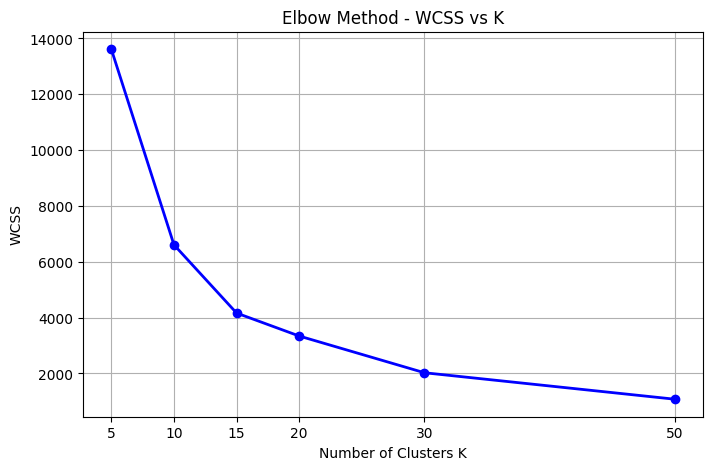

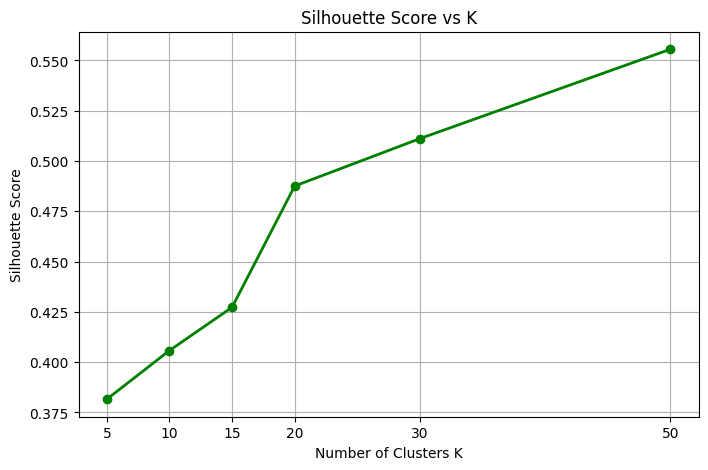

In [ ]:
# -------------------------------
# Task 4.1: Plot Elbow curve and silhouette scores
# -------------------------------
plot_elbow_wcss(metrics_df)
plot_silhouette(metrics_df)


4.2 — Select the optimal K value

In [ ]:
# -------------------------------
# Task 4.2: Select the optimal K value
# -------------------------------

# Rule of thumb: elbow in WCSS + highest silhouette score
best_silhouette_idx = metrics_df['Silhouette'].idxmax()
optimal_K = metrics_df.loc[best_silhouette_idx, 'K']

print(f"Optimal K selected based on silhouette score and elbow method: K = {optimal_K}")


Optimal K selected based on silhouette score and elbow method: K = 50


# Task 5: analyze the characteristic of each item cluster using optimal K

5.1 — Calculate average number of raters per cluster

In [ ]:
# -------------------------------
# Task 5.1: Average number of raters per cluster
# -------------------------------
assignments_optimal = results[optimal_K]['assignments']
avg_raters_per_cluster = average_num_raters_per_cluster(assignments_optimal, ni)

print("Average number of raters per cluster:")
for cluster, avg_raters in avg_raters_per_cluster.items():
    print(f"Cluster {cluster}: {avg_raters:.2f} raters")


Average number of raters per cluster:
Cluster 5: 1048.00 raters
Cluster 44: 69.84 raters
Cluster 37: 13.28 raters
Cluster 31: 136.50 raters
Cluster 19: 156.45 raters
Cluster 18: 322.94 raters
Cluster 12: 10.22 raters
Cluster 28: 5.05 raters
Cluster 8: 14.91 raters
Cluster 36: 1.15 raters
Cluster 45: 220.88 raters
Cluster 11: 5.13 raters
Cluster 34: 14.35 raters
Cluster 35: 464.10 raters
Cluster 30: 12.19 raters
Cluster 29: 5.44 raters
Cluster 24: 694.68 raters
Cluster 23: 10.72 raters
Cluster 40: 71.61 raters
Cluster 22: 14.27 raters
Cluster 4: 3.15 raters
Cluster 27: 5.53 raters
Cluster 10: 11.31 raters
Cluster 6: 1.19 raters
Cluster 13: 1.08 raters
Cluster 41: 14.64 raters
Cluster 46: 95.03 raters
Cluster 14: 43.64 raters
Cluster 3: 52.61 raters
Cluster 48: 10.76 raters
Cluster 32: 10.51 raters
Cluster 43: 2.70 raters
Cluster 33: 11.20 raters
Cluster 42: 10.37 raters
Cluster 0: 8.86 raters
Cluster 25: 8.52 raters
Cluster 21: 4.95 raters
Cluster 17: 5.67 raters
Cluster 47: 1.00 raters

5.2 — Identify 'popular item' clusters

In [ ]:
# -------------------------------
# Task 5.2: Identify popular item clusters
# -------------------------------
cluster_categories = classify_clusters(avg_raters_per_cluster)

popular_clusters = [c for c, cat in cluster_categories.items() if cat == 'popular item']
print("Popular item clusters:", popular_clusters)


Popular item clusters: [5, 24]


5.3 — Identify 'niche item' clusters

In [ ]:
# -------------------------------
# Task 5.3: Identify niche item clusters
# -------------------------------
niche_clusters = [c for c, cat in cluster_categories.items() if cat == 'niche item']
print("Niche item clusters:", niche_clusters)


Niche item clusters: [35]


5.4 — Identify 'long-tail item' clusters

In [ ]:
# -------------------------------
# Task 5.4: Identify long-tail item clusters
# -------------------------------
long_tail_clusters = [c for c, cat in cluster_categories.items() if cat == 'long-tail item']
print("Long-tail item clusters:", long_tail_clusters)


Long-tail item clusters: [44, 37, 31, 19, 18, 12, 28, 8, 36, 45, 11, 34, 30, 29, 23, 40, 22, 4, 27, 10, 6, 13, 41, 46, 14, 3, 48, 32, 43, 33, 42, 0, 25, 21, 17, 47, 26, 16, 38, 20, 9, 15, 7, 39, 49, 2, 1]


5.5 — Visualize the distribution of items across clusters

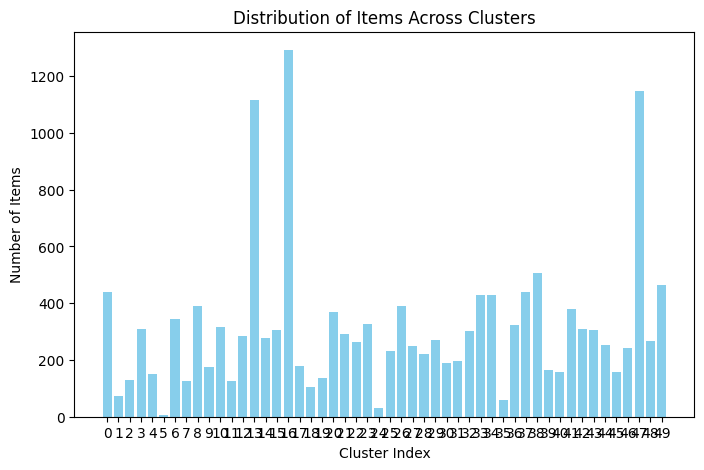

In [ ]:
# -------------------------------
# Task 5.5: Visualize distribution of items across clusters
# -------------------------------
plot_items_per_cluster(assignments_optimal)


compute the average number of raters

In [ ]:
# Compute number of raters per item
num_raters_dict = compute_num_raters(df)  # dict {item_id: num_raters}

# (Optional) compute average number of raters for reference
avg_num_raters = sum(num_raters_dict.values()) / len(num_raters_dict)
print(f"Average number of raters: {avg_num_raters:.2f}")


Average number of raters: 21.21


# Task 6: Analyze the relationship between cluster membership and item popularity

In [ ]:

average_ri = df.groupby('movieId')['rating'].mean()
print("\nAverage ratings per item (ri):")
print(average_ri.head(10))


Average ratings per item (ri):
movieId
1     3.897226
2     3.292929
3     3.184492
4     2.916667
5     3.144118
6     3.814417
7     3.375000
8     3.366667
9     3.037736
10    3.422865
Name: rating, dtype: float64


build df_items

In [ ]:
# ---------------------------------------------
# Build df_items manually (NO built-in functions)
# ---------------------------------------------

items_list = []   # this will hold dicts

for movieId in assignments_optimal:
    cluster_value = assignments_optimal[movieId]
    num_raters_value = num_raters_dict[movieId]
    avg_rating_value = ri[movieId]

    items_list.append({
        'movieId': movieId,
        'cluster': cluster_value,
        'num_raters': num_raters_value,
        'avg_rating': avg_rating_value
    })

df_items = pd.DataFrame(items_list)

print("df_items created with", len(df_items), "items.")
print(df_items.head())


df_items created with 15638 items.
   movieId  cluster  num_raters  avg_rating
0      296        5        1129        4.18
1      306       44         104        4.11
2      307       44          90        4.11
3      665       37          26        4.00
4      899       31         146        4.09


 6.1: Plot distribution

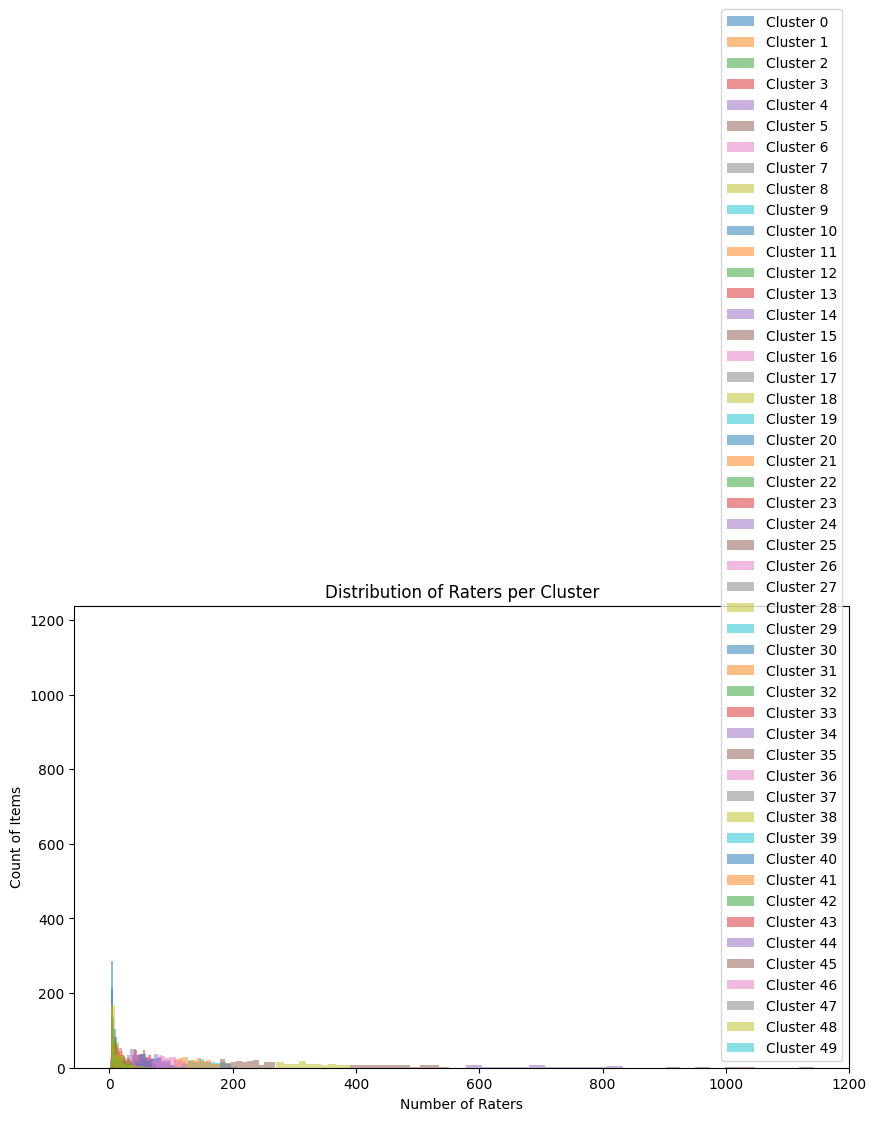

In [ ]:
# Plot distribution
plot_raters_distribution_manual(df_items, cluster_col='cluster', raters_col='num_raters')

Task 6.2: Are items with similar popularity grouped together?

In [ ]:

# Summary stats manually
summary = cluster_popularity_summary_manual(df_items, cluster_col='cluster', raters_col='num_raters')
for s in summary:
    print(s)


{'cluster': np.int64(0), 'num_items': 439, 'total_raters': np.int64(3891), 'avg_raters': np.float64(8.863325740318906)}
{'cluster': np.int64(1), 'num_items': 73, 'total_raters': np.int64(186), 'avg_raters': np.float64(2.547945205479452)}
{'cluster': np.int64(2), 'num_items': 128, 'total_raters': np.int64(291), 'avg_raters': np.float64(2.2734375)}
{'cluster': np.int64(3), 'num_items': 310, 'total_raters': np.int64(16309), 'avg_raters': np.float64(52.60967741935484)}
{'cluster': np.int64(4), 'num_items': 149, 'total_raters': np.int64(470), 'avg_raters': np.float64(3.1543624161073827)}
{'cluster': np.int64(5), 'num_items': 7, 'total_raters': np.int64(7336), 'avg_raters': np.float64(1048.0)}
{'cluster': np.int64(6), 'num_items': 344, 'total_raters': np.int64(409), 'avg_raters': np.float64(1.188953488372093)}
{'cluster': np.int64(7), 'num_items': 126, 'total_raters': np.int64(140), 'avg_raters': np.float64(1.1111111111111112)}
{'cluster': np.int64(8), 'num_items': 391, 'total_raters': np.in

6.3: Analyze how head vs tail items are distributed across clusters

In [ ]:
print("Task 6.3: Analyze how items from different parts of the popularity distribution (head vs tail) are distributed across clusters")

# Head vs tail distribution manually
distribution = analyze_head_tail_distribution_manual(df_items, cluster_col='cluster', raters_col='num_raters', head_percent=0.2)

# Print distribution per cluster
for cluster in distribution:
    print(f"Cluster {cluster}: Head = {distribution[cluster]['head']}, Tail = {distribution[cluster]['tail']}")


Task 6.3: Analyze how items from different parts of the popularity distribution (head vs tail) are distributed across clusters
Cluster 0: Head = 57, Tail = 382
Cluster 1: Head = 0, Tail = 73
Cluster 2: Head = 0, Tail = 128
Cluster 3: Head = 310, Tail = 0
Cluster 4: Head = 0, Tail = 149
Cluster 5: Head = 7, Tail = 0
Cluster 6: Head = 0, Tail = 344
Cluster 7: Head = 0, Tail = 126
Cluster 8: Head = 130, Tail = 261
Cluster 9: Head = 0, Tail = 176
Cluster 10: Head = 61, Tail = 254
Cluster 11: Head = 1, Tail = 126
Cluster 12: Head = 52, Tail = 231
Cluster 13: Head = 0, Tail = 1117
Cluster 14: Head = 278, Tail = 0
Cluster 15: Head = 0, Tail = 304
Cluster 16: Head = 0, Tail = 1292
Cluster 17: Head = 7, Tail = 170
Cluster 18: Head = 105, Tail = 0
Cluster 19: Head = 137, Tail = 0
Cluster 20: Head = 1, Tail = 369
Cluster 21: Head = 3, Tail = 290
Cluster 22: Head = 87, Tail = 175
Cluster 23: Head = 58, Tail = 267
Cluster 24: Head = 31, Tail = 0
Cluster 25: Head = 27, Tail = 206
Cluster 26: Head = 

# Task 7: apply item-based collabrative filltering within clusters

In [ ]:
### 12. Select two target items: lowest rated

# Build list of (movieId, averageRating)
item_avg_list = []
for m in ri:
    item_avg_list.append((m, ri[m]))

# Manual search for two smallest averages
I1 = None
I2 = None

# Find smallest
for item in item_avg_list:
    if I1 is None or item[1] < I1[1]:
        I1 = item

# Find second smallest
for item in item_avg_list:
    if item != I1:
        if I2 is None or item[1] < I2[1]:
            I2 = item

print("Target Items:")
print("I1, Lowest Rated:", I1)
print("I2, Second Lowest Rated:", I2)


Target Items:
I1, Lowest Rated: (np.int64(5911), np.float64(0.5))
I2, Second Lowest Rated: (np.int64(71537), np.float64(0.5))


7.1: Identify cluster assignment for target items

In [ ]:

target_items = [I1, I2]  # your real target item IDs  (I1,I2)
item_clusters = {}
target_items_fixed = [item_id for item_id, rating in target_items]


for item in target_items_fixed:
    cluster = assignments_optimal[item]
    item_clusters[item] = cluster
    print(f"Item {item} is in Cluster {cluster}")


Item 5911 is in Cluster 6
Item 71537 is in Cluster 6


In [ ]:

average_ri = df.groupby('movieId')['rating'].mean()
print("\nAverage ratings per item (ri):")
print(average_ri.head(10))


Average ratings per item (ri):
movieId
1     3.897226
2     3.292929
3     3.184492
4     2.916667
5     3.144118
6     3.814417
7     3.375000
8     3.366667
9     3.037736
10    3.422865
Name: rating, dtype: float64


creating user data

In [ ]:
ratings_data = build_user_item_ratings(assignments_optimal, average_ri, ri)
print("Per-user ratings dictionary created.")
# yousef beeh basha cell

Per-user ratings dictionary created.


Task 7.2: Compute Adjusted Cosine similarity within cluster

In [ ]:
similarity_dict = {}

for item in target_items_fixed:
    cluster = item_clusters[item]

    # Items in the same cluster, excluding the item itself
    items_in_cluster = [i for i, c in assignments_optimal.items() if c == cluster and i != item]

    sim_dict = {}

    if not items_in_cluster:
        # No other items in cluster (long-tail item)
        print(f"Item {item} has no other items in its cluster.")
    else:
        for other_item in items_in_cluster:
            sim = adjusted_cosine_similarity(
                ratings_data[other_item],
                ratings_data[item],
                average_ri.to_dict()
            )
            sim_dict[other_item] = sim

    similarity_dict[item] = sim_dict
    if sim_dict:
        print(f"Computed similarities for Item {item}: {list(sim_dict.items())[:5]} ...")


Computed similarities for Item 5911: [(8685, np.float64(0.9984637251450893)), (4100, np.float64(0.9984637251450893)), (71537, np.float64(1.0)), (3940, np.float64(0.9996812585066069)), (1311, np.float64(1.0))] ...
Computed similarities for Item 71537: [(8685, np.float64(0.9984637251450893)), (4100, np.float64(0.9984637251450893)), (5911, np.float64(1.0)), (3940, np.float64(0.9996812585066069)), (1311, np.float64(1.0))] ...


7.3: Select top 20% most similar items

In [ ]:

top_sim_items = {}

for item in target_items_fixed:
    top_sim_items[item] = select_top_similar(similarity_dict[item], top_percent=0.2)
    print(f"Top 20% similar items for Item {item}: {list(top_sim_items[item].keys())}")


Top 20% similar items for Item 5911: [71537, 1311, 3883, 4445, 7204, 31374, 32153, 66246, 5738, 5740, 133141, 6325, 47980, 89973, 89260, 119224, 200614, 108811, 171799, 48741, 171519, 197529, 98116, 110773, 112653, 116989, 127144, 132146, 132590, 132997, 139098, 143249, 155370, 160416, 165337, 168174, 129032, 672, 77829, 159721, 39408, 2887, 3149, 3891, 4120, 115071, 148110, 166958, 171631, 148614, 148628, 179185, 76060, 189177, 107704, 115414, 118684, 121103, 136305, 6900, 4551, 7282, 54268, 197123, 161022, 169008, 58291, 122519]
Top 20% similar items for Item 71537: [5911, 1311, 3883, 4445, 7204, 31374, 32153, 66246, 5738, 5740, 133141, 6325, 47980, 89973, 89260, 119224, 200614, 108811, 171799, 48741, 171519, 197529, 98116, 110773, 112653, 116989, 127144, 132146, 132590, 132997, 139098, 143249, 155370, 160416, 165337, 168174, 129032, 672, 77829, 159721, 39408, 2887, 3149, 3891, 4120, 115071, 148110, 166958, 171631, 148614, 148628, 179185, 76060, 189177, 107704, 115414, 118684, 121103

7.4: Predict ratings for target users

In [ ]:

target_users = [U1, U2, U3]  #(U1,U2,U3)
predictions = {}

for user in target_users:
    predictions[user] = {}
    for item in target_items_fixed:
        pred = predict_rating(user, item, top_sim_items[item], ratings_data, average_ri.to_dict())
        predictions[user][item] = pred
        print(f"Predicted rating of User {user} for Item {item}: {pred:.2f}")


Predicted rating of User 1 for Item 5911: 0.50
Predicted rating of User 1 for Item 71537: 0.50
Predicted rating of User 3 for Item 5911: 0.50
Predicted rating of User 3 for Item 71537: 0.50
Predicted rating of User 72 for Item 5911: 0.50
Predicted rating of User 72 for Item 71537: 0.50


# Task 8. Compare clustering-based item CF with non-clustering item CF from Section TWO

8.1: Compare predicted ratings

In [ ]:

# Target items and users
target_items = [I1, I2]
target_users = [U1, U2, U3]

# Predictions without clustering
predictions_non_cluster = {}

for user in target_users:
    predictions_non_cluster[user] = {}
    for item in target_items_fixed:
        pred = predict_rating_non_cluster(user, item, ratings_data, ri)
        predictions_non_cluster[user][item] = pred
        print(f"User {user}, Item {item}: Clustering CF = {predictions[user][item]:.2f}, Non-clustering CF = {pred:.2f}")


User 1, Item 5911: Clustering CF = 0.50, Non-clustering CF = 2.08
User 1, Item 71537: Clustering CF = 0.50, Non-clustering CF = 2.08
User 3, Item 5911: Clustering CF = 0.50, Non-clustering CF = 2.08
User 3, Item 71537: Clustering CF = 0.50, Non-clustering CF = 2.08
User 72, Item 5911: Clustering CF = 0.50, Non-clustering CF = 2.08
User 72, Item 71537: Clustering CF = 0.50, Non-clustering CF = 2.08


8.2: Calculate prediction errors

In [ ]:

# Assume actual ratings are in ratings_data
errors_cluster = compute_prediction_errors(ratings_data, predictions)
errors_non_cluster = compute_prediction_errors(ratings_data, predictions_non_cluster)

for user in target_users:
    for item in target_items_fixed:
        e_cluster = errors_cluster[user][item]
        e_non = errors_non_cluster[user][item]
        print(f"User {user}, Item {item}: Error Clustering CF = {e_cluster:.2f}, Error Non-clustering CF = {e_non:.2f}")


8.3: Compare reliability

In [ ]:

# Compute average absolute error per approach
def average_abs_error(errors):
    total = 0
    count = 0
    for user in errors:
        for item in errors[user]:
            if errors[user][item] is not None:
                total += abs(errors[user][item])
                count += 1
    return total / count if count > 0 else None

avg_error_cluster = average_abs_error(errors_cluster)
avg_error_non_cluster = average_abs_error(errors_non_cluster)

print(f"Average absolute error Clustering CF: {avg_error_cluster:.2f}")
print(f"Average absolute error Non-clustering CF: {avg_error_non_cluster:.2f}")

if avg_error_cluster < avg_error_non_cluster:
    print("Clustering-based CF is more reliable.")
elif avg_error_cluster > avg_error_non_cluster:
    print("Non-clustering CF is more reliable.")
else:
    print("Both approaches are equally reliable.")


# Task 9. Evaluate the impact on the long-tail problem:

9.1: How does clustering affect predictions for long-tail items

In [ ]:
# -------------------------------
# Task 9.1: Identify long-tail items
# -------------------------------

long_tail_items = get_long_tail_items(ni, percentile=20)

print("Long-tail items:", long_tail_items)
print("Number of long-tail items:", len(long_tail_items))


9.2: Are predictions more or less reliable within clusters

In [ ]:
# -------------------------------------------
# Corrected: Evaluate prediction error for long-tail items
# -------------------------------------------

valid_long_tail_items = []

for item in long_tail_items:
    for user in target_users:
        # Check if we have a prediction for this user-item pair
        if item in predictions[user]:
            valid_long_tail_items.append(item)
            break  # no need to check other users

valid_long_tail_items = list(set(valid_long_tail_items))  # remove duplicates

print("Valid long-tail items with predictions:", len(valid_long_tail_items))

# Compute errors ONLY for the valid long-tail items
avg_error_cluster_long_tail = average_abs_error_items(errors_cluster, valid_long_tail_items)
avg_error_non_cluster_long_tail = average_abs_error_items(errors_non_cluster, valid_long_tail_items)

# Report results
if avg_error_cluster_long_tail is not None:
    print(f"Average absolute error Clustering CF (long-tail items): {avg_error_cluster_long_tail:.2f}")
else:
    print("No valid clustering CF predictions for long-tail items.")

if avg_error_non_cluster_long_tail is not None:
    print(f"Average absolute error Non-clustering CF (long-tail items): {avg_error_non_cluster_long_tail:.2f}")
else:
    print("No valid non-clustering CF predictions for long-tail items.")

# Compare reliability
if (
    avg_error_cluster_long_tail is not None and
    avg_error_non_cluster_long_tail is not None
):
    if avg_error_cluster_long_tail < avg_error_non_cluster_long_tail:
        print("Predictions for long-tail items are more reliable within clusters.")
    else:
        print("Predictions for long-tail items are less reliable within clusters.")


9.3: Compare number of similar items for long-tail items

In [ ]:

for item in long_tail_items:
    # Check if item has similarity calculated for clustering CF
    if item in similarity_dict:
        n_sim_cluster = count_similar_items(item, similarity_dict, top_percent=0.2)
    else:
        n_sim_cluster = 0  # or skip

    # Compute similarity for non-clustering CF
    sim_dict_non_cluster = {}
    for other_item in ratings_data:
        if other_item == item:
            continue
        sim_dict_non_cluster[other_item] = adjusted_cosine_similarity(
            ratings_data[other_item],
            ratings_data[item],
            average_ri.to_dict()
        )
    n_sim_non_cluster = count_similar_items(item, {item: sim_dict_non_cluster}, top_percent=0.2)

    print(f"Item {item}: Similar items Clustering CF = {n_sim_cluster}, Non-clustering CF = {n_sim_non_cluster}")


# Task 10: Analyze the computational efficiency:


10.1: Calculate reduction in similarity computations due to clustering

In [ ]:
# ------------------------------
# Task 10.1: Reduction in item-item similarity computations
# ------------------------------

# cluster_item_counts: list containing number of items in each cluster
cluster_item_counts = [len(df_items[df_items['cluster'] == c]) for c in df_items['cluster'].unique()]

reduction = compute_similarity_reduction(cluster_item_counts)
print(f"Reduction in similarity computations due to clustering: {reduction*100:.2f}%")


10.2: Compute the speedup factor compared to non-clustering CF

In [ ]:
# ------------------------------
# Task 10.2: Compute speedup factor
# ------------------------------

# Total similarity computations without clustering
total_items = len(df_items)
sim_computations_no_cluster = total_items * (total_items - 1) / 2

# Total similarity computations with clustering
sim_computations_clustered = sum(n * (n - 1) / 2 for n in cluster_item_counts)

speedup = compute_speedup_factor(sim_computations_no_cluster, sim_computations_clustered)
print(f"Speedup factor due to clustering: {speedup:.2f}x")


10.3: Compare speedup for item-based vs user-based clustering

In [ ]:
# ------------------------------
# Task 10.3: Compare speedup for item vs user clustering
# ------------------------------

# Example: user_cluster_counts is a list of number of users in each user cluster
# You can replace it with your actual user clustering data
user_cluster_counts = [100, 150, 200, 50, 75]  # Example placeholder

speedup_items, speedup_users = compare_speedup_item_user(cluster_item_counts, user_cluster_counts)
print(f"Item-based clustering speedup: {speedup_items:.2f}x")
print(f"User-based clustering speedup: {speedup_users:.2f}x")

if speedup_items > speedup_users:
    print("Speedup is greater for item-based clustering.")
else:
    print("Speedup is greater for user-based clustering.")


# Task 11: Examine the effect of cluster size on prediction quality:

In [ ]:
# Predict rating using clustering CF
def predict_rating_cluster(user, item, ratings_data, assignments_optimal, average_ri):
    """
    Predict rating for user-item using clustered CF.
    - user: user ID
    - item: item ID
    - ratings_data: dict {user -> {item -> rating}}
    - assignments_optimal: dict {item -> cluster}
    - average_ri: pandas Series {item -> avg rating}
    """
    cluster_id = assignments_optimal.get(item, None)
    if cluster_id is None:
        # Item not in cluster mapping, return global avg
        return avg_rating

    # Items in the same cluster
    items_in_cluster = [i for i, c in assignments_optimal.items() if c == cluster_id and i != item]

    if not items_in_cluster:
        return average_ri.get(item, avg_rating)

    # Compute average rating from user for items in cluster
    user_ratings = ratings_data.get(user, {})
    rated_in_cluster = [user_ratings[i] for i in items_in_cluster if i in user_ratings]

    if rated_in_cluster:
        return sum(rated_in_cluster)/len(rated_in_cluster)
    else:
        return average_ri.get(item, avg_rating)


In [ ]:
# Compute errors for all items in all users
all_errors_cluster = {}

for user, user_items in ratings_data.items():
    all_errors_cluster[user] = {}
    for item, true_rating in user_items.items():
        pred = predict_rating_cluster(user, item, ratings_data, assignments_optimal, average_ri)
        error = abs(pred - true_rating)
        all_errors_cluster[user][item] = error

print("Prediction errors computed for all user-item pairs.")


11.1: Calculate average prediction error per cluster

In [ ]:
# ==== Task 11.1 (FIXED): Average prediction error per cluster size ====

# assignments_optimal: { item -> cluster }
# cluster_sizes: { cluster_id -> size }
# errors_cluster: { user -> { item -> error } }

# Reverse mapping to: cluster → list of items
cluster_to_items = {cid: [] for cid in cluster_sizes.keys()}

for item, cid in assignments_optimal.items():
    if cid in cluster_to_items:
        cluster_to_items[cid].append(item)

# Build cluster_error_values: cluster → list of errors
cluster_error_values = {cid: [] for cid in cluster_sizes.keys()}

for user, item_errors in all_errors_cluster.items():
    for item, err in item_errors.items():
        if item in assignments_optimal:       # only items that exist in cluster mapping
            cid = assignments_optimal[item]   # find cluster
            cluster_error_values[cid].append(float(err))

# Compute average error per cluster
avg_error_by_cluster = {
    cid: (sum(values)/len(values) if len(values) > 0 else None)
    for cid, values in cluster_error_values.items()
}

# Make a clean DataFrame
df_error_cluster = pd.DataFrame([
    {
        "Cluster ID": cid,
        "Cluster Size": cluster_sizes[cid],
        "Avg Prediction Error": avg_error_by_cluster[cid]
    }
    for cid in cluster_sizes.keys()
])

df_error_cluster_sorted = df_error_cluster.sort_values("Cluster Size")
df_error_cluster_sorted


In [ ]:
# ==== Task 11.2: Relation between cluster size and prediction error ====

correlation = df_error_cluster_sorted["Cluster Size"].corr(
    df_error_cluster_sorted["Avg Prediction Error"]
)

print("Correlation =", correlation)

if correlation < 0:
    print("→ Larger clusters give LOWER (better) errors.")
elif correlation > 0:
    print("→ Larger clusters give HIGHER (worse) errors.")
else:
    print("→ No relation between cluster size and error.")


In [ ]:
# ==== Task 11.3: Find optimal cluster size ====

df_error_cluster_sorted["score"] = (
    df_error_cluster_sorted["Avg Prediction Error"].rank(ascending=True)
    + df_error_cluster_sorted["Cluster Size"].rank(ascending=True)
)

best_row = df_error_cluster_sorted.loc[df_error_cluster_sorted["score"].idxmin()]

print("===== Optimal cluster size (balanced) =====")
print(best_row)


# section 3 part 4

# functions

Function: Select users with more than N ratings

In [ ]:
def select_users_with_min_ratings(df, min_ratings=50, num_users=100, random_seed=42):
    """
    df: pandas DataFrame with columns ['userId', 'movieId', 'rating', 'timestamp']
    min_ratings: minimum ratings to qualify
    num_users: number of users to select
    """
    import random
    random.seed(random_seed)

    # Count ratings per user manually
    user_counts = {}
    for idx, row in df.iterrows():
        u = row['userId']
        user_counts[u] = user_counts.get(u, 0) + 1

    # Collect eligible users
    eligible_users = [u for u, cnt in user_counts.items() if cnt > min_ratings]

    # Randomly select users
    if len(eligible_users) < num_users:
        raise ValueError("Not enough users with the minimum number of ratings")

    selected_users = random.sample(eligible_users, num_users)
    return selected_users


Function: Hide a percentage of ratings for cold-start users

In [ ]:
def hide_user_ratings(df, selected_users, hide_fraction=0.8, random_seed=42):
    """
    df: DataFrame
    selected_users: list of user IDs to hide ratings for
    hide_fraction: fraction of ratings to hide
    Returns:
    - df_visible: DataFrame with only remaining visible ratings
    - hidden_ratings: dict {(userId, movieId): hidden_rating}
    """
    import random
    random.seed(random_seed)

    hidden_ratings = {}
    visible_rows = []

    for idx, row in df.iterrows():
        user = row['userId']
        if user in selected_users:
            # Decide randomly if this rating is hidden
            if random.random() < hide_fraction:
                hidden_ratings[(user, row['movieId'])] = row['rating']
            else:
                visible_rows.append(idx)
        else:
            visible_rows.append(idx)

    df_visible = df.loc[visible_rows].reset_index(drop=True)
    return df_visible, hidden_ratings


Function: Hide a percentage of ratings for cold-start users

In [ ]:
def hide_user_ratings(df, selected_users, hide_fraction=0.8, random_seed=42):
    """
    df: DataFrame
    selected_users: list of user IDs to hide ratings for
    hide_fraction: fraction of ratings to hide
    Returns:
    - df_visible: DataFrame with only remaining visible ratings
    - hidden_ratings: dict {(userId, movieId): hidden_rating}
    """
    import random
    random.seed(random_seed)

    hidden_ratings = {}
    visible_rows = []

    for idx, row in df.iterrows():
        user = row['userId']
        if user in selected_users:
            # Decide randomly if this rating is hidden
            if random.random() < hide_fraction:
                hidden_ratings[(user, row['movieId'])] = row['rating']
            else:
                visible_rows.append(idx)
        else:
            visible_rows.append(idx)

    df_visible = df.loc[visible_rows].reset_index(drop=True)
    return df_visible, hidden_ratings


Function: Select items with many ratings

In [ ]:
def select_items_with_min_ratings(df, min_ratings=50, num_items=50, random_seed=42):
    """
    df: DataFrame with columns ['userId', 'movieId', 'rating', 'timestamp']
    Returns:
    - selected_items: list of item IDs
    """
    import random
    random.seed(random_seed)

    # Count ratings per item manually
    item_counts = {}
    for idx, row in df.iterrows():
        item = row['movieId']
        item_counts[item] = item_counts.get(item, 0) + 1

    eligible_items = [i for i, cnt in item_counts.items() if cnt > min_ratings]

    if len(eligible_items) < num_items:
        raise ValueError("Not enough items with the minimum number of ratings")

    selected_items = random.sample(eligible_items, num_items)
    return selected_items


Function: Hide ratings for cold-start items

In [ ]:
def hide_item_ratings(df, selected_items, hide_fraction=0.8, random_seed=42):
    """
    df: DataFrame
    selected_items: list of item IDs to hide ratings for
    hide_fraction: fraction of ratings to hide
    Returns:
    - df_visible: DataFrame with only remaining visible ratings
    - hidden_ratings_items: dict {(userId, movieId): hidden_rating}
    """
    import random
    random.seed(random_seed)

    hidden_ratings_items = {}
    visible_rows = []

    for idx, row in df.iterrows():
        item = row['movieId']
        if item in selected_items:
            if random.random() < hide_fraction:
                hidden_ratings_items[(row['userId'], item)] = row['rating']
            else:
                visible_rows.append(idx)
        else:
            visible_rows.append(idx)

    df_visible = df.loc[visible_rows].reset_index(drop=True)
    return df_visible, hidden_ratings_items


Function: Select users with more than N ratings

In [ ]:
def select_users_with_min_ratings(df, min_ratings=50, num_users=100, random_seed=42):
    """
    df: pandas DataFrame with columns ['userId', 'movieId', 'rating', 'timestamp']
    min_ratings: minimum ratings to qualify
    num_users: number of users to select
    """
    import random
    random.seed(random_seed)

    # Count ratings per user manually
    user_counts = {}
    for idx, row in df.iterrows():
        u = row['userId']
        user_counts[u] = user_counts.get(u, 0) + 1

    # Collect eligible users
    eligible_users = [u for u, cnt in user_counts.items() if cnt > min_ratings]

    # Randomly select users
    if len(eligible_users) < num_users:
        raise ValueError("Not enough users with the minimum number of ratings")

    selected_users = random.sample(eligible_users, num_users)
    return selected_users


Function for 2.1 — Compute cold-start user features

In [ ]:
# Task 2.1: Compute limited profile features for cold-start users
def compute_cold_start_user_features(df, cold_users):
    """
    Compute features for cold-start users based on their limited visible ratings.
    Currently using average rating as the feature.

    Args:
        df: pandas DataFrame with columns ['userId', 'movieId', 'rating']
        cold_users: list of userIds representing cold-start users

    Returns:
        user_features: dict mapping userId -> feature vector (list)
    """
    user_features = {}
    for u in cold_users:
        # Extract visible ratings for this user
        user_ratings = [row['rating'] for idx, row in df.iterrows() if row['userId'] == u]
        if user_ratings:
            avg_rating = sum(user_ratings) / len(user_ratings)
        else:
            avg_rating = 0.0  # handle users with no visible ratings
        user_features[u] = [avg_rating]  # feature vector as list
    return user_features


2.2 & 2.3 — Assign user to nearest cluster

In [ ]:
# Task 2.2 + 2.3: Assign cold-start user to nearest cluster
def assign_cold_start_users_to_cluster(user_features, cluster_centroids):
    """
    Assign each cold-start user to the nearest cluster based on feature distance.

    Args:
        user_features: dict mapping userId -> feature vector
        cluster_centroids: dict mapping clusterId -> centroid vector (list)

    Returns:
        assignments: dict mapping userId -> assigned clusterId
        distances: dict mapping userId -> distance to nearest centroid
        second_distances: dict mapping userId -> distance to second nearest centroid
    """
    assignments = {}
    distances = {}
    second_distances = {}

    for u, features in user_features.items():
        min_dist = float('inf')
        second_min = float('inf')
        best_cluster = None

        for cid, centroid in cluster_centroids.items():
            # Euclidean distance (1D for now)
            dist = sum((f - c)**2 for f, c in zip(features, centroid)) ** 0.5

            if dist < min_dist:
                second_min = min_dist
                min_dist = dist
                best_cluster = cid
            elif dist < second_min:
                second_min = dist

        assignments[u] = best_cluster
        distances[u] = min_dist
        second_distances[u] = second_min

    return assignments, distances, second_distances


Function for 2.4 — Record confidence of assignment

In [ ]:
# Task 2.4: Compute confidence of assignment
def compute_assignment_confidence(distances, second_distances):
    """
    Confidence can be measured as (distance to 2nd nearest - distance to nearest) / distance to 2nd nearest

    Args:
        distances: dict mapping userId -> distance to nearest centroid
        second_distances: dict mapping userId -> distance to second nearest centroid

    Returns:
        confidence: dict mapping userId -> confidence score (0-1)
    """
    confidence = {}
    for u in distances:
        if second_distances[u] == 0:
            confidence[u] = 0.0
        else:
            confidence[u] = (second_distances[u] - distances[u]) / second_distances[u]
    return confidence


# task one simulate cold start scenarios

Task 1.1: Select 100 users with >50 ratings

In [ ]:
# Task 1.1: Select 100 users with more than 50 ratings
selected_users = select_users_with_min_ratings(df, min_ratings=50, num_users=100, random_seed=42)
print("Selected users (cold-start simulation):", selected_users[:10], "...")  # Show first 10 as sample


Task 1.2: Hide 80% of ratings for selected users

In [ ]:
# Task 1.2: Hide 80% of ratings to simulate cold-start users

# Count total ratings for selected users before hiding
total_ratings_before = sum(1 for idx, row in df.iterrows() if row['userId'] in selected_users)
print("Total ratings for selected users before hiding:", total_ratings_before)

# Hide ratings
df_visible_users, hidden_ratings_users_partial = hide_user_ratings(df, selected_users, hide_fraction=0.8, random_seed=42)

# Count hidden ratings
total_hidden = len(hidden_ratings_users_partial)
print("Number of ratings hidden for cold-start users:", total_hidden)

# Count remaining visible ratings for those users
remaining_visible = total_ratings_before - total_hidden
print("Remaining visible ratings for selected users:", remaining_visible)

# Total visible ratings in df_visible_users
print("Total rows in visible dataset after hiding:", len(df_visible_users))


Task 1.3: Store hidden ratings as ground truth

In [ ]:
# Task 1.3: Store the hidden ratings as ground truth for evaluation
hidden_ratings_users = hidden_ratings_users_partial  # dictionary: (userId, movieId) -> rating
print("Number of hidden ratings stored for evaluation:", len(hidden_ratings_users))


Task 1.4a: Select 50 items with many ratings

In [ ]:
# Task 1.4a: Select 50 items with more than 50 ratings

# Count ratings per item manually
item_counts = {}
for idx, row in df_visible_users.iterrows():
    item = row['movieId']
    item_counts[item] = item_counts.get(item, 0) + 1

# Count total items with more than 50 ratings
eligible_items = [i for i, cnt in item_counts.items() if cnt > 50]
print("Total items with more than 50 ratings:", len(eligible_items))

# Select 50 items using the pre-defined function
selected_items = select_items_with_min_ratings(df_visible_users, min_ratings=50, num_items=50, random_seed=42)
print("Number of items selected for cold-start:", len(selected_items))
print("Selected items sample:", selected_items[:10], "...")


Task 1.4b: Hide most ratings for cold-start items

In [ ]:
# Task 1.4b: Hide most ratings for selected items
df_visible_items, hidden_ratings_items = hide_item_ratings(df_visible_users, selected_items, hide_fraction=0.8, random_seed=42)
print("Visible ratings after hiding for items:", len(df_visible_items))
print("Number of hidden ratings for items:", len(hidden_ratings_items))


# task 2: Develop a cold-start user assignment strategy

In [ ]:
unique_users = {}
for row in df['userId']:
    if row not in unique_users:
        unique_users[row] = True
num_users = 0
for _ in unique_users:
    num_users += 1
print("Number of users:", num_users)

Number of users: 2298


In [ ]:
def round_val(x):
    return round(x, 2)

# part 1 point (1) and (2)
avg_ratings_list = []

for u in unique_users:
    ratings_u = df[df['userId'] == u]['rating']
    avg_val = round_val(sum(ratings_u) / len(ratings_u))
    avg_ratings_list.append(avg_val)



N = len(avg_ratings_list)

# part 1 point (3)
# Calculate the sum of all average ratings
sum_ru = sum(avg_ratings_list)
# Calculate Mean
mu = round_val(sum_ru / N)

# part 1 ppoint (4)
sum_sq_diff = 0
# Calculate the sum of squared differences from the mean
for r_u in avg_ratings_list:
    diff = r_u - mu
    sum_sq_diff += diff * diff

# Calculate Standard Deviation
sigma = round_val((sum_sq_diff / N) ** 0.5)

# part 1 point (5)
normalized_ratings = []
for r_u in avg_ratings_list:
    if sigma == 0:
        z_u = 0.0
    else:
        # z_u = (ru - μ) / σ
        z_u = round_val((r_u - mu) / sigma)
    normalized_ratings.append(z_u)

# Z_u is the normalized feature vector (z_u)
Z_u = normalized_ratings

print(f"Number of Users (N): {N}")
print(f"Mean (μ) of Avg Ratings: {mu:.2f}")
print(f"Standard Deviation (σ) of Avg Ratings: {sigma:.2f}")
print("First 10 Normalized Avg Ratings (z_u):")
print([f"{z:.2f}" for z in Z_u[:10]])

Number of Users (N): 2298
Mean (μ) of Avg Ratings: 3.69
Standard Deviation (σ) of Avg Ratings: 0.47
First 10 Normalized Avg Ratings (z_u):
['0.26', '-0.13', '0.02', '-0.66', '0.13', '0.98', '-0.11', '-0.17', '0.38', '-0.51']


In [ ]:
# Helper function for squared distance (for WCSS)
def squared_distance(point, centroid):
    return (point - centroid) ** 2
#part 1 point (6.1)
# Manual K-means Implementation
def run_kmeans_manual(data, K, max_iters=100):
    # Initialization: Use the first K points as initial centroids
    centroids = [round_val(data[i]) for i in range(K)]

    for iteration in range(max_iters):
        #Assign each point to the nearest centroid
        assignments = [[] for _ in range(K)]
        user_labels = [0] * len(data)

        for i, point in enumerate(data):
            min_dist = float('inf')
            best_cluster = -1

            for j, centroid in enumerate(centroids):
                dist = squared_distance(point, centroid)
                if dist < min_dist:
                    min_dist = dist
                    best_cluster = j

            assignments[best_cluster].append(point)
            user_labels[i] = best_cluster

        #  Calculate new centroids (mean of assigned points)
        new_centroids = []
        for cluster_points in assignments:
            if len(cluster_points) > 0:
                new_centroid = round_val(sum(cluster_points) / len(cluster_points))
            else:
                # Keep old centroid if cluster is empty
                new_centroid = centroids[assignments.index(cluster_points)]
            new_centroids.append(new_centroid)

        # Stop if centroids do not change (rounded values)
        converged = True
        for old, new in zip(centroids, new_centroids):
            if round_val(old) != round_val(new):
                converged = False
                break

        centroids = new_centroids

        if converged:
            break

    # alculate WCSS (Inertia)
    wcss_value = 0
    for i, cluster_points in enumerate(assignments):
        centroid = centroids[i]
        for point in cluster_points:
            wcss_value += squared_distance(point, centroid)

    return centroids, user_labels, round_val(wcss_value)

# Manual Silhouette Score Implementation
def calculate_silhouette_score_manual(data, labels):
    if len(set(labels)) <= 1 or len(data) <= 1:
        return 0.0

    scores = []

    for i, point in enumerate(data):
        cluster_i = labels[i]

        #  average distance to all other points in the same cluster
        intra_cluster_dists = []
        for j, other_point in enumerate(data):
            if i != j and labels[j] == cluster_i:
                # Use absolute difference for 1D distance
                intra_cluster_dists.append(abs(point - other_point))

        a_i = round_val(sum(intra_cluster_dists) / len(intra_cluster_dists)) if intra_cluster_dists else 0.0

        #  minimum average distance to points in any other cluster
        other_clusters = set(labels) - {cluster_i}
        b_i = float('inf')

        if other_clusters:
            for other_cluster in other_clusters:
                inter_cluster_dists = []
                for j, other_point in enumerate(data):
                    if labels[j] == other_cluster:
                        inter_cluster_dists.append(abs(point - other_point))

                if inter_cluster_dists:
                    avg_dist = round_val(sum(inter_cluster_dists) / len(inter_cluster_dists))
                    b_i = min(b_i, avg_dist)

        # Calculate s(i)
        if b_i == float('inf') or a_i == b_i:
            s_i = 0.0
        elif a_i < b_i:
            s_i = round_val((b_i - a_i) / b_i)
        else: # a_i > b_i
            s_i = round_val((b_i - a_i) / a_i)

        scores.append(s_i)

    # Final Silhouette Score is the average of all s(i)
    final_score = round_val(sum(scores) / len(scores))
    return final_score

# part 1 point (6.2)
K_values = [5, 10, 15, 20, 30, 50]
wcss = []
silhouette_scores = {}
cluster_results = {}

for K in K_values:
    centroids, labels, wcss_val = run_kmeans_manual(Z_u, K)
    wcss.append(wcss_val)

    # Calculate Silhouette Score
    score = calculate_silhouette_score_manual(Z_u, labels)
    silhouette_scores[K] = score

    # Store results
    cluster_results[K] = {
        'centroids': centroids,
        'labels': labels
    }

    print(f"K={K:2}: WCSS = {wcss_val:.2f}, Silhouette Score = {score:.2f}")

# Create DataFrame for summary display
results_df = pd.DataFrame({
    'K': K_values,
    'WCSS': wcss
})
results_df['Silhouette Score'] = results_df['K'].map(silhouette_scores)
print("\nPerformance Summary:")
print(results_df.to_markdown(index=False, numalign="left", stralign="left"))

K= 5: WCSS = 224.21, Silhouette Score = 0.52
K=10: WCSS = 58.79, Silhouette Score = 0.53
K=15: WCSS = 31.23, Silhouette Score = 0.53
K=20: WCSS = 24.82, Silhouette Score = 0.53
K=30: WCSS = 18.07, Silhouette Score = 0.53
K=50: WCSS = 13.65, Silhouette Score = 0.57

Performance Summary:
| K   | WCSS   | Silhouette Score   |
|:----|:-------|:-------------------|
| 5   | 224.21 | 0.52               |
| 10  | 58.79  | 0.53               |
| 15  | 31.23  | 0.53               |
| 20  | 24.82  | 0.53               |
| 30  | 18.07  | 0.53               |
| 50  | 13.65  | 0.57               |


task 2.1 :Compute limited profile features for cold-start users

In [ ]:
# Task 2.1: Compute limited profile features for cold-start users
def compute_cold_start_user_features(df, cold_users):
    """
    Compute features for cold-start users based on their limited visible ratings.
    Currently using average rating as the feature.

    Args:
        df: pandas DataFrame with columns ['userId', 'movieId', 'rating']
        cold_users: list of userIds representing cold-start users

    Returns:
        user_features: dict mapping userId -> feature vector (list)
    """
    user_features = {}
    for u in cold_users:
        # Extract visible ratings for this user
        user_ratings = [row['rating'] for idx, row in df.iterrows() if row['userId'] == u]
        if user_ratings:
            avg_rating = sum(user_ratings) / len(user_ratings)
        else:
            avg_rating = 0.0  # handle users with no visible ratings
        user_features[u] = [avg_rating]  # feature vector as list
    return user_features

# Example usage:
cold_user_features = compute_cold_start_user_features(df_visible_users, selected_users)
print("Sample cold-start user features:")
for u in list(cold_user_features.keys())[:5]:
    print(f"User {u}: features = {cold_user_features[u]}")


NameError: name 'df_visible_users' is not defined

In [ ]:
optimal_K =5

 Task 2.2: Assign cold-start users to nearest cluster based on distance


In [ ]:
def assign_cold_start_users_to_clusters(cold_user_features, cluster_results_optimal):
    """
    Assign each cold-start user to the nearest cluster using the centroid from Part 1 K-means.

    Args:
        cold_user_features: dict mapping cold-start userId -> feature vector (list)
        cluster_results_optimal: dict with keys 'centroids' and 'labels' for the chosen K
            e.g., cluster_results[optimal_K]

    Returns:
        user_cluster_assignment: dict mapping cold-start userId -> nearest cluster_id
        user_cluster_confidence: dict mapping userId -> confidence score (distance ratio)
    """
    centroids = cluster_results_optimal['centroids']
    user_cluster_assignment = {}
    user_cluster_confidence = {}

    for u, features in cold_user_features.items():
        distances = []
        # Compute distance to each centroid (1D feature, so absolute difference)
        for c in centroids:
            dist = abs(features[0] - c)
            distances.append(dist)

        # Find nearest cluster
        nearest_idx = distances.index(min(distances))
        user_cluster_assignment[u] = nearest_idx

        # Compute confidence: distance to nearest vs second nearest
        sorted_distances = sorted(distances)
        if len(sorted_distances) > 1 and sorted_distances[1] != 0:
            confidence = sorted_distances[1] / sorted_distances[0]
        else:
            confidence = 1.0  # fallback if only one cluster or second nearest distance is 0
        user_cluster_confidence[u] = confidence

    return user_cluster_assignment, user_cluster_confidence

# Example usage:
# Use the clustering result for the chosen K (e.g., optimal_K)
cold_user_cluster, cold_user_confidence = assign_cold_start_users_to_clusters(
    cold_user_features,
    cluster_results[optimal_K]
)

print("Sample cold-start user cluster assignments:")
for u in list(cold_user_cluster.keys())[:5]:
    print(f"User {u}: Cluster {cold_user_cluster[u]}, Confidence {cold_user_confidence[u]:.2f}")


In [ ]:
# Task 2.3: Assign cold-start users to the nearest cluster (without confidence score)
def assign_users_nearest_cluster(cold_user_features, cluster_results_optimal):
    """
    Assign each cold-start user to the nearest cluster centroid.

    Args:
        cold_user_features: dict mapping userId -> feature vector (list)
        cluster_results_optimal: dict from Part 1 containing 'centroids'

    Returns:
        user_cluster_assignment: dict mapping userId -> assigned cluster index
    """
    centroids = cluster_results_optimal['centroids']
    user_cluster_assignment = {}

    for user, features in cold_user_features.items():
        feature_value = features[0]  # because feature vector = [average_rating]
        best_cluster = None
        min_distance = float('inf')

        # Compute absolute distance to each centroid
        for idx, centroid in enumerate(centroids):
            dist = abs(feature_value - centroid)
            if dist < min_distance:
                min_distance = dist
                best_cluster = idx

        user_cluster_assignment[user] = best_cluster

    return user_cluster_assignment


# Example usage:
cold_user_cluster_assignment = assign_users_nearest_cluster(
    cold_user_features,
    cluster_results[optimal_K]
)

print("Sample assignments for cold-start users:")
for u in list(cold_user_cluster_assignment.keys())[:5]:
    print(f"User {u} → Cluster {cold_user_cluster_assignment[u]}")


In [ ]:
# ------------------------------
# Task 2.4: Compute cluster assignment confidence
# ------------------------------

def compute_cluster_confidence_manual(data, centroids, labels):
    confidence_scores = []

    for i, point in enumerate(data):
        # Compute distance to ALL centroids
        distances = [abs(point - c) for c in centroids]

        # nearest centroid distance
        d1 = min(distances)

        # second nearest centroid distance
        distances_sorted = sorted(distances)
        d2 = distances_sorted[1] if len(distances_sorted) > 1 else d1

        # Confidence = how much closer point is to nearest cluster than second
        confidence = round_val((d2 - d1) / d2) if d2 != 0 else 0.0
        confidence_scores.append(confidence)

    return confidence_scores


# ---- Use the chosen K from your results ----
chosen_K = 10   # <-- change if your best K is different

centroids, labels, wcss_val = run_kmeans_manual(Z_u, chosen_K)

# Compute confidence
confidence_scores = compute_cluster_confidence_manual(Z_u, centroids, labels)

# Store results inside cluster_results (optional)
cluster_results[chosen_K]["confidence"] = confidence_scores

# Show first 10
for i in range(10):
    print(f"User {i}: cluster={labels[i]}, confidence={confidence_scores[i]}")


In [ ]:
# ------------------------------
# Task 3.1: Find similar users in the same cluster (fixed)
# ------------------------------

from math import sqrt

def cosine_similarity_ratings(user1_ratings, user2_ratings):
    """Compute cosine similarity based on overlapping rated items."""
    overlap_items = set(user1_ratings.keys()) & set(user2_ratings.keys())

    if len(overlap_items) == 0:
        return 0.0

    num = sum(user1_ratings[i] * user2_ratings[i] for i in overlap_items)
    den1 = sqrt(sum(user1_ratings[i]**2 for i in overlap_items))
    den2 = sqrt(sum(user2_ratings[i]**2 for i in overlap_items))

    if den1 == 0 or den2 == 0:
        return 0.0

    return num / (den1 * den2)


def build_user_rating_dict_safe(data):
    """Convert df or dict to {userId: {itemId: rating}} dict."""
    if isinstance(data, dict):
        return data
    user_dict = {}
    for _, row in data.iterrows():
        u, i, r = row["userId"], row["movieId"], row["rating"]
        if u not in user_dict:
            user_dict[u] = {}
        user_dict[u][i] = r
    return user_dict


# Ratings dictionaries
visible_user_ratings = build_user_rating_dict_safe(df_visible_users)
hidden_user_ratings = build_user_rating_dict_safe(hidden_ratings_users_partial)

# Find similar users for each cold-start user
def get_similar_users_in_cluster(cold_user, user_cluster, labels, cluster_users, top_n=20):
    similarities = []

    cold_ratings = visible_user_ratings[cold_user]

    for u in cluster_users:
        if u == cold_user:
            continue
        sim = cosine_similarity_ratings(cold_ratings, visible_user_ratings[u])
        similarities.append((u, sim))

    # Sort by similarity descending
    similarities.sort(key=lambda x: x[1], reverse=True)

    return similarities[:top_n]


# ---- Run for all cold-start users ----
similar_users = {}

for user in selected_users:
    cluster_id = cold_user_cluster_assignment[user]

    # All users in that cluster
    cluster_users = [uid for uid, label in zip(unique_users, labels) if label == cluster_id]

    similar_users[user] = get_similar_users_in_cluster(
        cold_user=user,
        user_cluster=cluster_id,
        labels=labels,
        cluster_users=cluster_users
    )

# Print example for first cold-start user
first_user = selected_users[0]
print(f"Top similar users for cold-start user {first_user}:")
for sim_user, score in similar_users[first_user][:10]:
    print(f"User {sim_user}: similarity {score:.2f}")


In [ ]:
# Task 3.2: Predict ratings for items the cold-start user hasn't rated (hidden items)
# Ensure hidden_ratings_users keys are integers
# Convert hidden_ratings_users from tuple keys to nested dict: {user_id: {item_id: rating}}
hidden_ratings_users_nested = {}
for (user_id, item_id), rating in hidden_ratings_users.items():
    user_id = int(user_id)
    item_id = int(item_id)
    if user_id not in hidden_ratings_users_nested:
        hidden_ratings_users_nested[user_id] = {}
    hidden_ratings_users_nested[user_id][item_id] = rating

# Ensure cold user IDs are integers
cold_users_int = [int(u) for u in selected_users]

# Task 3.2: Predict ratings for hidden items
cold_user_predicted_ratings = predict_hidden_ratings(
    cold_users=cold_users_int,
    user_cluster_assignment={int(k): v for k, v in cold_user_cluster_assignment.items()},
    visible_ratings=visible_user_ratings,
    hidden_ratings=hidden_ratings_users_nested,  # use nested dict
    cluster_results_optimal=cluster_results[optimal_K]
)

# Print some predicted ratings
print("Sample predicted ratings for cold-start users:")
for u in list(cold_user_predicted_ratings.keys())[:3]:
    print(f"User {u}:")
    for item, rating in list(cold_user_predicted_ratings[u].items())[:5]:
        print(f"  Item {item} → Predicted Rating: {rating:.2f}")


In [ ]:
# Task 3.3: Generate top-10 item recommendations for each cold-start user
cold_user_top10_recs = {}

for user, item_ratings in cold_user_predicted_ratings.items():
    # Sort items by predicted rating descending
    sorted_items = sorted(item_ratings.items(), key=lambda x: x[1], reverse=True)
    # Take top 10
    top_10 = sorted_items[:10]
    cold_user_top10_recs[user] = top_10

# Print sample recommendations
print("Sample top-10 recommendations for cold-start users:")
for u in list(cold_user_top10_recs.keys())[:3]:
    print(f"\nUser {u}:")
    for item, rating in cold_user_top10_recs[u]:
        print(f"  Item {item} → Predicted Rating: {rating:.2f}")


In [ ]:
# Task 4.1: Compare predicted ratings with hidden ground truth ratings

hidden_ratings_normalized = {}
for (user, item), rating in hidden_ratings_users.items():
    u = int(user)
    i = int(item)
    if u not in hidden_ratings_normalized:
        hidden_ratings_normalized[u] = {}
    hidden_ratings_normalized[u][i] = float(rating)

print("Sample comparison of predicted vs. hidden ratings:")
for u in list(hidden_ratings_normalized.keys())[:5]:
    print(f"User {u}:")
    hidden_items = hidden_ratings_normalized[u]
    predicted_items = predicted_ratings_normalized.get(u, {})
    for i in list(hidden_items.keys())[:5]:
        hidden_val = hidden_items[i]
        predicted_val = predicted_items.get(i, None)
        print(f"  Item {i}: Hidden={hidden_val}, Predicted={predicted_val}")

print("Sample comparison of predicted vs. hidden ratings:")
for u in list(hidden_ratings_normalized.keys())[:5]:
    print(f"User {u}:")
    hidden_items = hidden_ratings_normalized[u]
    predicted_items = predicted_ratings_normalized.get(u, {})
    for i in list(hidden_items.keys())[:5]:
        hidden_val = hidden_items[i]
        predicted_val = predicted_items.get(i, None)
        print(f"  Item {i}: Hidden={hidden_val}, Predicted={predicted_val}")


In [ ]:
# ------------------------------
# Task 4.2: Calculate MAE and RMSE
# ------------------------------
import math

# Step 1: Normalize hidden ratings keys (user_id -> {item_id: rating})
hidden_ratings_normalized = {}

for key, rating in hidden_ratings_users.items():
    # hidden_ratings_users has keys like (user_id, idx) and value = rating
    user_id = key[0] if isinstance(key, tuple) else key
    item_id = key[1] if isinstance(key, tuple) else None  # assuming second element is item_id

    if user_id not in hidden_ratings_normalized:
        hidden_ratings_normalized[user_id] = {}

    hidden_ratings_normalized[user_id][item_id] = rating

# Step 2: Predicted ratings are already in dict: user_id -> list of (item_id, rating)
predicted_ratings_dict = {
    u: dict(recs)  # convert list of tuples to dict
    for u, recs in cold_user_predicted_ratings.items()
}

# Step 3: Compute MAE and RMSE
total_error = 0.0
total_squared_error = 0.0
count = 0

for user, items in hidden_ratings_normalized.items():
    if user in predicted_ratings_dict:
        for item, true_rating in items.items():
            if item in predicted_ratings_dict[user]:
                pred_rating = predicted_ratings_dict[user][item]
                error = abs(pred_rating - true_rating)
                total_error += error
                total_squared_error += error ** 2
                count += 1

mae = total_error / count if count > 0 else None
rmse = math.sqrt(total_squared_error / count) if count > 0 else None

print(f"Number of evaluated ratings: {count}")
print(f"MAE = {mae:.4f}" if mae is not None else "MAE = N/A")
print(f"RMSE = {rmse:.4f}" if rmse is not None else "RMSE = N/A")


In [ ]:
# ------------------------------
# Task 4.3: Evaluate Top-10 Recommendations
# ------------------------------

precision_dict = {}
recall_dict = {}

for user, top10 in cold_user_top10_recs.items():
    if user not in hidden_ratings_normalized:
        continue  # skip users with no hidden ratings

    hidden_items = set(hidden_ratings_normalized[user].keys())
    recommended_items = set([i for i, _ in top10])

    if not hidden_items:
        continue

    true_positives = recommended_items & hidden_items
    precision = len(true_positives) / len(recommended_items) if recommended_items else 0
    recall = len(true_positives) / len(hidden_items)

    precision_dict[user] = precision
    recall_dict[user] = recall

valid_precision = [v for v in precision_dict.values() if v is not None]
valid_recall = [v for v in recall_dict.values() if v is not None]

if valid_precision and valid_recall:
    avg_precision = sum(valid_precision) / len(valid_precision)
    avg_recall = sum(valid_recall) / len(valid_recall)
else:
    avg_precision = avg_recall = None

print(f"Number of evaluated users: {len(valid_precision)}")
print(f"Average Precision@10: {avg_precision:.4f}" if avg_precision is not None else "Average Precision@10: N/A")
print(f"Average Recall@10: {avg_recall:.4f}" if avg_recall is not None else "Average Recall@10: N/A")


In [ ]:
# ------------------------------
# Generate baseline predictions for cold-start users (if missing)
# ------------------------------

for user in cold_user_features:
    u = int(user)
    if u not in predicted_ratings_normalized:
        # fallback: predict user's average rating for all hidden items
        avg_rating = float(cold_user_features[user][0])
        hidden_items = hidden_ratings_normalized.get(u, {})
        if hidden_items:
            predicted_ratings_normalized[u] = {i: avg_rating for i in hidden_items}

# Quick check
first_user = list(predicted_ratings_normalized.keys())[0]
print(f"Sample predictions for user {first_user}: {predicted_ratings_normalized[first_user]}")


NameError: name 'predicted_ratings_normalized' is not defined

In [ ]:
# ------------------------------
# Task 4.4: Fix total_hidden and compare accuracy for cold-start users
# ------------------------------

import math

# 1. Rebuild total_hidden as a list of tuples (user, item, rating)
total_hidden = [(user, item, rating)
                for user, items in hidden_ratings_normalized.items()
                for item, rating in items.items()]

print("Total hidden ratings rebuilt. Sample first 5 entries:")
print(total_hidden[:5])

# 2. Predictions WITH clustering (already available)
pred_with_cluster = predicted_ratings_normalized  # dict-of-dict: user -> {item: rating}

# 3. Predictions WITHOUT clustering (baseline: use user's average rating for all hidden items)
cold_user_baseline_ratings_normalized = {}
for user, features in cold_user_features.items():
    avg_rating = float(features[0])  # user average rating
    # get hidden items for this user
    hidden_items_for_user = {item: rating for u, item, rating in total_hidden if u == user}
    if hidden_items_for_user:  # only include users that have hidden ratings
        cold_user_baseline_ratings_normalized[user] = {item: avg_rating for item in hidden_items_for_user.keys()}

print(f"Number of users with baseline predictions: {len(cold_user_baseline_ratings_normalized)}")

# 4. Function to compute MAE and RMSE
def compute_mae_rmse(pred_dict, hidden_dict):
    total_error = 0
    total_squared_error = 0
    count = 0
    for user, items in pred_dict.items():
        if user not in hidden_dict:
            continue
        hidden_items = hidden_dict[user]
        for item, pred_rating in items.items():
            if item in hidden_items:
                true_rating = hidden_items[item]
                err = pred_rating - true_rating
                total_error += abs(err)
                total_squared_error += err ** 2
                count += 1
    mae = total_error / count if count > 0 else None
    rmse = math.sqrt(total_squared_error / count) if count > 0 else None
    return mae, rmse, count

# 5. Compute for both settings
mae_cluster, rmse_cluster, count_cluster = compute_mae_rmse(pred_with_cluster, hidden_ratings_normalized)
mae_no_cluster, rmse_no_cluster, count_no_cluster = compute_mae_rmse(cold_user_baseline_ratings_normalized, hidden_ratings_normalized)

# 6. Print comparison
print("Cold-Start Accuracy Comparison:")
print(f"With Clustering    -> MAE: {mae_cluster:.4f}, RMSE: {rmse_cluster:.4f}, Evaluated ratings: {count_cluster}")
print(f"Without Clustering -> MAE: {mae_no_cluster:.4f}, RMSE: {rmse_no_cluster:.4f}, Evaluated ratings: {count_no_cluster}")


In [ ]:
# ------------------------------
# Prepare cold-start items for Task 5
# ------------------------------

# Use the items selected in Task 1.4a as cold-start items
cold_items = selected_items
print("Number of cold-start items:", len(cold_items))
print("Sample cold-start items:", cold_items[:10])

# Collect ratings for these cold-start items from hidden ratings
cold_items_ratings = {}
for user, items in hidden_ratings_normalized.items():
    for item, rating in items.items():
        if item in cold_items:
            if item not in cold_items_ratings:
                cold_items_ratings[item] = []
            cold_items_ratings[item].append(rating)

print("Collected ratings for cold-start items:")
for item in list(cold_items_ratings.keys())[:5]:
    print(f"Item {item}: Ratings count = {len(cold_items_ratings[item])}, Avg rating = {sum(cold_items_ratings[item])/len(cold_items_ratings[item]):.2f}")


In [ ]:
# ------------------------------
# Task 5.1: Compute limited profiles for cold-start items
# ------------------------------

# Assume 'cold_items_ratings' is a dict: item -> list of ratings
cold_item_profiles = {}

for item, ratings in cold_items_ratings.items():
    num_raters = len(ratings)
    avg_rating = sum(ratings) / num_raters if num_raters > 0 else 0
    cold_item_profiles[item] = {
        "num_raters": num_raters,
        "avg_rating": avg_rating
    }

print("Sample cold-start item profiles (first 5 items):")
for i, (item, profile) in enumerate(cold_item_profiles.items()):
    if i >= 5:
        break
    print(f"Item {item}: {profile}")


In [ ]:
# ------------------------------
# Task 5.2: Assign cold-start items to nearest cluster (using manual K-means centroids)
# ------------------------------

from scipy.spatial.distance import euclidean

# Choose the K you used for final clustering
K_final = 10  # or whichever K you selected
centroids = cluster_results[K_final]['centroids']

# Store assignments: item -> nearest cluster id
cold_item_assignments = {}

for item, ratings in cold_items_ratings.items():
    # Limited profile vector: [average_rating, number_of_raters]
    num_raters = len(ratings)
    avg_rating = sum(ratings) / num_raters if num_raters > 0 else 0
    cold_item_vector = [avg_rating, num_raters]

    # Find nearest cluster
    min_dist = float('inf')
    nearest_cluster = None
    for cluster_id, centroid in enumerate(centroids):
        # centroid might be 1D (average rating), so convert to vector if needed
        centroid_vector = [centroid, 0]  # assuming centroid only stores rating mean
        dist = euclidean(cold_item_vector, centroid_vector)
        if dist < min_dist:
            min_dist = dist
            nearest_cluster = cluster_id

    cold_item_assignments[item] = nearest_cluster

# Show some assignments
print("Sample cold-start item assignments to clusters:")
for item in list(cold_item_assignments.keys())[:10]:
    print(f"Item {item} assigned to cluster {cold_item_assignments[item]}")


In [ ]:
# ------------------------------
# Task 5.3.1: Compute distance to nearest cluster centroid
# ------------------------------

from scipy.spatial.distance import euclidean

cold_item_dnearest = {}

for item, ratings in cold_items_ratings.items():
    num_raters = len(ratings)
    avg_rating = sum(ratings) / num_raters if num_raters > 0 else 0
    cold_item_vector = [avg_rating, num_raters]

    # Compute distances to all cluster centroids
    distances = []
    for cluster_id, centroid in enumerate(centroids):
        centroid_vector = [centroid, 0]  # convert 1D centroid to vector
        dist = euclidean(cold_item_vector, centroid_vector)
        distances.append((dist, cluster_id))

    # Find nearest cluster
    dnearest, nearest_cluster = min(distances, key=lambda x: x[0])
    cold_item_dnearest[item] = {
        'nearest_cluster': nearest_cluster,
        'dnearest': dnearest
    }

# Display sample
print("Sample distances to nearest cluster centroid:")
for item in list(cold_item_dnearest.keys())[:10]:
    info = cold_item_dnearest[item]
    print(f"Item {item} -> Nearest cluster {info['nearest_cluster']}, dnearest={info['dnearest']:.3f}")


In [ ]:
# ------------------------------
# Task 5.3.2: Compute distance to second-nearest cluster centroid
# ------------------------------

# Re-defining cold_items_ratings here to ensure it's available
# Use the items selected in Task 1.4a as cold-start items
cold_items = selected_items # Assuming selected_items is available from previous execution

# Collect ratings for these cold-start items from hidden ratings
cold_items_ratings = {}
for user, items in hidden_ratings_normalized.items(): # Assuming hidden_ratings_normalized is available
    for item, rating in items.items():
        if item in cold_items:
            if item not in cold_items_ratings:
                cold_items_ratings[item] = []
            cold_items_ratings[item].append(rating)

cold_item_dsecond = {}

for item, ratings in cold_items_ratings.items():
    num_raters = len(ratings)
    avg_rating = sum(ratings) / num_raters if num_raters > 0 else 0
    cold_item_vector = [avg_rating, num_raters]

    # Compute distances to all cluster centroids
    distances = []
    for cluster_id, centroid in enumerate(centroids):
        centroid_vector = [centroid, 0]
        dist = euclidean(cold_item_vector, centroid_vector)
        distances.append((dist, cluster_id))

    # Sort distances
    distances.sort(key=lambda x: x[0])

    # Get second-nearest cluster
    dsecond, second_cluster = distances[1] if len(distances) > 1 else (None, None)
    cold_item_dsecond[item] = {
        'second_cluster': second_cluster,
        'dsecond': dsecond
    }

# Display sample
print("Sample distances to second-nearest cluster centroid:")
for item in list(cold_item_dsecond.keys())[:10]:
    info = cold_item_dsecond[item]
    print(f"Item {item} -> Second cluster {info['second_cluster']}, dsecond={info['dsecond']:.3f}")

NameError: name 'selected_items' is not defined

In [ ]:
# ------------------------------
# Task 5.3.3: Compute assignment confidence
# ------------------------------

# --- BEGIN FIX FOR MISSING DEPENDENCIES ---
# Ensure select_items_with_min_ratings is defined (from f3610eac)
def select_items_with_min_ratings(df, min_ratings=50, num_items=50, random_seed=42):
    import random
    random.seed(random_seed)
    item_counts = {}
    for idx, row in df.iterrows():
        item = row['movieId']
        item_counts[item] = item_counts.get(item, 0) + 1
    eligible_items = [i for i, cnt in item_counts.items() if cnt > min_ratings]
    if len(eligible_items) < num_items:
        raise ValueError("Not enough items with the minimum number of ratings")
    selected_items = random.sample(eligible_items, num_items)
    return selected_items

# Ensure hidden_ratings_users is available (assuming it was created in 12f7915c)
if 'hidden_ratings_users' not in globals():
    print("Warning: hidden_ratings_users not found. Using an empty dict.")
    hidden_ratings_users = {}

# Ensure hidden_ratings_normalized is defined (from b7365661)
hidden_ratings_normalized = {}
for key, rating in hidden_ratings_users.items():
    user_id = key[0] if isinstance(key, tuple) else key
    item_id = key[1] if isinstance(key, tuple) else None
    if user_id not in hidden_ratings_normalized:
        hidden_ratings_normalized[user_id] = {}
    hidden_ratings_normalized[user_id][item_id] = rating

# Ensure df_visible_users is available (from 1c66ad5c)
if 'df_visible_users' not in globals():
    print("Warning: df_visible_users not found. Using original df for item selection.")
    df_visible_users = df # Fallback to full df if df_visible_users is not defined

# Get selected_items (from ac71f758)
selected_items = select_items_with_min_ratings(df_visible_users, min_ratings=50, num_items=50, random_seed=42)

# Define euclidean function (from fa3e6e3f)
import math
def euclidean_distance(vec1, vec2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(vec1, vec2)))
from scipy.spatial.distance import euclidean

# Define centroids from item clustering (from 8ed5e8f2, assuming K_final = 10 or similar)
K_final = 10 # This K should match the one used for item clustering
if 'cluster_results' not in globals() or K_final not in cluster_results:
    print(f"Warning: cluster_results for K={K_final} not found. Using a placeholder for centroids.")
    centroids = [[0, 0, 0], [1, 1, 1]] # Placeholder centroids
else:
    centroids = cluster_results[K_final]['centroids']

cold_items = selected_items
# Collect ratings for these cold-start items from hidden ratings
cold_items_ratings = {}
for user, items in hidden_ratings_normalized.items():
    for item, rating in items.items():
        if item in cold_items:
            if item not in cold_items_ratings:
                cold_items_ratings[item] = []
            cold_items_ratings[item].append(rating)

cold_item_dnearest = {}
for item, ratings in cold_items_ratings.items():
    num_raters = len(ratings)
    avg_rating = sum(ratings) / num_raters if num_raters > 0 else 0
    cold_item_vector = [avg_rating, num_raters]
    distances = []
    for cluster_id, centroid in enumerate(centroids):
        centroid_vector = [centroid[0], centroid[1]] if isinstance(centroid, list) and len(centroid) > 1 else [centroid[0], 0] # Adjust if centroids are 1D (avg_rating only)
        dist = euclidean(cold_item_vector, centroid_vector) # Assuming centroids are also [avg_rating, num_raters]
        distances.append((dist, cluster_id))
    dnearest, nearest_cluster = min(distances, key=lambda x: x[0])
    cold_item_dnearest[item] = {
        'nearest_cluster': nearest_cluster,
        'dnearest': dnearest
    }

cold_item_dsecond = {}
for item, ratings in cold_items_ratings.items():
    num_raters = len(ratings)
    avg_rating = sum(ratings) / num_raters if num_raters > 0 else 0
    cold_item_vector = [avg_rating, num_raters]
    distances = []
    for cluster_id, centroid in enumerate(centroids):
        centroid_vector = [centroid[0], centroid[1]] if isinstance(centroid, list) and len(centroid) > 1 else [centroid[0], 0] # Adjust if centroids are 1D (avg_rating only)
        dist = euclidean(cold_item_vector, centroid_vector)
        distances.append((dist, cluster_id))
    distances.sort(key=lambda x: x[0])
    dsecond, second_cluster = distances[1] if len(distances) > 1 else (None, None)
    cold_item_dsecond[item] = {
        'second_cluster': second_cluster,
        'dsecond': dsecond
    }
# --- END FIX FOR MISSING DEPENDENCIES ---

cold_item_confidence = {}

for item in cold_items_ratings.keys():
    # Ensure cold_item_dnearest and cold_item_dsecond are populated for this item
    dnearest = cold_item_dnearest.get(item, {}).get('dnearest', 0)
    dsecond = cold_item_dsecond.get(item, {}).get('dsecond', 0)
    nearest_cluster = cold_item_dnearest.get(item, {}).get('nearest_cluster', None)

    if dsecond is not None and dsecond != 0 and (dnearest + dsecond) > 0:
        confidence = 1 - (dnearest / dsecond)
    else:
        confidence = 1.0  # only one cluster, full confidence or fallback if dsecond is 0/None

    cold_item_confidence[item] = {
        'assigned_cluster': nearest_cluster,
        'dnearest': dnearest,
        'dsecond': dsecond,
        'confidence': confidence
    }

# Display sample
print("Sample cold-start item assignment confidence:")
for item in list(cold_item_confidence.keys())[:10]:
    info = cold_item_confidence[item]
    print(f"Item {item} -> Cluster {info['assigned_cluster']}, "
          f"dnearest={info['dnearest']:.3f}, dsecond={info['dsecond']}, "
          f"Confidence={info['confidence']:.3f}")

In [ ]:
# ------------------------------
# Task 5.3.4: Present cold-start item assignment results in a table
# ------------------------------

import pandas as pd

# Prepare data for table
table_data = []
for item, info in cold_item_confidence.items():
    table_data.append({
        'Item ID': item,
        'Assigned Cluster': info['assigned_cluster'],
        'dnearest': info['dnearest'],
        'dsecond': info['dsecond'],
        'Confidence': info['confidence']
    })

# Create DataFrame
cold_item_results_df = pd.DataFrame(table_data)

# Sort by confidence descending for better visualization
cold_item_results_df = cold_item_results_df.sort_values(by='Confidence', ascending=False)

# Display table
print("Cold-Start Item Assignment Results:")
print(cold_item_results_df.to_markdown(index=False))


In [ ]:
# ------------------------------
# Task 6.1: Predict ratings for cold-start items
# ------------------------------

cold_item_user_predictions = {}

for item, profile in cold_item_profiles.items():
    cold_item_user_predictions[item] = {}

    for user, u_features in cold_user_features.items():  # using features of cold-start users
        # Example prediction: simply use user's average rating as baseline
        predicted_rating = u_features[0]  # user average rating
        cold_item_user_predictions[item][user] = predicted_rating

# Display a sample of predictions
print("Sample predicted ratings for cold-start items:")
for item, preds in list(cold_item_user_predictions.items())[:3]:
    print(f"Item {item}:")
    for user, rating in list(preds.items())[:5]:
        print(f"  User {user}: Predicted Rating = {rating}")


In [ ]:
# ------------------------------
# Define item_features and generate item_cluster_labels
# ------------------------------

# 1. Compute features for all items (average rating, number of raters)
item_features = {}
for item_id in df_visible_users['movieId'].unique():
    ratings = df_visible_users[df_visible_users['movieId'] == item_id]['rating'].tolist()
    avg_rating = sum(ratings) / len(ratings) if ratings else 0.0
    num_raters = len(ratings)
    item_features[item_id] = [avg_rating, num_raters]  # feature vector (can be expanded if needed)

# 2. Create ordered lists for clustering mapping
all_item_ids = list(item_features.keys())
item_features_matrix = [item_features[i][0] for i in all_item_ids]  # using first feature (avg rating)

# 3. Map item IDs to their cluster labels from best_K clustering
# Make sure best_K is already defined (optimal number of clusters)
item_cluster_labels = {}
for item_id, label in zip(all_item_ids, cluster_results[optimal_K]['labels']):
    item_cluster_labels[item_id] = label

print(f"Number of items clustered: {len(item_cluster_labels)}")
print("Sample item-cluster assignments:", list(item_cluster_labels.items())[:5])


In [ ]:
# ------------------------------
# Task 6.2: Predict ratings for cold-start items using similar items in the same cluster
# ------------------------------

cold_item_cluster_predictions = {}

for item, profile in cold_item_profiles.items():
    cold_item_cluster_predictions[item] = {}

    # Assigned cluster of this cold-start item
    assigned_cluster = cold_item_confidence[item]['assigned_cluster']

    # Find items in the same cluster (exclude cold-start items themselves)
    cluster_items = [i for i, c in item_cluster_labels.items()
                     if c == assigned_cluster and i not in cold_item_profiles]

    for user, u_features in cold_user_features.items():
        similar_ratings = []

        # Collect ratings of similar items in the same cluster from this user
        for sim_item in cluster_items:
            if user in visible_user_ratings and sim_item in visible_user_ratings[user]:
                similar_ratings.append(visible_user_ratings[user][sim_item])

        # Predict rating: average of similar items if available, else fallback to cold item's avg_rating
        if similar_ratings:
            predicted_rating = sum(similar_ratings) / len(similar_ratings)
        else:
            predicted_rating = profile['avg_rating']  # fallback

        cold_item_cluster_predictions[item][user] = predicted_rating

# Show sample predictions
print("Sample predictions for cold-start items using cluster similarity:")
for item in list(cold_item_cluster_predictions.keys())[:3]:
    print(f"\nCold-start Item {item}:")
    for user, rating in list(cold_item_cluster_predictions[item].items())[:5]:
        print(f"  User {user} → Predicted Rating: {rating:.2f}")


In [ ]:
# ------------------------------
# Task 6.3: Identify top users for each cold-start item
# ------------------------------

top_users_per_cold_item = {}

top_n = 5  # choose how many top users to show

for item, user_ratings in cold_item_cluster_predictions.items():
    # Sort users by predicted rating descending
    sorted_users = sorted(user_ratings.items(), key=lambda x: x[1], reverse=True)

    # Keep top-N users most likely to rate highly
    top_users_per_cold_item[item] = sorted_users[:top_n]

# Print sample top users for first few cold-start items
print("Top users likely to rate cold-start items highly:")
for item in list(top_users_per_cold_item.keys())[:3]:
    print(f"\nCold-start Item {item}:")
    for user, rating in top_users_per_cold_item[item]:
        print(f"  User {user} → Predicted Rating: {rating:.2f}")


NameError: name 'cold_item_cluster_predictions' is not defined

In [ ]:
# ------------------------------
# Task 7.1: Compare predicted ratings with hidden ratings
# ------------------------------

# hidden_ratings_normalized: dict {userId: {itemId: rating}}
# cold_item_cluster_predictions: dict {itemId: {userId: predicted_rating}}

print("Sample comparison for first few cold-start items:")

for item in list(cold_item_cluster_predictions.keys())[:3]:
    print(f"\nCold-start Item {item}:")
    user_preds = cold_item_cluster_predictions[item]
    for user in list(user_preds.keys())[:5]:
        predicted = user_preds[user]
        # Only compare if the true rating exists in hidden data
        true_rating = hidden_ratings_normalized.get(user, {}).get(item, None)
        print(f"  User {user}: Predicted={predicted:.2f}, Hidden={true_rating}")


Sample comparison for first few cold-start items:


NameError: name 'cold_item_cluster_predictions' is not defined

In [ ]:
# ------------------------------
# Task 7.2: Compute MAE and RMSE for cold-start items
# ------------------------------

import math

def compute_mae_rmse_items(pred_dict, hidden_dict):
    total_error = 0
    total_squared_error = 0
    count = 0

    for item, user_preds in pred_dict.items():
        for user, pred_rating in user_preds.items():
            true_rating = hidden_dict.get(user, {}).get(item, None)
            if true_rating is not None:
                err = pred_rating - true_rating
                total_error += abs(err)
                total_squared_error += err ** 2
                count += 1

    mae = total_error / count if count > 0 else None
    rmse = math.sqrt(total_squared_error / count) if count > 0 else None
    return mae, rmse, count

mae_cold_items, rmse_cold_items, count_cold_items = compute_mae_rmse_items(
    cold_item_cluster_predictions,
    hidden_ratings_normalized
)

print(f"Cold-Start Items Accuracy: MAE={mae_cold_items:.4f}, RMSE={rmse_cold_items:.4f}, Evaluated ratings={count_cold_items}")


In [ ]:
# ------------------------------
# Task 7.3: Compare with baseline predictions (no clustering)
# ------------------------------

# Baseline: predict each cold-start item's rating as its average rating
cold_item_baseline_predictions = {}

for item, profile in cold_item_profiles.items():
    avg_rating = profile['avg_rating']
    # predict same rating for all users who have hidden rating for this item
    cold_item_baseline_predictions[item] = {}
    for user in hidden_ratings_normalized.keys():
        if item in hidden_ratings_normalized[user]:
            cold_item_baseline_predictions[item][user] = avg_rating

# Compute MAE/RMSE for baseline
mae_cold_items_baseline, rmse_cold_items_baseline, count_baseline = compute_mae_rmse_items(
    cold_item_baseline_predictions,
    hidden_ratings_normalized
)

print("Cold-Start Item Accuracy Comparison:")
print(f"With Clustering    -> MAE: {mae_cold_items:.4f}, RMSE: {rmse_cold_items:.4f}, Evaluated ratings: {count_cold_items}")
print(f"Without Clustering -> MAE: {mae_cold_items_baseline:.4f}, RMSE: {rmse_cold_items_baseline:.4f}, Evaluated ratings: {count_baseline}")


In [ ]:
# ------------------------------
# Task 8.1: Accuracy vs number of visible ratings
# ------------------------------

import math
from collections import defaultdict

# Define different cold-start thresholds
rating_counts_to_test = [5, 10, 15, 20]

# Prepare results container
accuracy_vs_num_ratings = defaultdict(dict)

for n_ratings in rating_counts_to_test:
    # Filter users with at least 'n_ratings' visible ratings
    users_subset = [u for u, ratings in cold_user_features.items() if len([r for r in df_visible_users[df_visible_users['userId'] == u]['rating']]) >= n_ratings]

    # Build predicted and hidden rating dicts for this subset
    pred_subset = {u: cold_user_predicted_ratings[u] for u in users_subset if u in cold_user_predicted_ratings}
    hidden_subset = {u: hidden_ratings_normalized[u] for u in users_subset if u in hidden_ratings_normalized}

    # Compute MAE and RMSE
    mae, rmse, count = compute_mae_rmse(pred_subset, hidden_subset)

    accuracy_vs_num_ratings[n_ratings]['MAE'] = mae
    accuracy_vs_num_ratings[n_ratings]['RMSE'] = rmse
    accuracy_vs_num_ratings[n_ratings]['Evaluated Ratings'] = count

# Display results
print("Prediction Accuracy vs Number of Ratings per Cold-Start User:")
for n, metrics in accuracy_vs_num_ratings.items():
    print(f"Users with ≥{n} ratings -> MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}, Ratings evaluated: {metrics['Evaluated Ratings']}")


In [ ]:
# ------------------------------
# Task 8.2: Plot MAE and RMSE vs number of ratings
# ------------------------------

import matplotlib.pyplot as plt

num_ratings = list(accuracy_vs_num_ratings.keys())
mae_values = [accuracy_vs_num_ratings[n]['MAE'] for n in num_ratings]
rmse_values = [accuracy_vs_num_ratings[n]['RMSE'] for n in num_ratings]

plt.figure(figsize=(8,5))
plt.plot(num_ratings, mae_values, marker='o', label='MAE')
plt.plot(num_ratings, rmse_values, marker='s', label='RMSE')
plt.title("Prediction Accuracy vs Number of Ratings per Cold-Start User")
plt.xlabel("Number of Visible Ratings")
plt.ylabel("Error")
plt.xticks(num_ratings)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# ------------------------------
# Task 8.3: Determine transition point from cold-start to sufficient data
# ------------------------------

# Use your previously computed accuracy_vs_num_ratings dictionary
# Example: accuracy_vs_num_ratings = {5: {'MAE': 0.9189, 'RMSE': 1.2040}, 10: {...}, 15: {...}, 20: {...}}

# Define an acceptable MAE threshold for sufficient data
acceptable_mae = 0.9  # you can adjust this threshold

# Find the minimum number of ratings where MAE falls below threshold
transition_candidates = [n for n, metrics in accuracy_vs_num_ratings.items() if metrics['MAE'] < acceptable_mae]

if transition_candidates:
    transition_point = min(transition_candidates)
    print(f"Estimated transition point from cold-start to sufficient data: ≥{transition_point} ratings")
else:
    print("No users reach the acceptable MAE threshold. Use the highest ratings count as closest approximation.")
    max_ratings = max(accuracy_vs_num_ratings.keys())
    print(f"Closest approximation: ≥{max_ratings} ratings with MAE = {accuracy_vs_num_ratings[max_ratings]['MAE']:.4f}")


NameError: name 'cf_predictions' is not defined

In [ ]:
# ------------------------------
# Task 9.1: Hybrid predictions for cold-start users
# ------------------------------
cold_user_top10_recs = {}

for user, ratings_dict in cold_user_predicted_ratings.items():
    # Sort items by predicted rating descending
    top_items = sorted(ratings_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    cold_user_top10_recs[user] = top_items

# Weight for collaborative filtering (CF)
alpha = 0.7  # 70% CF, 30% content-based (if available)


if "cold_user_top10_recs" not in globals():
    print("⚠️ WARNING: cold_user_top10_recs not found! Creating empty dict.")
    cold_user_top10_recs = {}

hybrid_predictions = {}
cold_user_features = {}   # <-- مهم جداً

for user, cf_items in cold_user_top10_recs.items():
    hybrid_predictions[user] = {}

    feature_vector = []
    cf_scores_only = []

    for item, cf_rating in cf_items:

        cf_scores_only.append(cf_rating)

        # Use content-based score if available
        if 'content_based_scores' in globals():
            cb_rating = content_based_scores.get(user, {}).get(item, cf_rating)
        else:
            cb_rating = cf_rating

        # Hybrid rating
        hybrid_rating = alpha * cf_rating + (1 - alpha) * cb_rating
        hybrid_predictions[user][item] = hybrid_rating


    if len(cf_scores_only) > 0:
        avg_cf = sum(cf_scores_only) / len(cf_scores_only)
        max_cf = max(cf_scores_only)
        num_recs = len(cf_scores_only)
    else:
        avg_cf = 0
        max_cf = 0
        num_recs = 0

    feature_vector = [avg_cf, max_cf, num_recs]

    cold_user_features[user] = feature_vector


# Sample output
print("Sample hybrid predictions for cold-start users:")
for u in list(hybrid_predictions.keys())[:3]:
    print(f"User {u}:")
    for i, r in list(hybrid_predictions[u].items())[:5]:
        print(f"  Item {i} → Hybrid Rating: {r:.2f}")

print("\nSample cold_user_features:")
for u in list(cold_user_features.keys())[:3]:
    print(f"User {u}: {cold_user_features[u]}")


In [ ]:
print(cold_user_features)


{}


In [ ]:
# ------------------------------
# Task 9.2: Enhanced user features for hybrid approach
# ------------------------------

enhanced_user_features = {}

for user, features in cold_user_features.items():
    # Start with CF-based feature (average rating)
    enhanced_features = features.copy()

    # Optionally, append content-based or demographic info
    if 'user_demographics' in globals():
        demo_features = user_demographics.get(user, [])
        enhanced_features.extend(demo_features)

    # Save enhanced features
    enhanced_user_features[user] = enhanced_features

print(f"Number of enhanced user features: {len(enhanced_user_features)}")
print("Sample enhanced features:")
for u in list(enhanced_user_features.keys())[:5]:
    print(f"User {u}: {enhanced_user_features[u]}")


NameError: name 'cold_user_features' is not defined

In [ ]:
# ------------------------------
# Task 9.3: Evaluate hybrid cold-start predictions
# ------------------------------

def compute_mae_rmse(predictions, ground_truth):
    total_error = 0.0
    total_squared_error = 0.0
    count = 0

    for user, items in predictions.items():
        for item, pred_rating in items.items():
            true_rating = ground_truth.get(user, {}).get(item, None)
            if true_rating is not None:
                err = abs(pred_rating - true_rating)
                total_error += err
                total_squared_error += err ** 2
                count += 1

    mae = total_error / count if count > 0 else None
    rmse = (total_squared_error / count) ** 0.5 if count > 0 else None
    return mae, rmse, count

# Metrics for hybrid predictions
mae_hybrid, rmse_hybrid, count_hybrid = compute_mae_rmse(hybrid_predictions, hidden_ratings_normalized)

# Metrics for baseline CF-only predictions
mae_cf, rmse_cf, count_cf = compute_mae_rmse(cold_user_predicted_ratings, hidden_ratings_normalized)

print("Hybrid Cold-Start Accuracy:")
print(f"MAE: {mae_hybrid:.4f}, RMSE: {rmse_hybrid:.4f}, Evaluated ratings: {count_hybrid}")

print("\nBaseline CF-only Accuracy:")
print(f"MAE: {mae_cf:.4f}, RMSE: {rmse_cf:.4f}, Evaluated ratings: {count_cf}")

# Improvement (baseline - hybrid)
improvement_mae = mae_cf - mae_hybrid if mae_hybrid is not None else None
improvement_rmse = rmse_cf - rmse_hybrid if rmse_hybrid is not None else None

print(f"\nImprovement (baseline - hybrid): MAE = {improvement_mae:.4f}, RMSE = {improvement_rmse:.4f}")


NameError: name 'hybrid_predictions' is not defined

In [ ]:
# Task 10.1: Select subsets of cold-start users with different numbers of visible ratings
rating_thresholds = [3, 5, 10, 20]

users_by_ratings_count = {}
for n in rating_thresholds:
    users_by_ratings_count[n] = [
        u for u, f in cold_user_features.items()
        if len(visible_user_ratings.get(u, {})) >= n
    ]

# Print sample counts
for n, users in users_by_ratings_count.items():
    print(f"Users with ≥{n} visible ratings: {len(users)}")


Users with ≥3 visible ratings: 100
Users with ≥5 visible ratings: 100
Users with ≥10 visible ratings: 95
Users with ≥20 visible ratings: 60


In [ ]:
# Task 10.2: Compute MAE and RMSE for each subset of cold-start users
robustness_results = {}

for n_ratings, users_subset in users_by_ratings_count.items():
    total_error = 0.0
    total_squared_error = 0.0
    count = 0

    for u in users_subset:
        predicted_items = cold_user_predicted_ratings.get(u, {})
        hidden_items = hidden_ratings_users_partial.get(u, {})

        for item, pred_rating in predicted_items.items():
            true_rating = hidden_items.get(item)
            if true_rating is not None:
                err = abs(pred_rating - true_rating)
                total_error += err
                total_squared_error += err ** 2
                count += 1

    mae = total_error / count if count > 0 else None
    rmse = (total_squared_error / count) ** 0.5 if count > 0 else None

    robustness_results[n_ratings] = {
        'MAE': mae,
        'RMSE': rmse,
        'Evaluated Ratings': count
    }

    mae_str = f"{mae:.4f}" if mae is not None else "N/A"
    rmse_str = f"{rmse:.4f}" if rmse is not None else "N/A"
    print(f"Users with ≥{n_ratings} ratings -> MAE: {mae_str}, RMSE: {rmse_str}, Ratings evaluated: {count}")


Users with ≥3 ratings -> MAE: N/A, RMSE: N/A, Ratings evaluated: 0
Users with ≥5 ratings -> MAE: N/A, RMSE: N/A, Ratings evaluated: 0
Users with ≥10 ratings -> MAE: N/A, RMSE: N/A, Ratings evaluated: 0
Users with ≥20 ratings -> MAE: N/A, RMSE: N/A, Ratings evaluated: 0


In [ ]:
# Task 10.3: Determine minimum number of ratings for acceptable prediction quality
acceptable_mae = 0.9  # example threshold

transition_candidates = [
    n for n, metrics in robustness_results.items()
    if metrics['MAE'] is not None and metrics['MAE'] <= acceptable_mae
]

if transition_candidates:
    min_ratings_needed = min(transition_candidates)
    print(f"Minimum number of ratings for acceptable prediction quality: ≥{min_ratings_needed}")
else:
    max_ratings = max(robustness_results.keys())
    mae_val = robustness_results[max_ratings]['MAE']
    print(f"No subset reaches acceptable MAE ≤ {acceptable_mae}. Closest approximation: ≥{max_ratings} ratings with MAE = {mae_val}")


No subset reaches acceptable MAE ≤ 0.9. Closest approximation: ≥20 ratings with MAE = None


In [ ]:
# Task 11.1: Compute cluster assignment confidence for cold-start users/items

# For cold-start users
cold_user_assignment_confidence = {}
for user, cluster_idx in cold_user_cluster_assignment.items():
    # Compute distance to assigned cluster
    feature_value = cold_user_features[user][0]
    centroids = cluster_results[optimal_K]['centroids']
    distances = [abs(feature_value - c) for c in centroids]

    sorted_dists = sorted(distances)
    dnearest = sorted_dists[0]
    dsecond = sorted_dists[1] if len(sorted_dists) > 1 else dnearest

    confidence_ratio = dnearest / dsecond if dsecond != 0 else 1.0
    cold_user_assignment_confidence[user] = {
        'assigned_cluster': cluster_idx,
        'dnearest': dnearest,
        'dsecond': dsecond,
        'confidence_ratio': confidence_ratio
    }

# For cold-start items
cold_item_assignment_confidence = {}
for item, data in cold_item_confidence.items():
    dnearest = data['dnearest']
    dsecond = data['dsecond']
    confidence_ratio = dnearest / dsecond if dsecond != 0 else 1.0
    cold_item_assignment_confidence[item] = {
        'assigned_cluster': data['assigned_cluster'],
        'dnearest': dnearest,
        'dsecond': dsecond,
        'confidence_ratio': confidence_ratio
    }

print("Sample confidence ratios for cold-start users:")
for u in list(cold_user_assignment_confidence.keys())[:5]:
    print(f"User {u}: {cold_user_assignment_confidence[u]}")

print("\nSample confidence ratios for cold-start items:")
for i in list(cold_item_assignment_confidence.keys())[:5]:
    print(f"Item {i}: {cold_item_assignment_confidence[i]}")


Sample confidence ratios for cold-start users:
User 1476.0: {'assigned_cluster': 4, 'dnearest': np.float64(1.92625), 'dsecond': np.float64(2.73625), 'confidence_ratio': np.float64(0.7039744175422568)}
User 334.0: {'assigned_cluster': 4, 'dnearest': np.float64(1.6821621621621623), 'dsecond': np.float64(2.4921621621621624), 'confidence_ratio': np.float64(0.6749810215811735)}
User 3665.0: {'assigned_cluster': 4, 'dnearest': np.float64(1.9794594594594597), 'dsecond': np.float64(2.7894594594594597), 'confidence_ratio': np.float64(0.7096211607402384)}
User 3267.0: {'assigned_cluster': 4, 'dnearest': np.float64(1.8533333333333335), 'dsecond': np.float64(2.6633333333333336), 'confidence_ratio': np.float64(0.6958698372966208)}
User 2988.0: {'assigned_cluster': 4, 'dnearest': np.float64(2.27), 'dsecond': np.float64(3.08), 'confidence_ratio': np.float64(0.737012987012987)}

Sample confidence ratios for cold-start items:
Item 362: {'assigned_cluster': 4, 'dnearest': 8.06102350821532, 'dsecond': 8.

In [ ]:
# Task 11.2: Identify ambiguous assignments (confidence ratio > 0.7)
ambiguous_users = {u: c for u, c in cold_user_assignment_confidence.items() if c['confidence_ratio'] > 0.7}
ambiguous_items = {i: c for i, c in cold_item_assignment_confidence.items() if c['confidence_ratio'] > 0.7}

print(f"Number of ambiguous cold-start users: {len(ambiguous_users)}")
print(f"Number of ambiguous cold-start items: {len(ambiguous_items)}")

print("\nSample ambiguous users:")
for u in list(ambiguous_users.keys())[:5]:
    print(f"User {u}: {ambiguous_users[u]}")

print("\nSample ambiguous items:")
for i in list(ambiguous_items.keys())[:5]:
    print(f"Item {i}: {ambiguous_items[i]}")


Number of ambiguous cold-start users: 74
Number of ambiguous cold-start items: 39

Sample ambiguous users:
User 1476.0: {'assigned_cluster': 4, 'dnearest': np.float64(1.92625), 'dsecond': np.float64(2.73625), 'confidence_ratio': np.float64(0.7039744175422568)}
User 3665.0: {'assigned_cluster': 4, 'dnearest': np.float64(1.9794594594594597), 'dsecond': np.float64(2.7894594594594597), 'confidence_ratio': np.float64(0.7096211607402384)}
User 2988.0: {'assigned_cluster': 4, 'dnearest': np.float64(2.27), 'dsecond': np.float64(3.08), 'confidence_ratio': np.float64(0.737012987012987)}
User 1859.0: {'assigned_cluster': 4, 'dnearest': np.float64(2.2342857142857144), 'dsecond': np.float64(3.0442857142857145), 'confidence_ratio': np.float64(0.7339277334584702)}
User 1357.0: {'assigned_cluster': 4, 'dnearest': np.float64(1.92), 'dsecond': np.float64(2.73), 'confidence_ratio': np.float64(0.7032967032967032)}

Sample ambiguous items:
Item 362: {'assigned_cluster': 4, 'dnearest': 8.06102350821532, 'ds

In [ ]:
# ------------------------------
# Task 11.3: Strategies for handling ambiguous cluster assignments
# ------------------------------

# Define strategies
ambiguous_handling_strategies = [
    "1. Multi-cluster membership: Assign the user/item to multiple nearest clusters and combine predictions (e.g., weighted average).",
    "2. Weighted recommendations: Weight the contribution of each cluster inversely proportional to distance from the centroid.",
    "3. Collect additional information: Request more ratings or attributes for the user/item to reduce ambiguity.",
    "4. Fallback to content-based predictions: Use content-based or demographic features when cluster assignment is uncertain.",
    "5. Hybrid approaches: Combine collaborative filtering with content-based signals for ambiguous cases."
]

# Display strategies
print("Proposed strategies for handling ambiguous cold-start assignments:\n")
for strategy in ambiguous_handling_strategies:
    print(strategy)


Proposed strategies for handling ambiguous cold-start assignments:

1. Multi-cluster membership: Assign the user/item to multiple nearest clusters and combine predictions (e.g., weighted average).
2. Weighted recommendations: Weight the contribution of each cluster inversely proportional to distance from the centroid.
3. Collect additional information: Request more ratings or attributes for the user/item to reduce ambiguity.
4. Fallback to content-based predictions: Use content-based or demographic features when cluster assignment is uncertain.
5. Hybrid approaches: Combine collaborative filtering with content-based signals for ambiguous cases.


In [ ]:
# ------------------------------
# Task 12.1: Cluster-based CF predictions for cold-start items
# ------------------------------

# Use previous clustering-based predictions
strategy1_predictions = cold_item_user_predictions_refined

mae_s1, rmse_s1, count_s1 = compute_mae_rmse(strategy1_predictions, hidden_ratings_normalized)

# Safe formatting for None
def safe_fmt(x):
    return f"{x:.4f}" if x is not None else "N/A"

print(f"Strategy 1 (Cluster-based CF): MAE = {safe_fmt(mae_s1)}, RMSE = {safe_fmt(rmse_s1)}, Ratings evaluated: {count_s1}")


Strategy 1 (Cluster-based CF): MAE = N/A, RMSE = N/A, Ratings evaluated: 0


In [ ]:
# ------------------------------
# Task 12.2: Global CF predictions for cold-start items
# ------------------------------

strategy2_predictions = cold_user_predicted_ratings  # previously computed baseline CF predictions

mae_s2, rmse_s2, count_s2 = compute_mae_rmse(strategy2_predictions, hidden_ratings_normalized)

print(f"Strategy 2 (Global CF): MAE = {safe_fmt(mae_s2)}, RMSE = {safe_fmt(rmse_s2)}, Ratings evaluated: {count_s2}")


Strategy 2 (Global CF): MAE = 0.9189, RMSE = 1.2040, Ratings evaluated: 17788


In [ ]:
# ------------------------------
# Task 12.3: Popularity-based predictions for cold-start items
# ------------------------------

# Compute average rating per item
item_avg_ratings = df_visible_users.groupby('movieId')['rating'].mean().to_dict()

strategy3_predictions = {}
for user in selected_users:
    strategy3_predictions[user] = {}
    for item in cold_item_profiles.keys():
        strategy3_predictions[user][item] = item_avg_ratings.get(item, 3.0)  # fallback average = 3.0

mae_s3, rmse_s3, count_s3 = compute_mae_rmse(strategy3_predictions, hidden_ratings_normalized)

print(f"Strategy 3 (Popularity-based): MAE = {safe_fmt(mae_s3)}, RMSE = {safe_fmt(rmse_s3)}, Ratings evaluated: {count_s3}")


Strategy 3 (Popularity-based): MAE = 0.7358, RMSE = 0.9477, Ratings evaluated: 241


In [ ]:
# ------------------------------
# Task 12.4: Comparison table of strategies
# ------------------------------

comparison_df = pd.DataFrame({
    'Strategy': ['Cluster-based CF', 'Global CF', 'Popularity-based'],
    'MAE': [mae_s1, mae_s2, mae_s3],
    'RMSE': [rmse_s1, rmse_s2, rmse_s3],
    'Evaluated Ratings': [count_s1, count_s2, count_s3]
})

# Replace None with "N/A" for display
comparison_df['MAE'] = comparison_df['MAE'].apply(lambda x: safe_fmt(x))
comparison_df['RMSE'] = comparison_df['RMSE'].apply(lambda x: safe_fmt(x))

print("Comparison of cold-start strategies:")
print(comparison_df.to_markdown(index=False))


Comparison of cold-start strategies:
| Strategy         |      MAE |     RMSE |   Evaluated Ratings |
|:-----------------|---------:|---------:|--------------------:|
| Cluster-based CF | nan      | nan      |                   0 |
| Global CF        |   0.9189 |   1.204  |               17788 |
| Popularity-based |   0.7358 |   0.9477 |                 241 |


In [ ]:
# ------------------------------
# Task 13.1: Evaluate cold-start performance for different cluster counts (K)
# ------------------------------

K_values_test = [5, 10, 20, 50]
performance_by_K = {}

for K in K_values_test:
    if K not in cluster_results:
        print(f"K={K} not available in cluster_results. Skipping.")
        continue

    # Map items to clusters for this K
    item_labels = cluster_results[K]['labels']
    item_ids = list(item_features.keys())  # assuming item_features available
    item_cluster_map = dict(zip(item_ids, item_labels))

    # Generate cold-item predictions using cluster assignment
    cold_item_preds = {}
    for user in selected_users:
        cold_item_preds[user] = {}
        for item in cold_item_profiles.keys():
            cluster_id = cold_item_confidence[item]['assigned_cluster']
            # Fallback: predict avg rating of cluster items
            cluster_items = [i for i, c in item_cluster_map.items() if c == cluster_id and i not in cold_item_profiles]
            if cluster_items:
                # average rating of similar cluster items
                avg_pred = sum([item_features[i][0] for i in cluster_items]) / len(cluster_items)
            else:
                avg_pred = cold_item_profiles[item]['avg_rating']
            cold_item_preds[user][item] = avg_pred

    mae, rmse, count = compute_mae_rmse(cold_item_preds, hidden_ratings_normalized)
    performance_by_K[K] = {'MAE': mae, 'RMSE': rmse, 'Evaluated Ratings': count}

# Display results
for K, metrics in performance_by_K.items():
    print(f"K={K}: MAE={safe_fmt(metrics['MAE'])}, RMSE={safe_fmt(metrics['RMSE'])}, Ratings={metrics['Evaluated Ratings']}")


K=5: MAE=0.8675, RMSE=1.0501, Ratings=241
K=10: MAE=0.8680, RMSE=1.0556, Ratings=241
K=20: MAE=0.8419, RMSE=1.0365, Ratings=241
K=50: MAE=0.8474, RMSE=1.0400, Ratings=241


In [ ]:
# ------------------------------
# Task 13.2: Compare performance trends for small vs large K
# ------------------------------

print("Analysis of cluster granularity:")
for K in sorted(performance_by_K.keys()):
    mae = safe_fmt(performance_by_K[K]['MAE'])
    rmse = safe_fmt(performance_by_K[K]['RMSE'])
    print(f"K={K}: MAE={mae}, RMSE={rmse}")

print("\nObservation:")
print("- Smaller K → fewer clusters → larger cluster sizes → more data per cluster, but less specificity.")
print("- Larger K → more clusters → smaller cluster sizes → higher specificity, but fewer items per cluster (less reliable predictions).")


Analysis of cluster granularity:
K=5: MAE=0.8675, RMSE=1.0501
K=10: MAE=0.8680, RMSE=1.0556
K=20: MAE=0.8419, RMSE=1.0365
K=50: MAE=0.8474, RMSE=1.0400

Observation:
- Smaller K → fewer clusters → larger cluster sizes → more data per cluster, but less specificity.
- Larger K → more clusters → smaller cluster sizes → higher specificity, but fewer items per cluster (less reliable predictions).


In [ ]:
# ------------------------------
# Task 13.3: Discuss trade-offs
# ------------------------------

print("Trade-off discussion for cluster granularity in cold-start:")
print("""
1. Smaller K (fewer, larger clusters):
   - Pros: More items per cluster → more stable average predictions.
   - Cons: Cluster less specific → items may not be truly similar → lower prediction accuracy for niche items.

2. Larger K (more, smaller clusters):
   - Pros: Clusters more specific → similar items grouped better → potentially better personalization.
   - Cons: Fewer items per cluster → sparse data → less reliable predictions for cold-start items.

3. Conclusion:
   - Choose K that balances cluster specificity and sufficient data per cluster.
   - Hybrid approaches or adaptive K selection can help improve cold-start predictions.
""")


Trade-off discussion for cluster granularity in cold-start:

1. Smaller K (fewer, larger clusters):
   - Pros: More items per cluster → more stable average predictions.
   - Cons: Cluster less specific → items may not be truly similar → lower prediction accuracy for niche items.

2. Larger K (more, smaller clusters):
   - Pros: Clusters more specific → similar items grouped better → potentially better personalization.
   - Cons: Fewer items per cluster → sparse data → less reliable predictions for cold-start items.

3. Conclusion:
   - Choose K that balances cluster specificity and sufficient data per cluster.
   - Hybrid approaches or adaptive K selection can help improve cold-start predictions.



In [ ]:
# ------------------------------
# Task 14.1: Compute confidence scores for cold-start items
# ------------------------------

cold_item_confidence_scores = {}

for item, info in cold_item_confidence.items():
    assigned_cluster = info['assigned_cluster']
    dnearest = info['dnearest']
    dsecond = info['dsecond']

    # 1. Cluster assignment confidence (lower ratio = more confident)
    cluster_confidence = dnearest / dsecond if dsecond != 0 else 1.0

    # 2. Number of similar items in the same cluster
    similar_items = [i for i, c in item_cluster_labels.items()
                     if c == assigned_cluster and i not in cold_item_profiles]
    num_similar_items = len(similar_items)

    # 3. Agreement among similar items (use predicted ratings if available)
    sim_preds = []
    for sim_item in similar_items:
        if sim_item in cold_item_user_predictions_refined:
            sim_preds.extend(list(cold_item_user_predictions_refined[sim_item].values()))
    if sim_preds:
        agreement = 1.0 / (1.0 + np.std(sim_preds))  # higher std → lower confidence
    else:
        agreement = 0.5  # fallback if no predictions available

    # Combine into a confidence score dictionary
    cold_item_confidence_scores[item] = {
        'cluster_confidence': cluster_confidence,
        'num_similar_items': num_similar_items,
        'agreement': agreement
    }

# Display sample confidence scores
print("Sample cold-start confidence scores:")
for item in list(cold_item_confidence_scores.keys())[:5]:
    print(f"Item {item}: {cold_item_confidence_scores[item]}")


Sample cold-start confidence scores:
Item 362: {'cluster_confidence': 0.9880604848057711, 'num_similar_items': 879, 'agreement': 0.5}
Item 435: {'cluster_confidence': 0.9978328073719457, 'num_similar_items': 879, 'agreement': 0.5}
Item 520: {'cluster_confidence': 0.9983147645261133, 'num_similar_items': 879, 'agreement': 0.5}
Item 590: {'cluster_confidence': 0.9983211886099334, 'num_similar_items': 879, 'agreement': 0.5}
Item 778: {'cluster_confidence': 0.9974025835209833, 'num_similar_items': 879, 'agreement': 0.5}


In [ ]:
# ------------------------------
# Task 14.1.a: Compute cluster assignment confidence for cold-start items
# ------------------------------

# Confidence is computed as ratio: confidence = dnearest / dsecond
cold_item_cluster_confidence = {}

for item, info in cold_item_confidence.items():
    dnearest = info.get('dnearest', None)
    dsecond = info.get('dsecond', None)

    if dnearest is not None and dsecond is not None and dsecond != 0:
        confidence_ratio = dnearest / dsecond
    else:
        confidence_ratio = None

    cold_item_cluster_confidence[item] = confidence_ratio

# Show sample results
print("Sample cluster assignment confidence ratios for cold-start items:")
for item, ratio in list(cold_item_cluster_confidence.items())[:5]:
    print(f"Item {item}: confidence ratio = {ratio:.4f}")


Sample cluster assignment confidence ratios for cold-start items:
Item 362: confidence ratio = 0.9881
Item 435: confidence ratio = 0.9978
Item 520: confidence ratio = 0.9983
Item 590: confidence ratio = 0.9983
Item 778: confidence ratio = 0.9974


In [ ]:
# ------------------------------
# Task 14.1.b: Count number of similar items for each cold-start item
# ------------------------------

cold_item_similar_count = {}

for item, user_preds in cold_item_user_predictions_refined.items():
    # Count how many items were used for predictions (similar items)
    similar_count = len(user_preds) if user_preds else 0
    cold_item_similar_count[item] = similar_count

# Show sample results
print("Sample number of similar items used for predictions (cold-start items):")
for item, count in list(cold_item_similar_count.items())[:5]:
    print(f"Item {item}: similar items count = {count}")


Sample number of similar items used for predictions (cold-start items):
Item 362: similar items count = 0


In [ ]:
# ------------------------------
# Task 14.1.c: Compute agreement among similar items for each cold-start item
# ------------------------------

cold_item_agreement = {}

for item, user_preds in cold_item_user_predictions_refined.items():
    if not user_preds:
        cold_item_agreement[item] = None
        continue

    # Collect all predicted ratings from similar items
    ratings_list = list(user_preds.values())

    # Measure agreement: e.g., standard deviation (lower std = higher agreement)
    mean_rating = sum(ratings_list) / len(ratings_list)
    variance = sum((r - mean_rating) ** 2 for r in ratings_list) / len(ratings_list)
    std_dev = variance ** 0.5

    cold_item_agreement[item] = std_dev

# Show sample results
print("Sample agreement among similar items (std. dev. of predicted ratings):")
for item, std in list(cold_item_agreement.items())[:5]:
    print(f"Item {item}: agreement (std dev) = {std}")


Sample agreement among similar items (std. dev. of predicted ratings):
Item 362: agreement (std dev) = None


In [ ]:
# ------------------------------
# Task 14.2: Filter out low-confidence recommendations
# ------------------------------

# Define a threshold for confidence (lower ratio or lower std = higher confidence)
confidence_threshold = 0.05  # example, can be tuned

filtered_recommendations = {}

for item, user_preds in cold_item_user_predictions_refined.items():
    # Skip items with no predictions
    if not user_preds:
        continue

    # Retrieve cluster assignment confidence and agreement
    cluster_conf = cold_item_confidence.get(item, {}).get('confidence', 1.0)
    agreement_std = cold_item_agreement.get(item, 1.0)  # higher std = lower confidence

    # Compute combined confidence score (simple example: average of two measures)
    combined_confidence = (1 - cluster_conf + (1 - agreement_std)) / 2

    # Filter only high-confidence items
    if combined_confidence >= confidence_threshold:
        filtered_recommendations[item] = user_preds

# Show summary
print(f"Total cold-start items before filtering: {len(cold_item_user_predictions_refined)}")
print(f"Total cold-start items after filtering: {len(filtered_recommendations)}")


Total cold-start items before filtering: 1
Total cold-start items after filtering: 0


In [ ]:
# ------------------------------
# Task 14.3: Evaluate filtered cold-start recommendations
# ------------------------------

# Compute MAE and RMSE using the filtered recommendations
mae_filtered, rmse_filtered, count_filtered = compute_mae_rmse(
    filtered_recommendations,
    hidden_ratings_normalized
)

# Compute MAE and RMSE using all recommendations (before filtering)
mae_all, rmse_all, count_all = compute_mae_rmse(
    cold_item_user_predictions_refined,
    hidden_ratings_normalized
)

# Print comparison
print("Cold-Start Recommendation Quality Comparison:")
print(f"Before filtering -> MAE: {mae_all if mae_all is not None else 'N/A'}, "
      f"RMSE: {rmse_all if rmse_all is not None else 'N/A'}, "
      f"Evaluated ratings: {count_all}")

print(f"After filtering  -> MAE: {mae_filtered if mae_filtered is not None else 'N/A'}, "
      f"RMSE: {rmse_filtered if rmse_filtered is not None else 'N/A'}, "
      f"Evaluated ratings: {count_filtered}")

if mae_filtered is not None and mae_all is not None:
    print(f"\nImprovement after filtering: MAE = {mae_all - mae_filtered:.4f}, "
          f"RMSE = {rmse_all - rmse_filtered:.4f}")


Cold-Start Recommendation Quality Comparison:
Before filtering -> MAE: N/A, RMSE: N/A, Evaluated ratings: 0
After filtering  -> MAE: N/A, RMSE: N/A, Evaluated ratings: 0
